# DSO 522: Applied Time Series Analysis for Forecasting

## Week 1: Introduction and Time Series Graphics

### Fall 2024

#### Instructor: Dr. Matteo Sesia


<p align="center">
  <img src="img/marshall.png" alt="Marshall School of Business" width="600"/>
</p>

<link rel="stylesheet" type="text/css" href="custom.css">

# Interactive slides

These lecture slides are made using an interactive [Jupyter](https://jupyter.org/) notebook, powered by the [RISE](https://rise.readthedocs.io/en/latest/) extension.

In the lectures, we will run `R` code in Jupyter, using the `fpp3` package (which you should have already installed).

In order to run the lecture slides, you need to enable the R kernel for Jupyter notebook. 

### Installation

#### Step 1, install Jupyter. You can use your `pip`, `anaconda` or any Python package management system to install Jupyter. 

For example,

```bash
pip3 install jupyter
```
This will allows you to run `jupyter notebook` or `jupyter lab` in the terminal.

#### Step 2, install [`irkernel`](https://irkernel.github.io/installation/). 

The interactive R kernel allows jupyter to set r as the backend to execute r code. Open RStudio or any R session, run the following command. 

```r
# optional: install.packages("devtools")
install.packages('IRkernel')
IRkernel::installspec(user = FALSE) # allows IRkernel to be discovered by Jupyter
```

### Start Jupyter lab.

Start Jupyter lab in the commondline. If everything works, you should be able to see the R-notebook option. 

<p align="center">
  <img src="img/lecture02/r-notebook-available.png" alt="R Notebook is available in jupyter lab" width="400"/>
</p>

You can also change the kernel of an existing notebook to R.

<p align="center">
  <img src="img/lecture02/change-kernel.png" alt="Change kernel of an existing notebook" width="300"/>
</p>

## Why do we use R, instead of Python?


> R's biggest problem is that its index starts at 1. (joking)

We use R for 2 main reasons

1. The resources associated with `fpp3` allow us to focus on the core of this course without reinventing wheels. The `fpp3` package is very easy to use and mature.
2. The R language has a lot of good gems to collect. Although Python is the clear winner in industry, R is still the language for statistical analysis and especially in research-oriented institutions. There are some big advantages of R that influences Python and many other tools. Learning R gives you transferrable skills to write better codes and conduct analysis.

Here are a few.

### What is `tidy` and why? 

The R community, in general, follow the `tidy` convention. This is one reason why the `tidyverse` packages work so smoothly together. For more information about the `tidiness`, read this [page](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In short, a tidy dataset follows these 3 conventions.

1. Each variable is a column; each column is a variable.
2. Each observation is a row; each row is an observation.
3. Each value is a cell; each cell is a single value.

For example, the following sales dataset is not `tidy`.

```plaintext
Product   Jan   Feb   Mar
  A      100   120   110
  B       80    90   100
  C      150   160   140
```
1. The months (which are a variable) are spread across columns.
2. Each row contains multiple observations (sales for different months).

To tidy it, we create two variables `Month` and `Sales`.
```plaintext
Product   Month   Sales
  A       Jan     100
  A       Feb     120
  A       Mar     110
  B       Jan      80
  B       Feb      90
  B       Mar     100
  C       Jan     150
  C       Feb     160
  C       Mar     140
```
Here are the code to create and conver the messy data to the tidy version.

In [1]:
# Load necessary libraries
suppressPackageStartupMessages(library(tidyverse))
# Create messy data
messy_data <- tibble(
  Product = c("A", "B", "C"),
  Jan = c(100, 80, 150),
  Feb = c(120, 90, 160),
  Mar = c(110, 100, 140)
)

messy_data

Product Jan Feb Mar
1 A       100 120 110
2 B        80  90 100
3 C       150 160 140

In [2]:
# Tidy the data
tidy_data <- messy_data |>
  pivot_longer(
    cols = c(Jan, Feb, Mar),
    names_to = "Month",
    values_to = "Sales"
  )

tidy_data

Product Month Sales
1 A       Jan   100  
2 A       Feb   120  
3 A       Mar   110  
4 B       Jan    80  
5 B       Feb    90  
6 B       Mar   100  
7 C       Jan   150  
8 C       Feb   160  
9 C       Mar   140

The `tourism` dataset from `fpp3` package is tidy. 

In [3]:
suppressPackageStartupMessages(library(fpp3))

tourism |> head()

Quarter Region   State           Purpose  Trips   
1 1998 Q1 Adelaide South Australia Business 135.0777
2 1998 Q2 Adelaide South Australia Business 109.9873
3 1998 Q3 Adelaide South Australia Business 166.0347
4 1998 Q4 Adelaide South Australia Business 127.1605
5 1999 Q1 Adelaide South Australia Business 137.4485
6 1999 Q2 Adelaide South Australia Business 199.9126

### What is `|>`?

`|>` is the pipe operator in R. The introduction of `pipe` is probably the most important feature in R. 

Last week, you saw code like this one.

```R
aus_production %>%
    filter(year(Quarter) >= 1980) %>%
    autoplot(Electricity) +
    labs(y = "GWh", title = "Australian electricity production")
```

`%>%` is an older (and mostly interchangeable) symbol for the pipe operator.
For the differences, read this [article](https://www.tidyverse.org/blog/2023/04/base-vs-magrittr-pipe/).

Pipe operator significantly increases the readability and maintainability of R code. 

The code above is equivalent to:

```R
autoplot(filter(aus_production, year(Quarter) >= 1980), Electricity) + labs(y = "GWh", title = "Australian electricity production")
```

Python (Pandas) borrowed the idea of piping and introduced the `pipe()` chained method in [0.16.2](https://pandas.pydata.org/docs/whatsnew/v0.16.2.html#whatsnew-0162-enhancements-pipe), however, as you saw in the example, in R we can pipe data directly to `ggplot2` functions and plot smoothly. In Python, `matplotlib` doesn't work with `pandas` as effortlessly.

As a side note, in `ggplot2` syntax, the `+` operator is also important. It adds additional `layers` or `geometry` elements to the graph. I highly recommend you to watch this YouTube video to understand the [`grammar of graphics`](https://www.youtube.com/watch?v=rDrrpixhZc4).

### A few tips for learning R while learning time series

1. Use `help(things_you_don't_know)` function or `?things_you_don't_know` a lot.
2. Documentation quality of popular R packages are exceptionally high. Read them by `browseVignettes("package_name")`.

To learn more: https://r4ds.hadley.nz/

<p align="center">
  <img src="img/cover.jpg" alt="R for Data Science" width="200"/>
</p>


The following command will help us make sure the plots produced by R fit within these slides.

In [4]:
library(repr)
options(repr.matrix.max.rows=4)
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 250)

## Time series in R:  `tsibble` objects

A time series can be thought of as a list of numbers (the measurements), along with some information about what times those numbers were recorded (the index). This information can be stored as a `tsibble` object in R.

In [5]:
dat <- tsibble(
  Year = 2015:2019,
  `Variable 1` = c(121, 39, 78, 52, 110),
  `Variable 2` = c(34, 56, 43, 21, 100),
  index = Year
)
dat

Year Variable 1 Variable 2
1 2015 121        34        
2 2016  39        56        
⋮ ⋮    ⋮          ⋮         
4 2018  52         21       
5 2019 110        100

We have set the time series index to be the `Year` column, which associates the measurements (`Variable 1` and `Variable 2`) with the time of recording (`Year`).

### The index variable

In [6]:
dat <- tibble(
  Month = c("2019 Jan", "2019 Feb", "2019 Mar", "2019 Apr", "2019 May"),
  `Variable 1` = c(123, 39, 78, 52, 110),
  `Variable 2` = c(34, 56, 43, 21, 100),
)
dat

Month    Variable 1 Variable 2
1 2019 Jan 123        34        
2 2019 Feb  39        56        
⋮ ⋮        ⋮          ⋮         
4 2019 Apr  52         21       
5 2019 May 110        100

First, the `Month` column is being converted from text to a monthly time object with `yearmonth()`.
We then convert the data frame to a `tsibble` by identifying the index variable using `as_tsibble()`. 

### The key variables

A `tsibble` also allows multiple time series to be stored in a single object.

In [7]:
olympic_running

Year Length Sex   Time   
1   1896 100    men   12     
2   1900 100    men   11     
⋮   ⋮    ⋮      ⋮     ⋮      
311 2012 10000  women 1820.75
312 2016 10000  women 1757.45

In [8]:
olympic_running |> distinct(Length)

Length
1 100   
2 200   
⋮ ⋮     
6  5000 
7 10000

### Working with `tsibble` objects

The `filter()` function allows us to keep particular rows, while `select()` allows us to select particular columns.

In [9]:
olympic_running |>
    filter(Length==100, Sex=="women") |>
    select(Year, Time)

Year Time 
1  1928 12.2 
2  1932 11.9 
⋮  ⋮    ⋮    
22 2012 10.75
23 2016 10.71

Another useful function is `summarise()` which allows us to combine data across keys.

In [10]:
olympic_running |>
    filter(Length==100) |>
    summarise(`Min Time` = min(Time), `Max Time` = max(Time))

Year Min Time Max Time
1  1896 12       12      
2  1900 11       11      
⋮  ⋮    ⋮        ⋮       
30 2012 9.63     10.75   
31 2016 9.81     10.71

We can create new variables using the `mutate()` function. 

In [11]:
olympic_running |>
    mutate(`Length (km)` = Length/1000)

Year Length Sex   Time    Length (km)
1   1896 100    men   12      0.1        
2   1900 100    men   11      0.1        
⋮   ⋮    ⋮      ⋮     ⋮       ⋮          
311 2012 10000  women 1820.75 10         
312 2016 10000  women 1757.45 10

### Read a csv file and convert to a `tsibble`

This data set provides quarterly information on the size of the prison population in Australia, disaggregated by state, gender, legal status and indigenous status. (Here, ATSI stands for Aboriginal or Torres Strait Islander.)

In [12]:
prison <- readr::read_csv("https://OTexts.com/fpp3/extrafiles/prison_population.csv")
prison

Rows: 3072 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): State, Gender, Legal, Indigenous
dbl  (1): Count
date (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date       State Gender Legal     Indigenous Count
1    2005-03-01 ACT   Female Remanded  ATSI       0    
2    2005-03-01 ACT   Female Remanded  Non-ATSI   2    
⋮    ⋮          ⋮     ⋮      ⋮         ⋮          ⋮    
3071 2016-12-01 WA    Male   Sentenced ATSI       1463 
3072 2016-12-01 WA    Male   Sentenced Non-ATSI   2625

In [13]:
prison <- prison |>
  mutate(Quarter = yearquarter(Date)) |>
  select(-Date) |>
  as_tsibble(key = c(State, Gender, Legal, Indigenous),
             index = Quarter)
prison

State Gender Legal     Indigenous Count Quarter
1    ACT   Female Remanded  ATSI       0     2005 Q1
2    ACT   Female Remanded  ATSI       1     2005 Q2
⋮    ⋮     ⋮      ⋮         ⋮          ⋮     ⋮      
3071 WA    Male   Sentenced Non-ATSI   2608  2016 Q3
3072 WA    Male   Sentenced Non-ATSI   2625  2016 Q4

For a tsibble to be valid, it requires a unique index for each combination of keys. 

### The seasonal period

Some graphics and some models will use the seasonal period of the data. The seasonal period is the number of observations before the seasonal pattern repeats. In most cases, this will be automatically detected using the time index variable.

For quarterly, monthly and weekly data, there is only one seasonal period — the number of observations within each year.

If the data is observed more than once per week, then there is often more than one seasonal pattern in the data. For example, data with daily observations might have weekly (period=7) or annual (period=365.25) seasonal patterns. 


## Time plots

The `ansett` data set contains weekly passenger load on Ansett airlines.

In [14]:
ansett

Week     Airports Class    Passengers
1    1989 W28 ADL-PER  Business 193       
2    1989 W29 ADL-PER  Business 254       
⋮    ⋮        ⋮        ⋮        ⋮         
7406 1992 W46 SYD-PER  First    155       
7407 1992 W47 SYD-PER  First    188

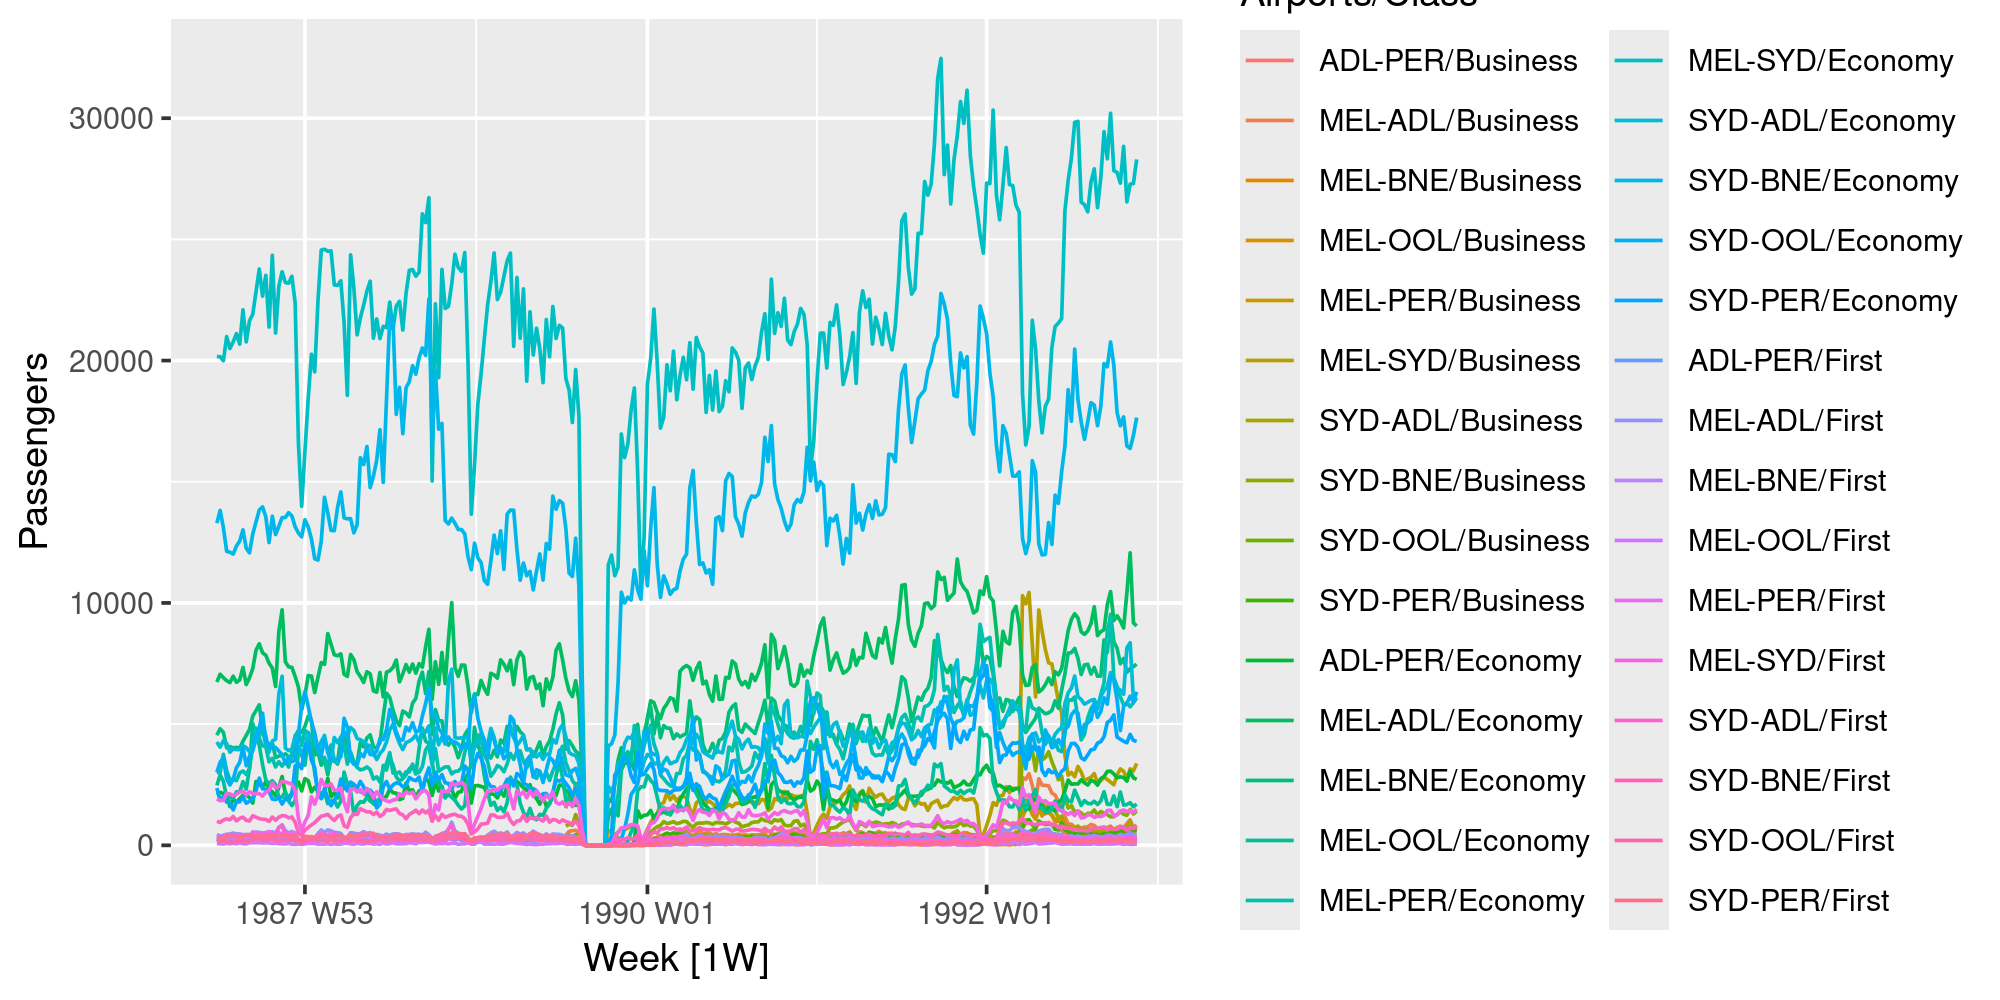

In [15]:
ansett |> autoplot(Passengers)

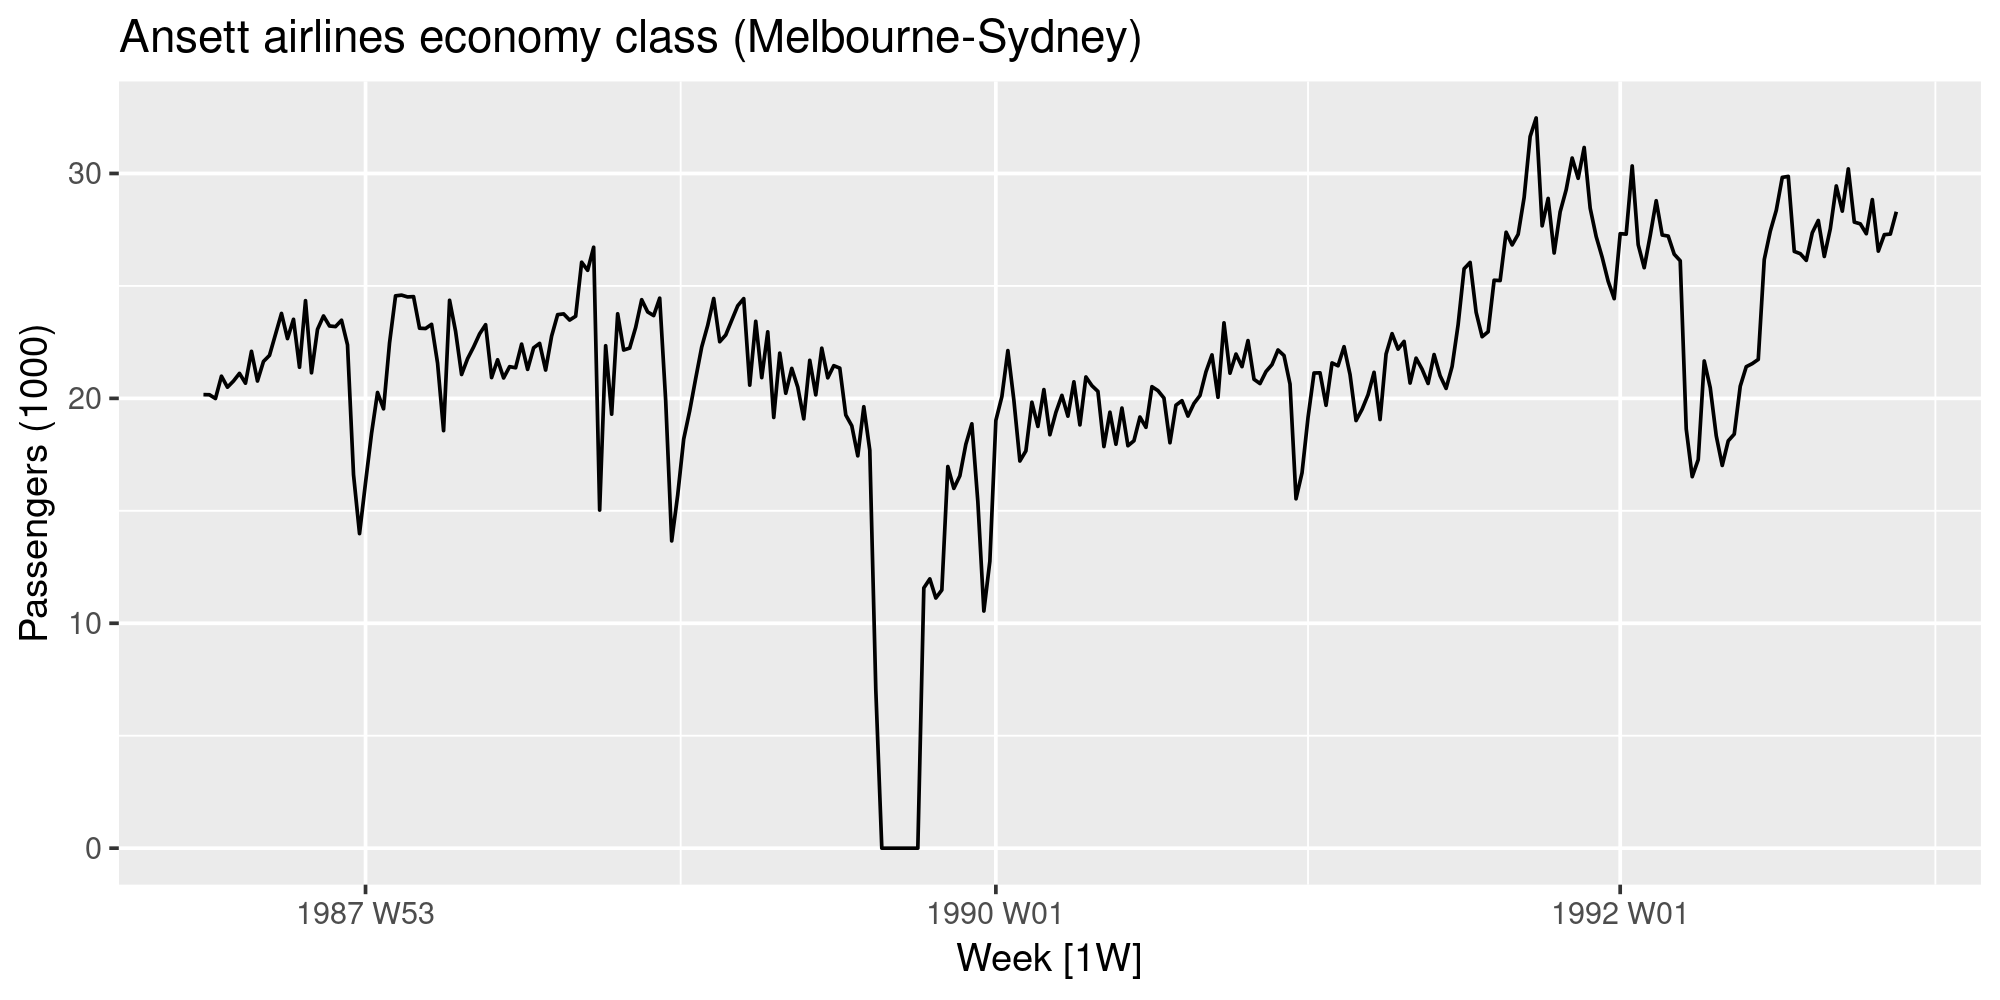

In [16]:
ansett |>
    filter(Airports == "MEL-SYD", Class == "Economy") |>
    mutate(Passengers = Passengers/1000) |>
    autoplot(Passengers) +
        labs(title = "Ansett airlines economy class (Melbourne-Sydney)", y = "Passengers (1000)")

- There was a period in 1989 when no passengers were carried. (Industrial dispute.)
- There was a period of reduced load in 1992. (Trial, replacing economy seats with business seats.)
- A large increase in passenger load occurred in the second half of 1991.
- There are some large dips in load around the start of each year. (Holiday effects.)
- There is a long-term fluctuation in the level of the series which increases during 1987, decreases in 1989, and increases again through 1990 and 1991.

### Medicare Australia prescription data

The `PBS` tsibble contains montly sales data on pharmaceutical products in Australia.

This contains monthly data on Medicare Australia prescription data from July 1991 to June 2008. These are classified according to various concession types, and Anatomical Therapeutic Chemical (ATC) indexes.

For example, ATC A10 refers to drugs used in diabetes. We are interested in total cost (in millions of $).

In [17]:
a10 <- PBS |>
    filter(ATC2 == "A10") |>
    summarise(TotalC = sum(Cost)) |>
    mutate(Cost = TotalC / 1e6) |>
    select(Month, Cost)
a10

Month    Cost    
1   1991 Jul 3.526591
2   1991 Aug 3.180891
⋮   ⋮        ⋮       
203 2008 May 22.91251
204 2008 Jun 19.43174

Let's plot the total cost over time.

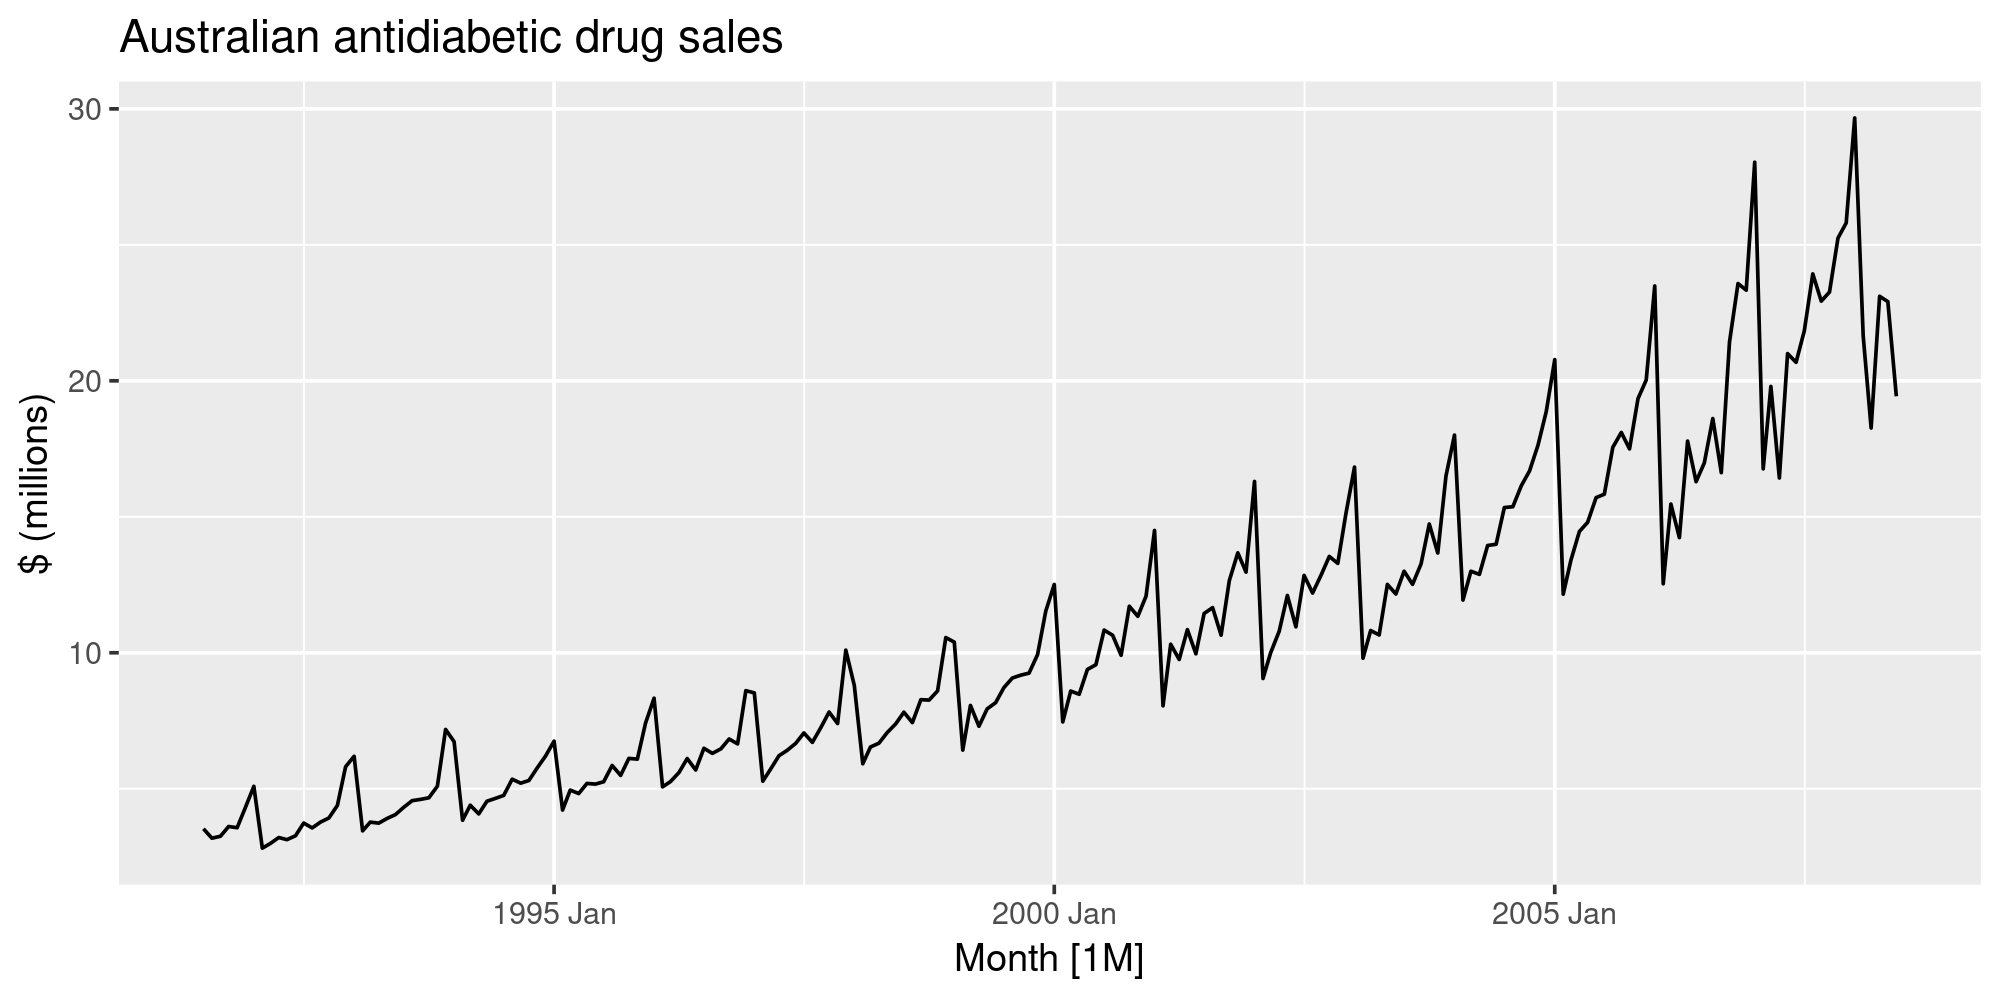

In [18]:
a10 |>
    autoplot(Cost) +
        labs(y = "$ (millions)", title = "Australian antidiabetic drug sales")

Here, there is a clear and increasing trend.
There is also a strong seasonal pattern that increases in size as the level of the series increases.
The sudden drop at the start of each year is caused by a government subsidisation scheme that makes it cost-effective for patients to stockpile drugs at the end of the calendar year.

## In-Class Workbook

You can find this week's in-class workbook on Brightspace.

You should complete workbooks assigned in class and submit your writeups on Brightspace
within 24 hours (by 9:30 pm PST, on the day after).



### Problem 1

Explore the following four time series: `Bricks` from `aus_production`, `Lynx` from `pelt`, `Close` from `gafa_stock`, `Demand` from `vic_elec`.

   1. What is the time interval of each series?
   2. Use `autoplot()` to produce a time plot of each series. Describe the patterns seen in each series.
   3. For the last plot, modify the axis labels and title.

Hint: Use `?` (or `help()`) to find out more information about the data in each series.


## Time series patterns and seasonal plots

**Trend**
  : pattern exists when there is a long-term increase or decrease in the data.

**Seasonal**
  : pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).

**Cyclic**
  : pattern exists when data exhibit rises and falls that are *not of fixed period* (duration usually of at least 2 years).

### Differences between seasonal and cyclic patterns:

- seasonal pattern constant length; cyclic pattern variable length
- average length of cycle longer than length of seasonal pattern
- magnitude of cycle more variable than magnitude of seasonal pattern

The timing of peaks and troughs is predictable with seasonal data, but unpredictable in the long term with cyclic data.


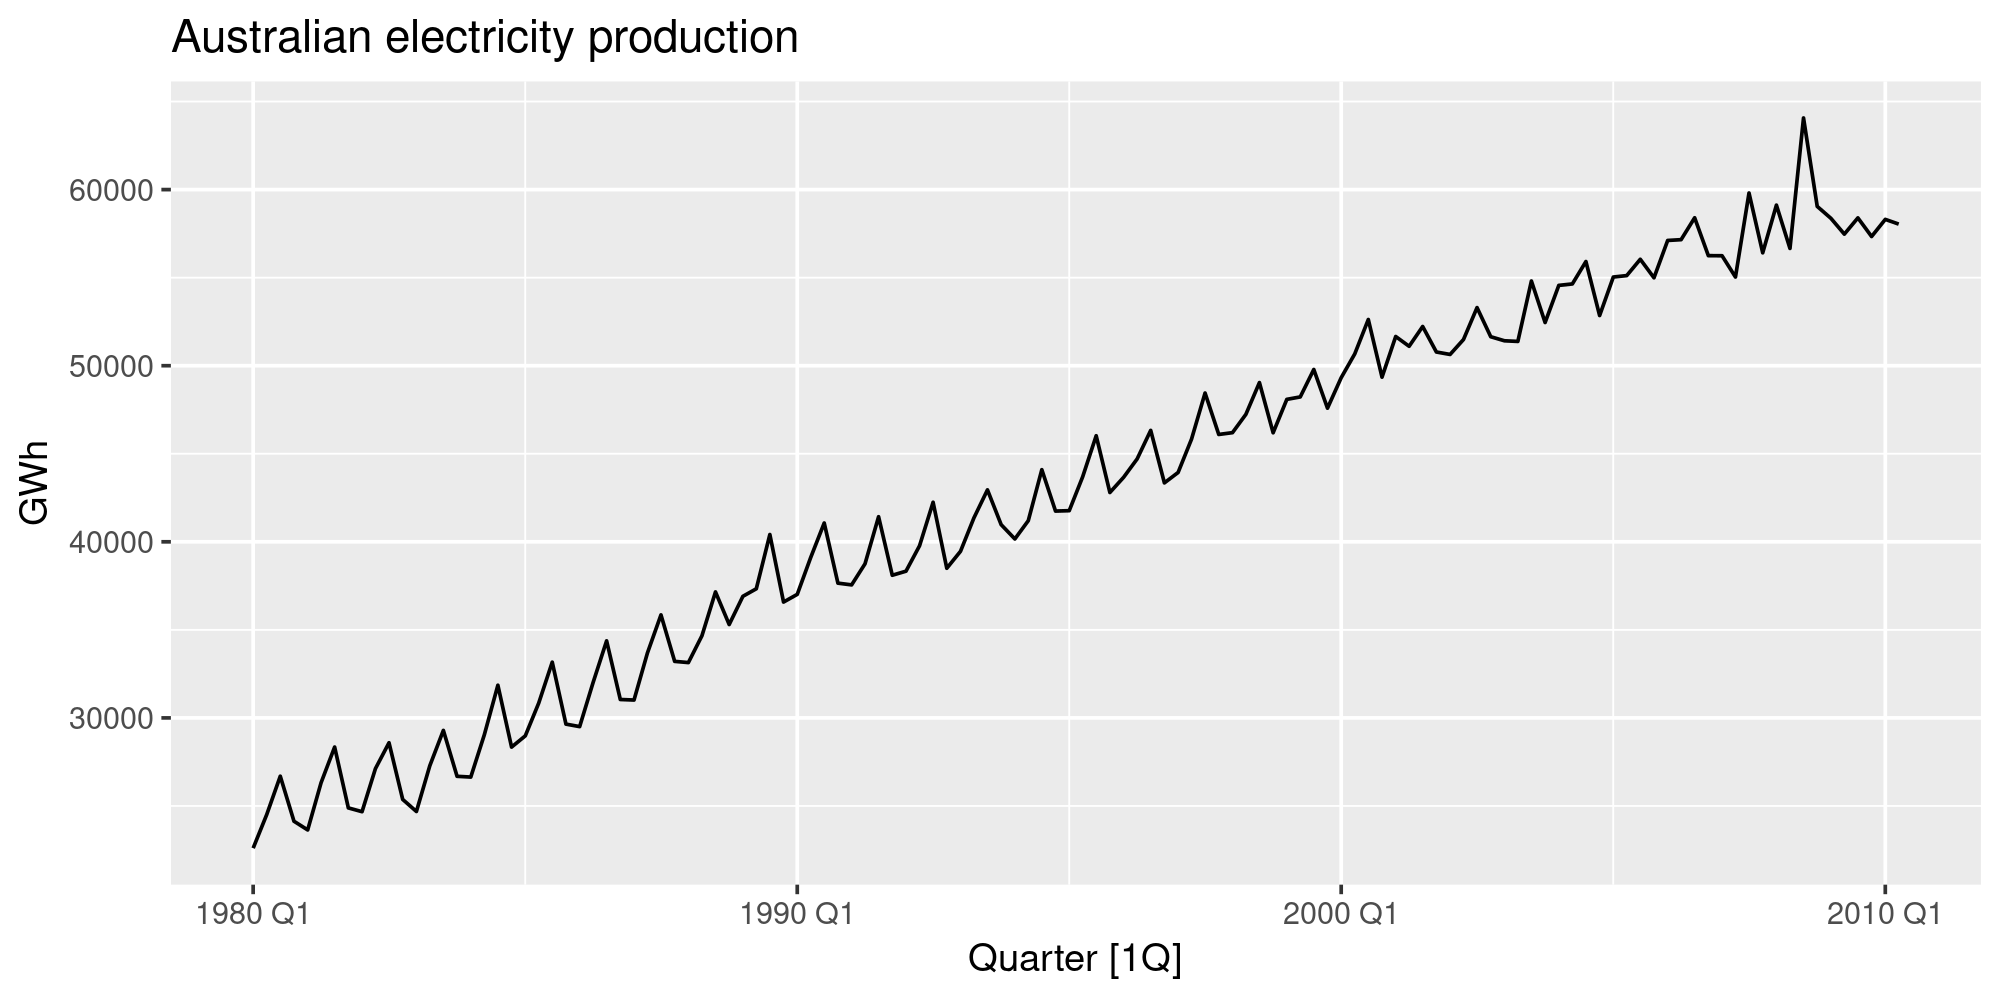

In [19]:
aus_production %>%
    filter(year(Quarter) >= 1980) %>%
    autoplot(Electricity) +
    labs(y = "GWh", title = "Australian electricity production")

A seasonal plot is similar to a time plot except that the data are plotted against the individual “seasons” in which the data were observed. 

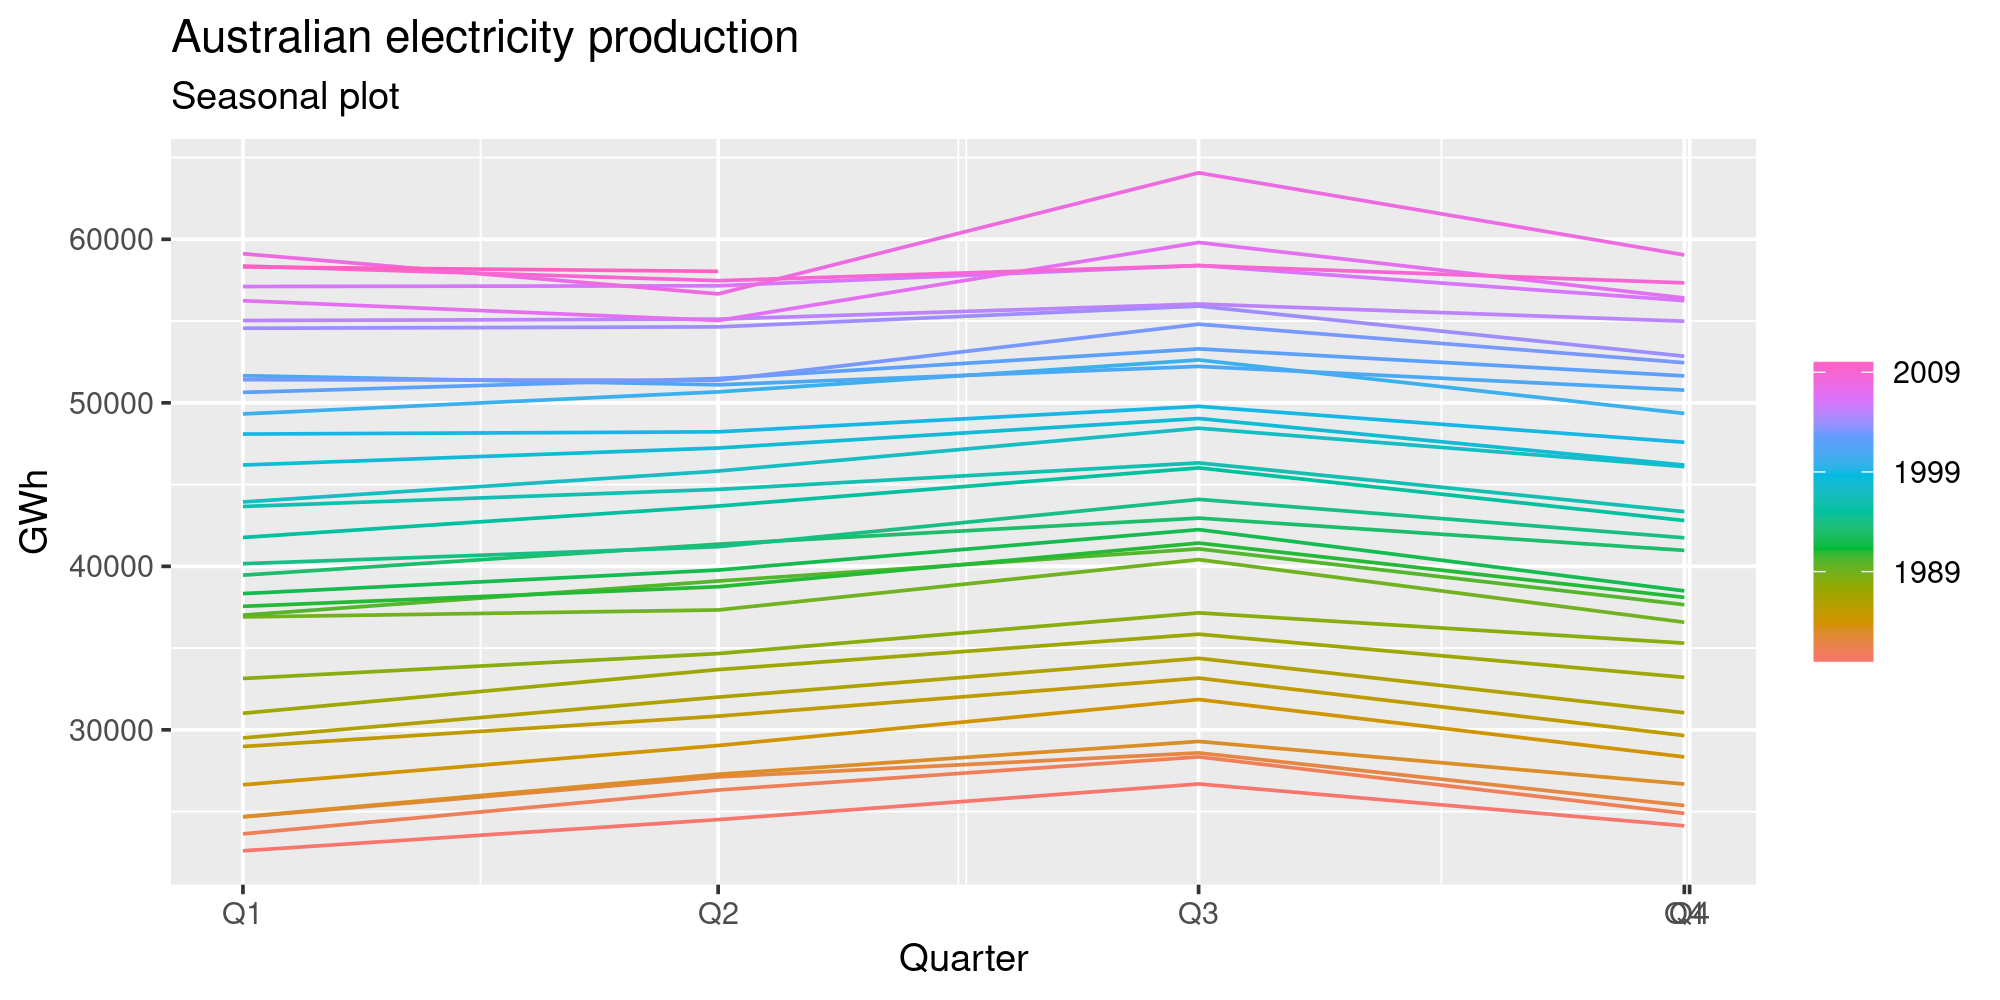

In [20]:
aus_production %>%
    filter(year(Quarter) >= 1980) %>%
    gg_season(Electricity) +
    labs(y = "GWh", title = "Australian electricity production", subtitle="Seasonal plot")

An alternative plot that emphasises the seasonal patterns is where the data for each season are collected together in separate mini time plots.

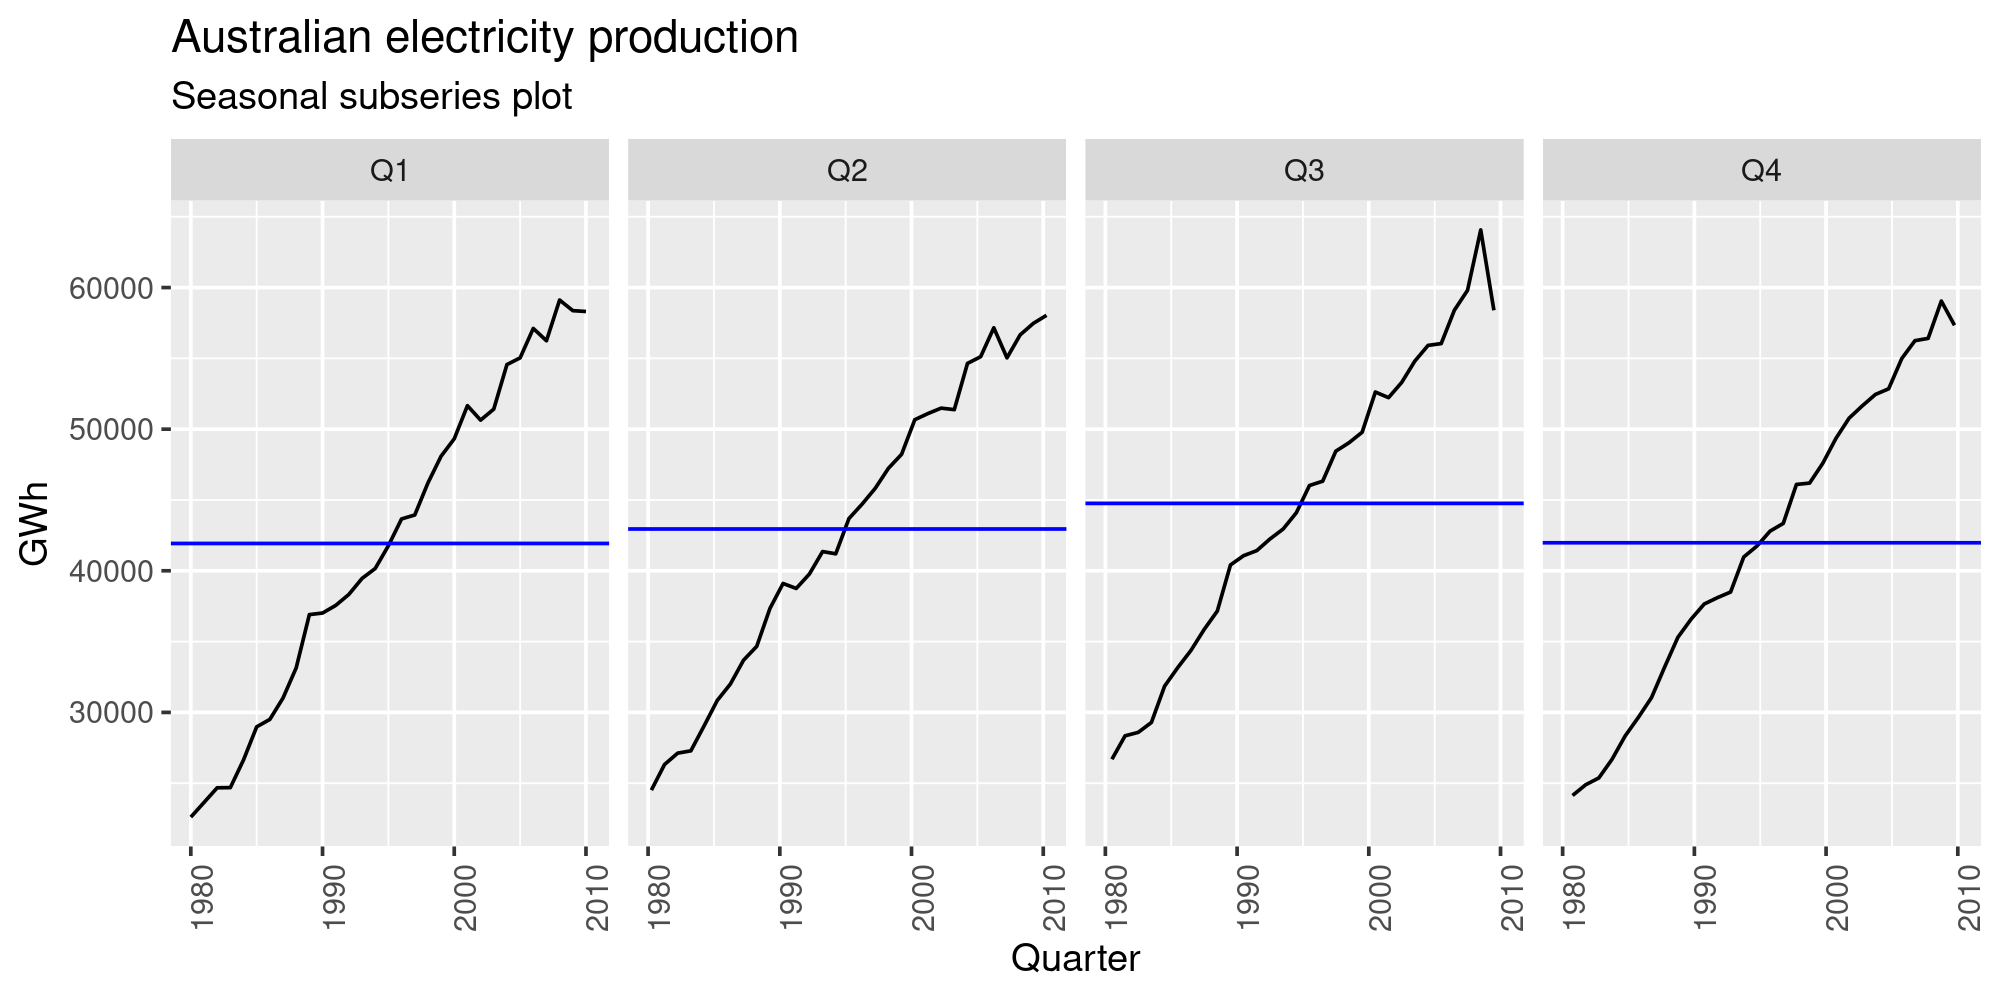

In [21]:
aus_production %>%
    filter(year(Quarter) >= 1980) %>%
    gg_subseries(Electricity) +
    labs(y = "GWh", title = "Australian electricity production", subtitle="Seasonal subseries plot")

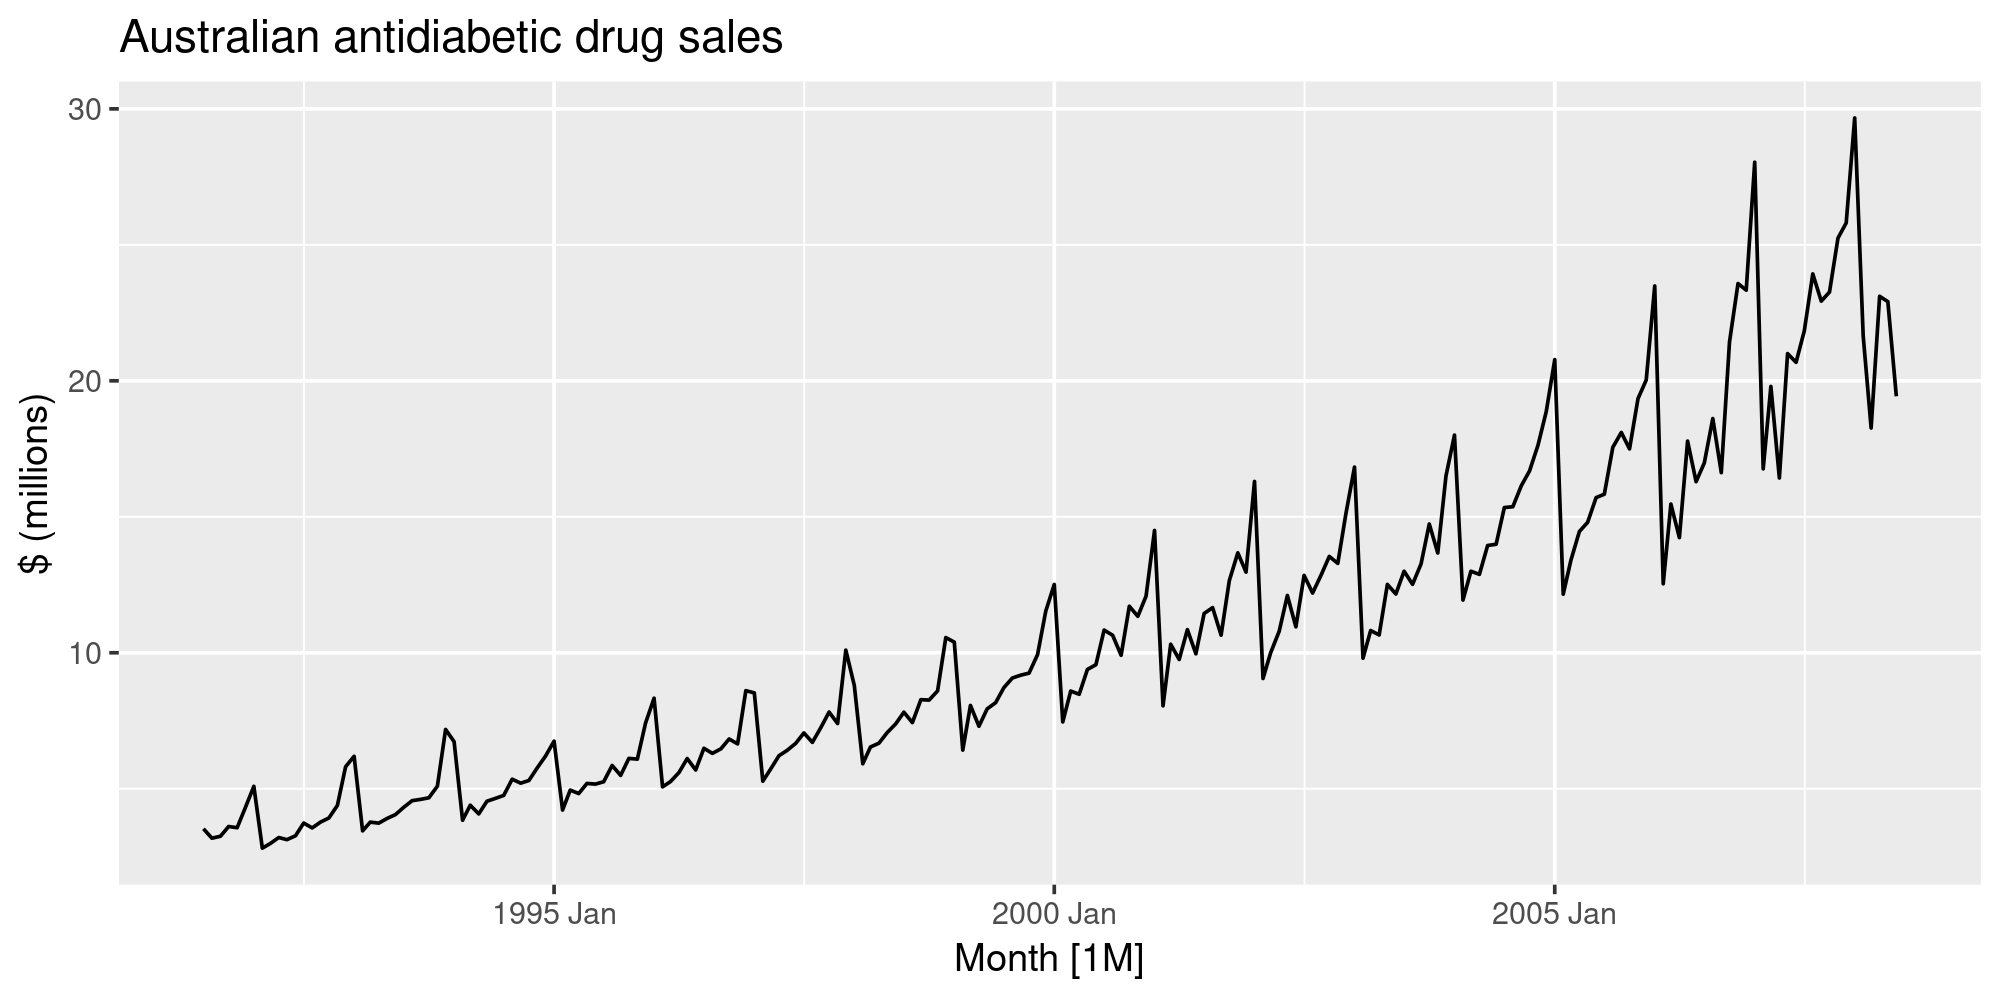

In [22]:
a10 |>
    autoplot(Cost) +
        labs(y = "$ (millions)", title = "Australian antidiabetic drug sales")

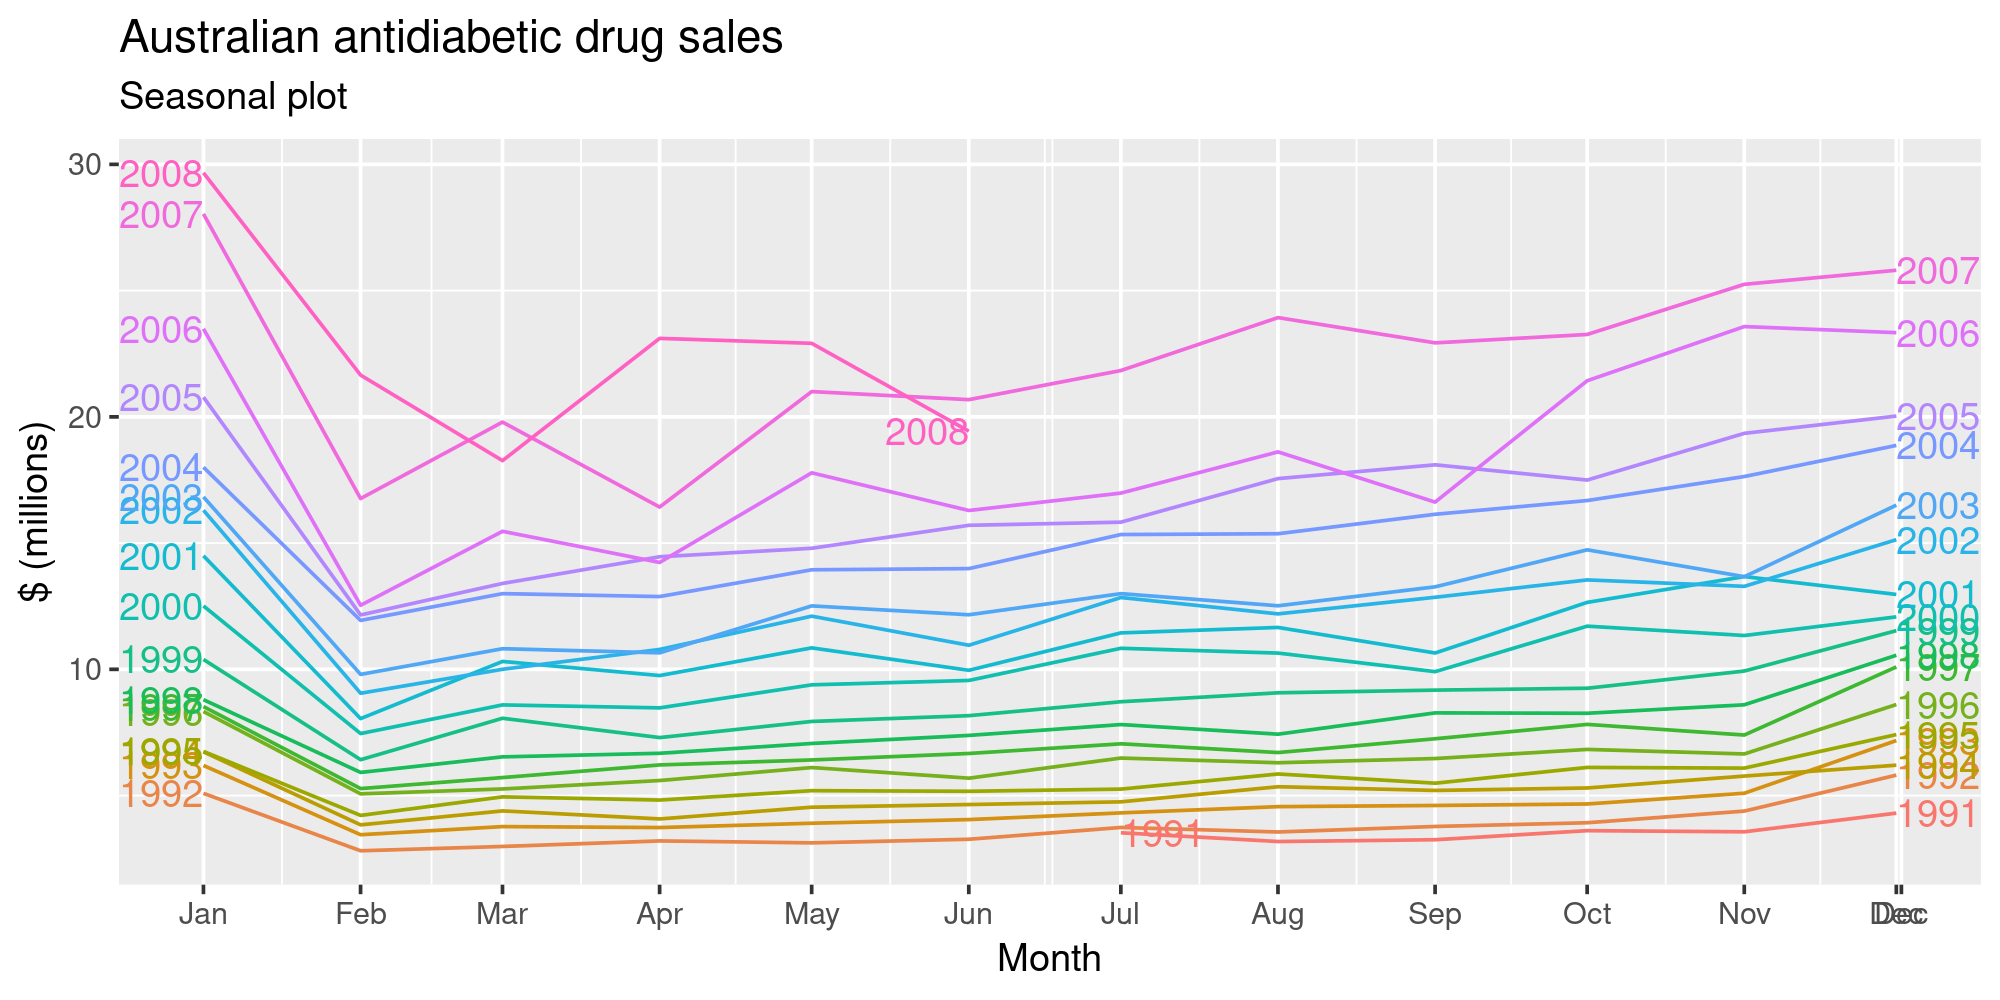

In [23]:
a10 |>
    gg_season(Cost, labels = "both") +
        labs(y = "$ (millions)", title = "Australian antidiabetic drug sales", subtitle="Seasonal plot")

Warning message in geom_line(...):
“Ignoring unknown parameters: `labels`”


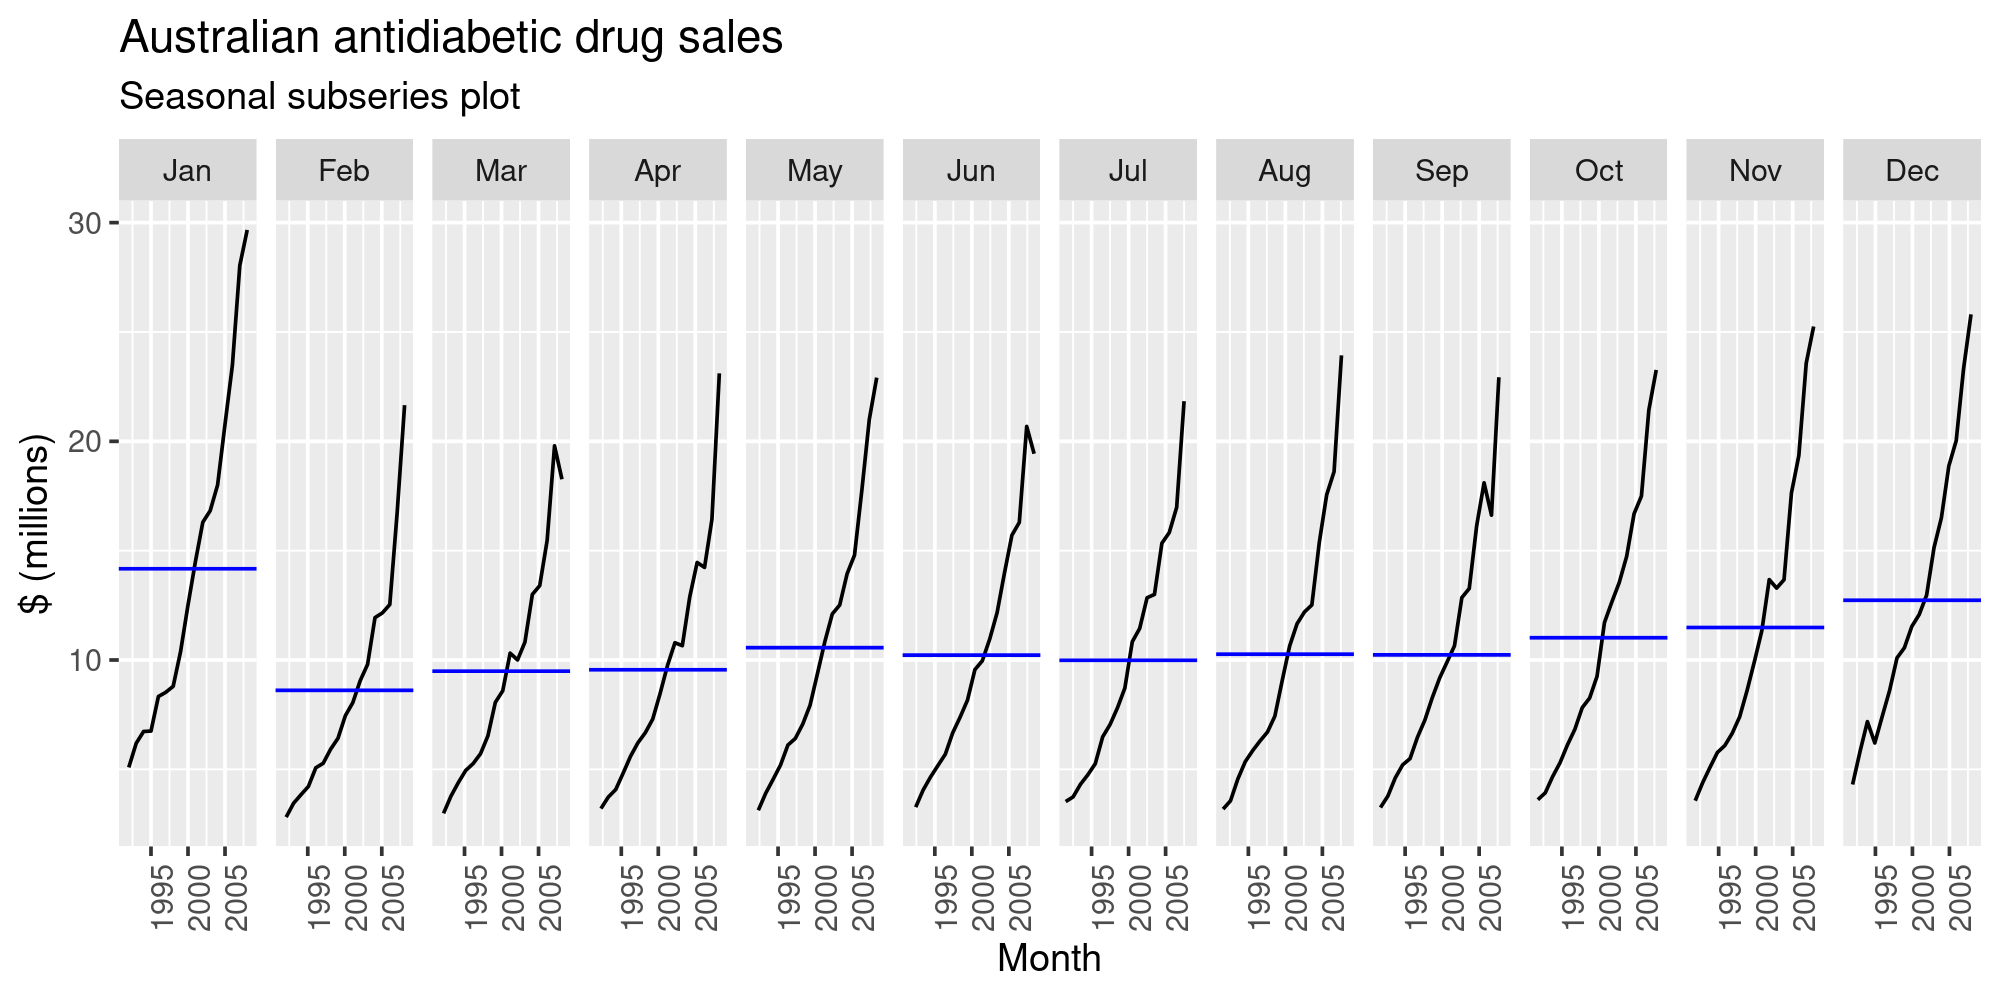

In [24]:
a10 |>
    gg_subseries(Cost, labels = "both") +
        labs(y = "$ (millions)", title = "Australian antidiabetic drug sales", subtitle="Seasonal subseries plot")

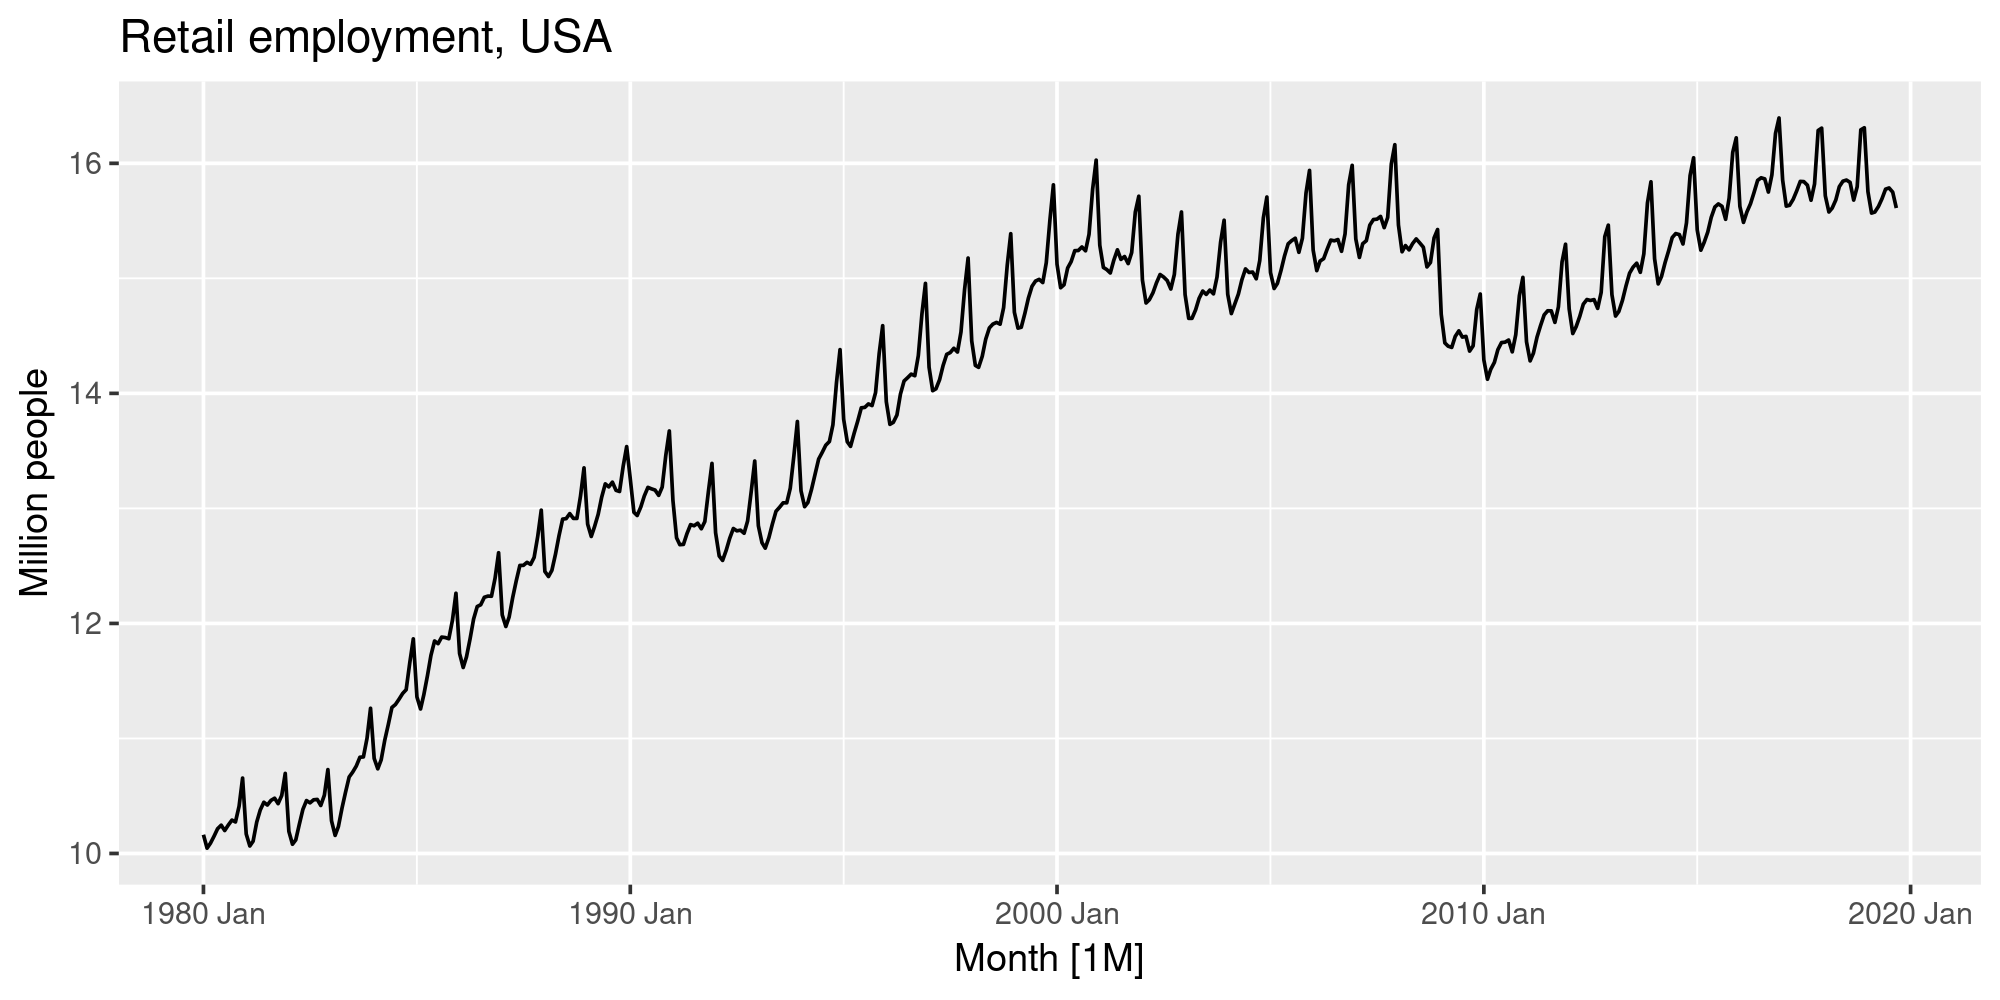

In [25]:
us_employment %>%
    filter(Title == "Retail Trade", year(Month) >= 1980) %>%
    autoplot(Employed / 1e3) +
    labs(y = "Million people", title = "Retail employment, USA")

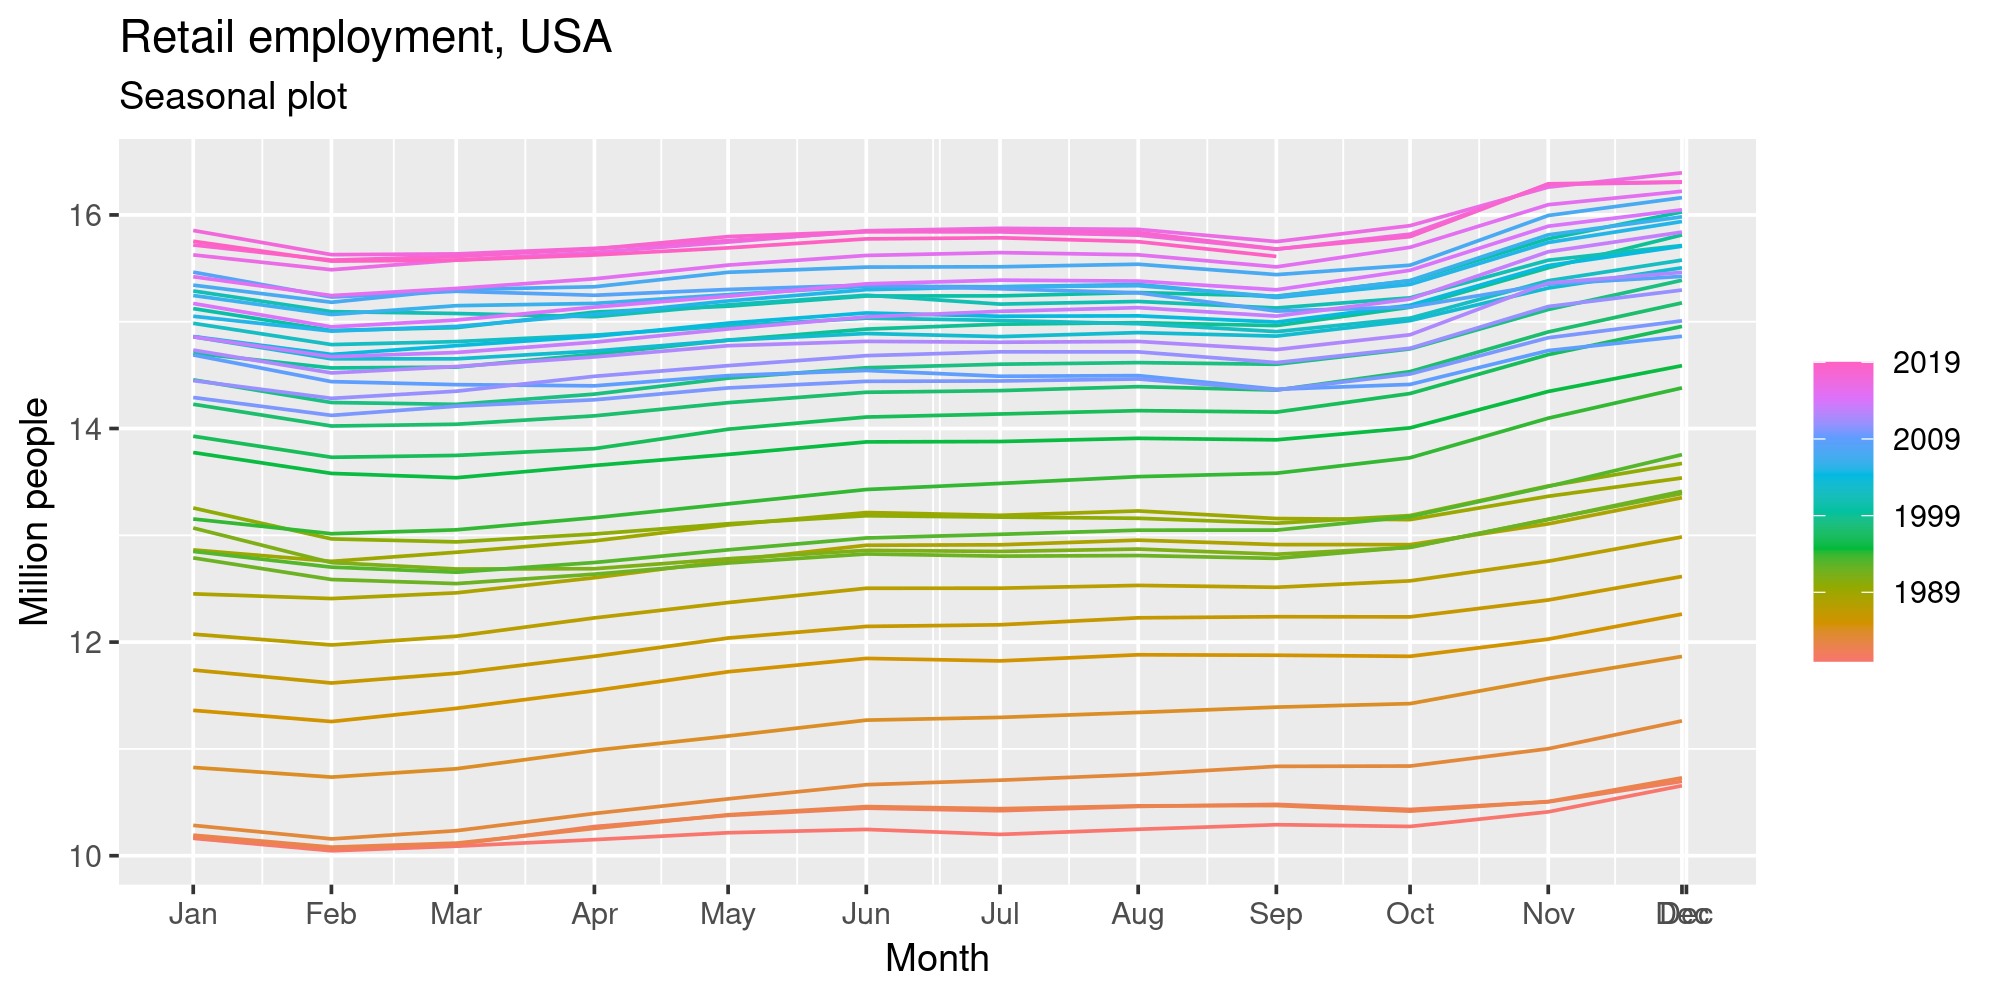

In [26]:
us_employment %>%
    filter(Title == "Retail Trade", year(Month) >= 1980) %>%
    gg_season(Employed / 1e3) +
    labs(y = "Million people", title = "Retail employment, USA", subtitle="Seasonal plot")

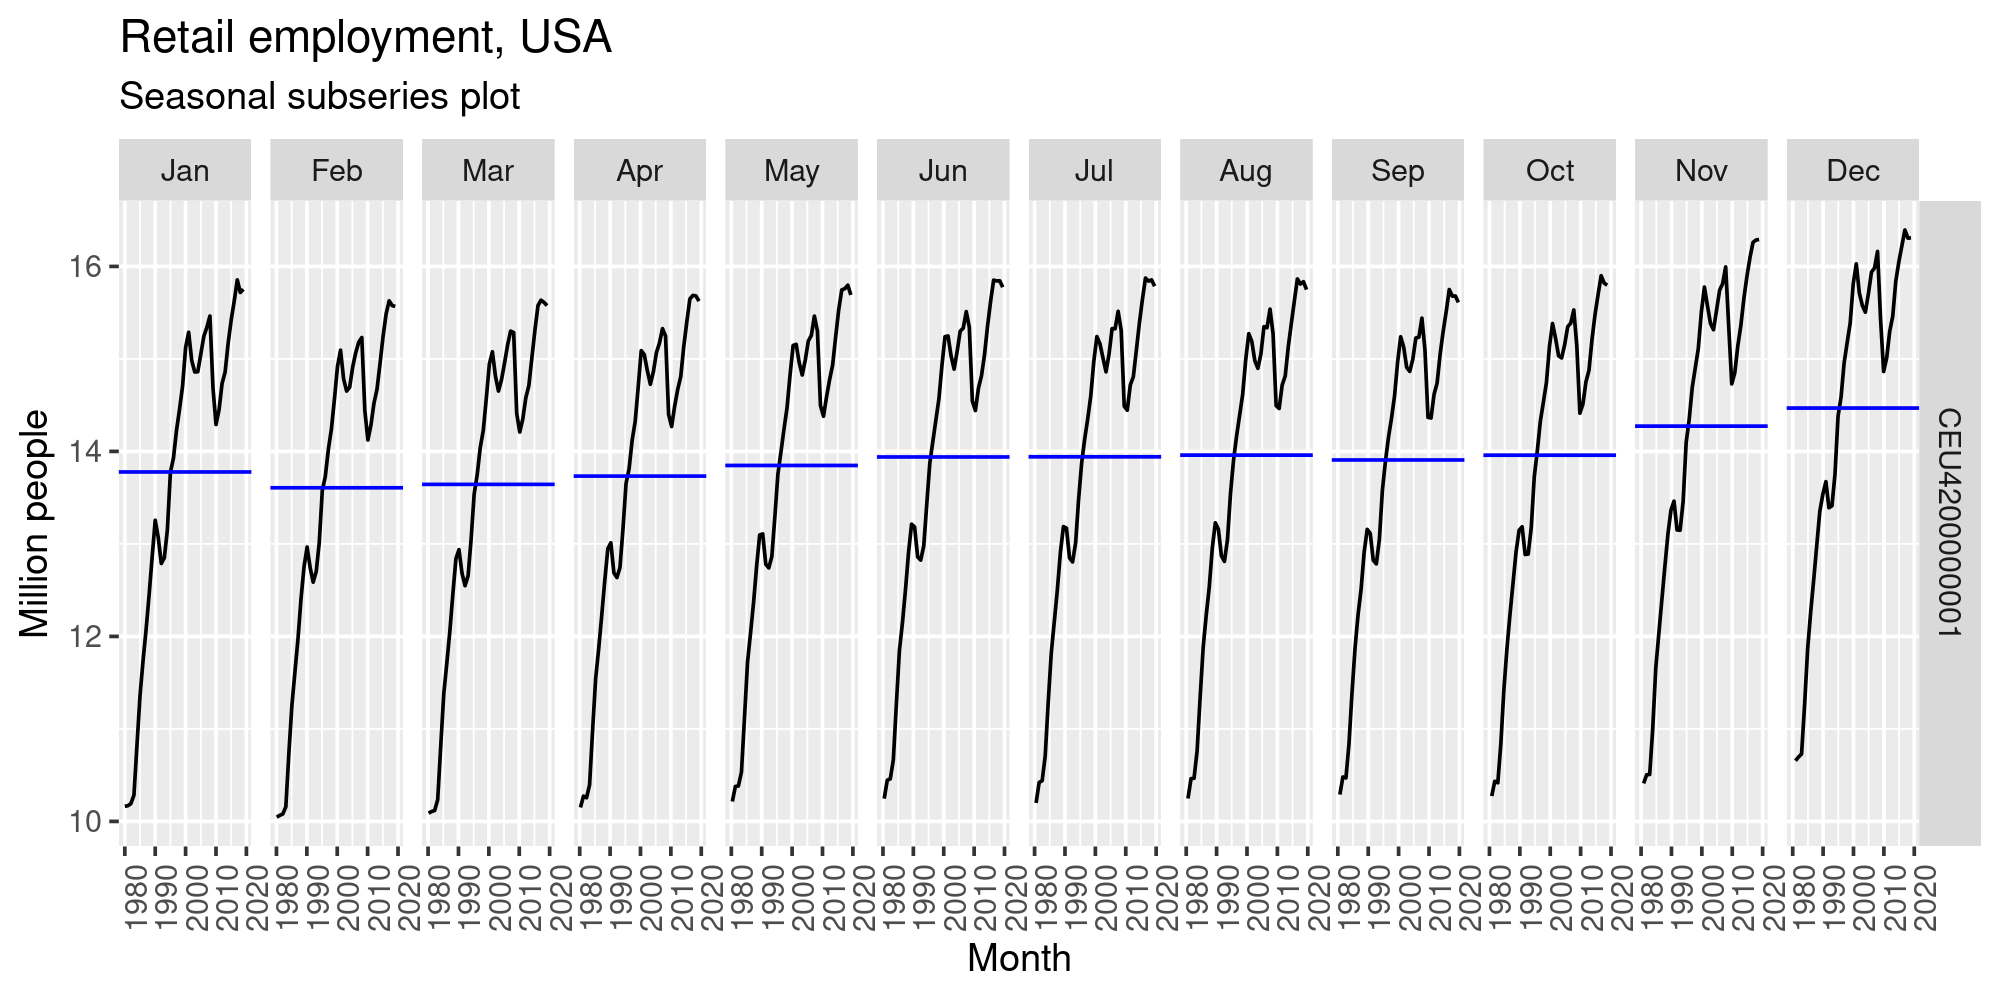

In [27]:
us_employment %>%
    filter(Title == "Retail Trade", year(Month) >= 1980) %>%
    gg_subseries(Employed / 1e3) +
    labs(y = "Million people", title = "Retail employment, USA", subtitle="Seasonal subseries plot")

Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_line()`).”


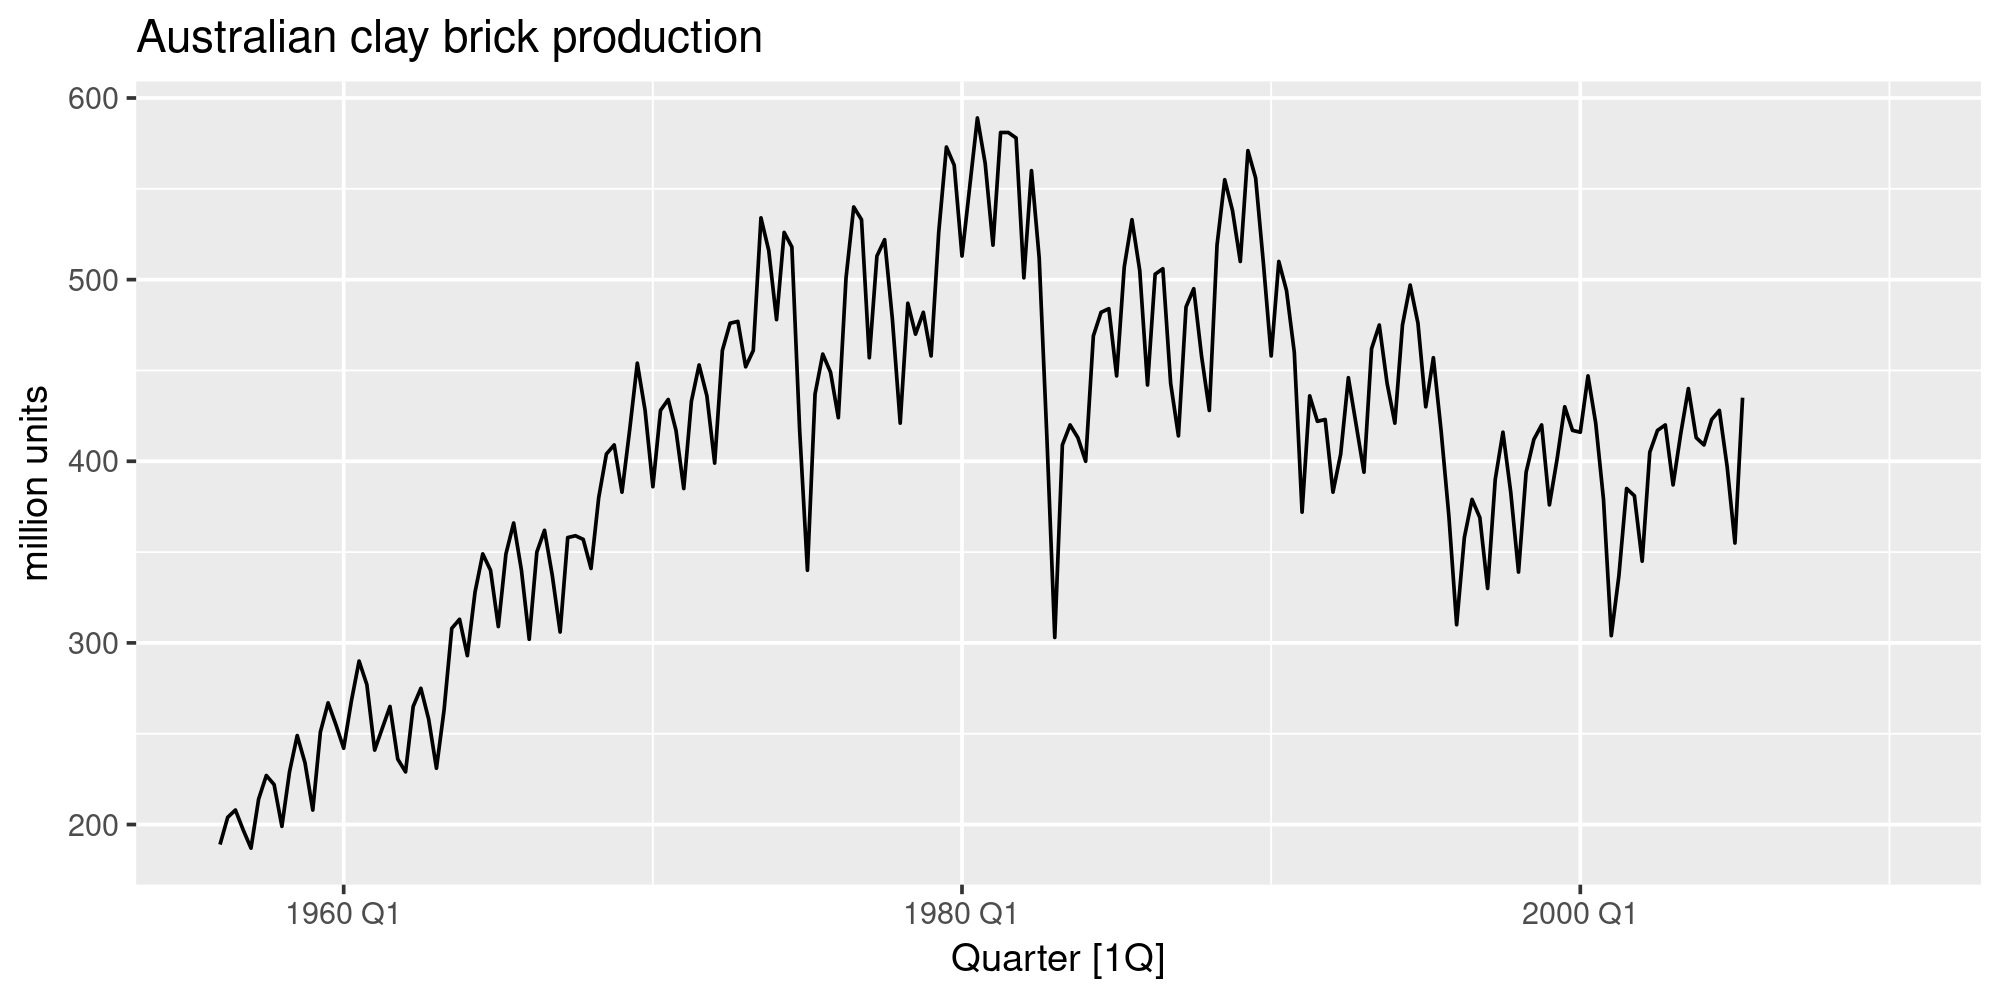

In [28]:
aus_production %>%
  autoplot(Bricks) +
  labs(y = "million units", title = "Australian clay brick production")

Warning message:
“Removed 20 rows containing missing values or values outside the scale range
(`geom_line()`).”


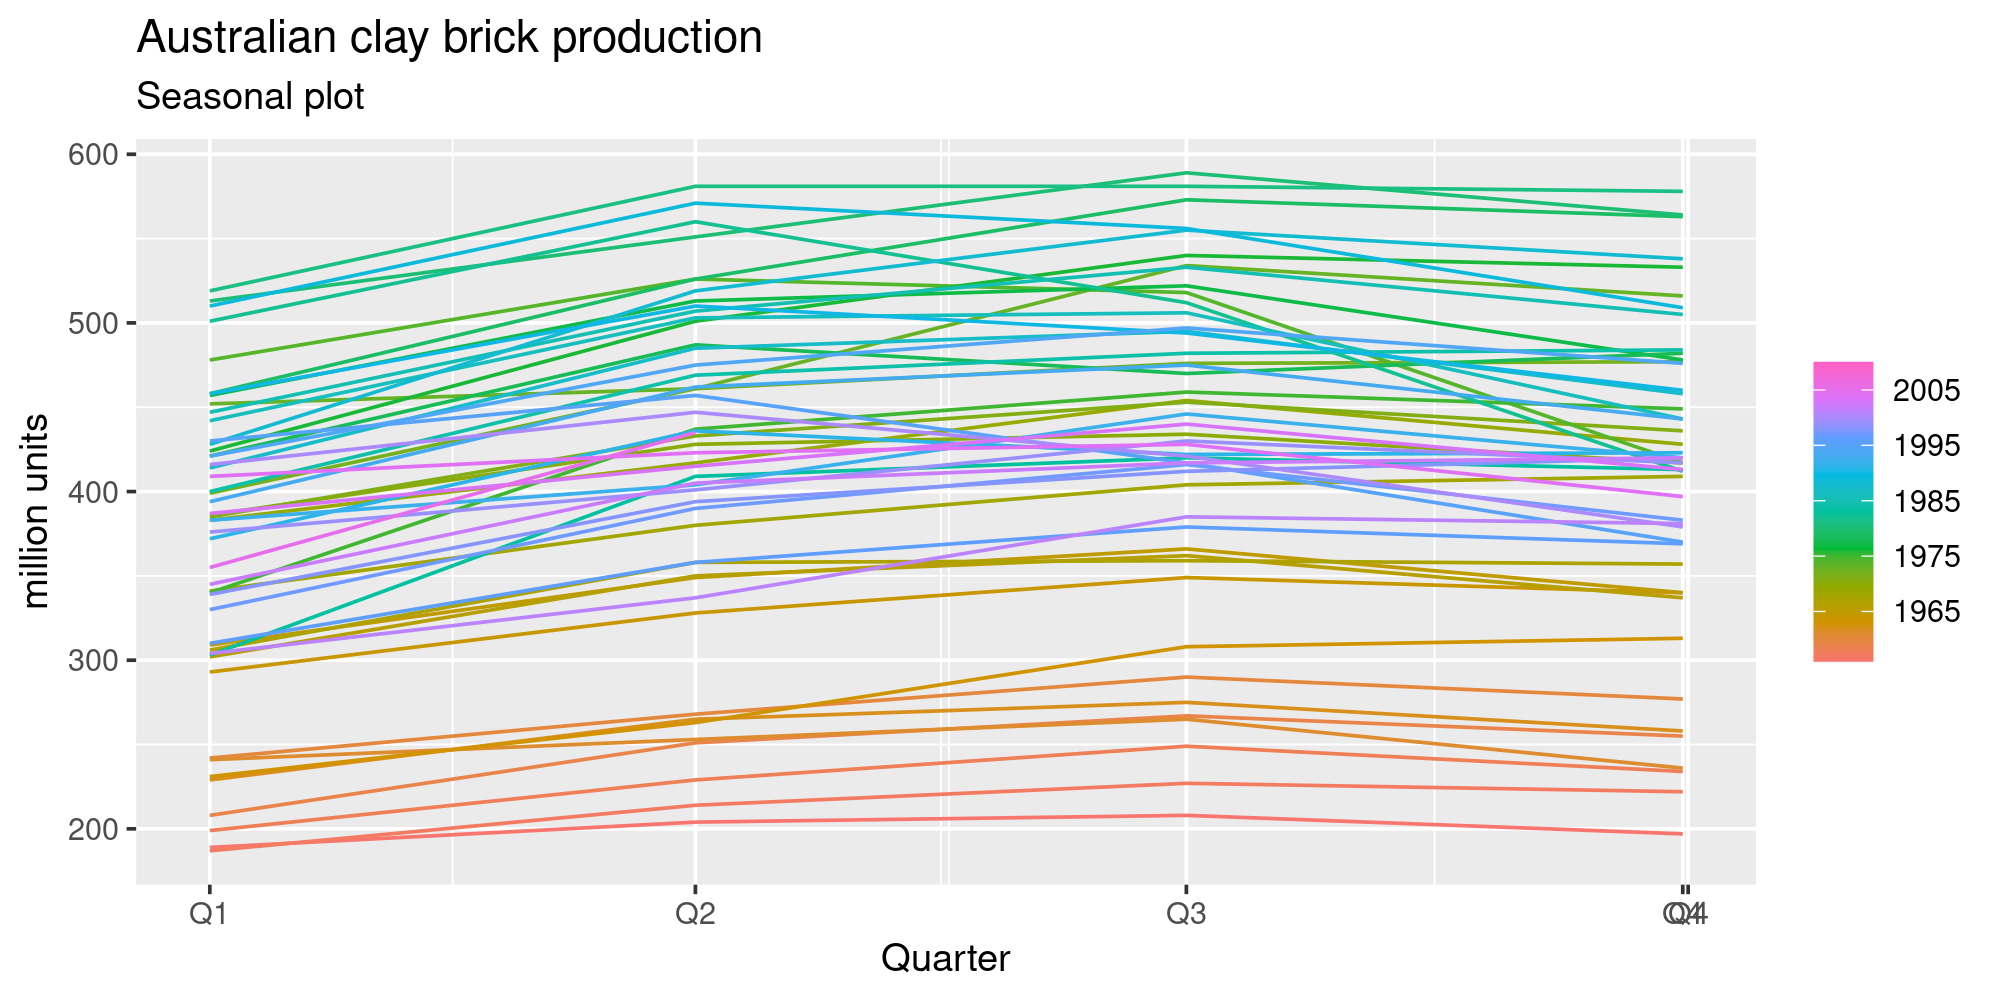

In [29]:
aus_production %>%
  gg_season(Bricks) +
  labs(y = "million units", title = "Australian clay brick production", subtitle="Seasonal plot")

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_line()`).”


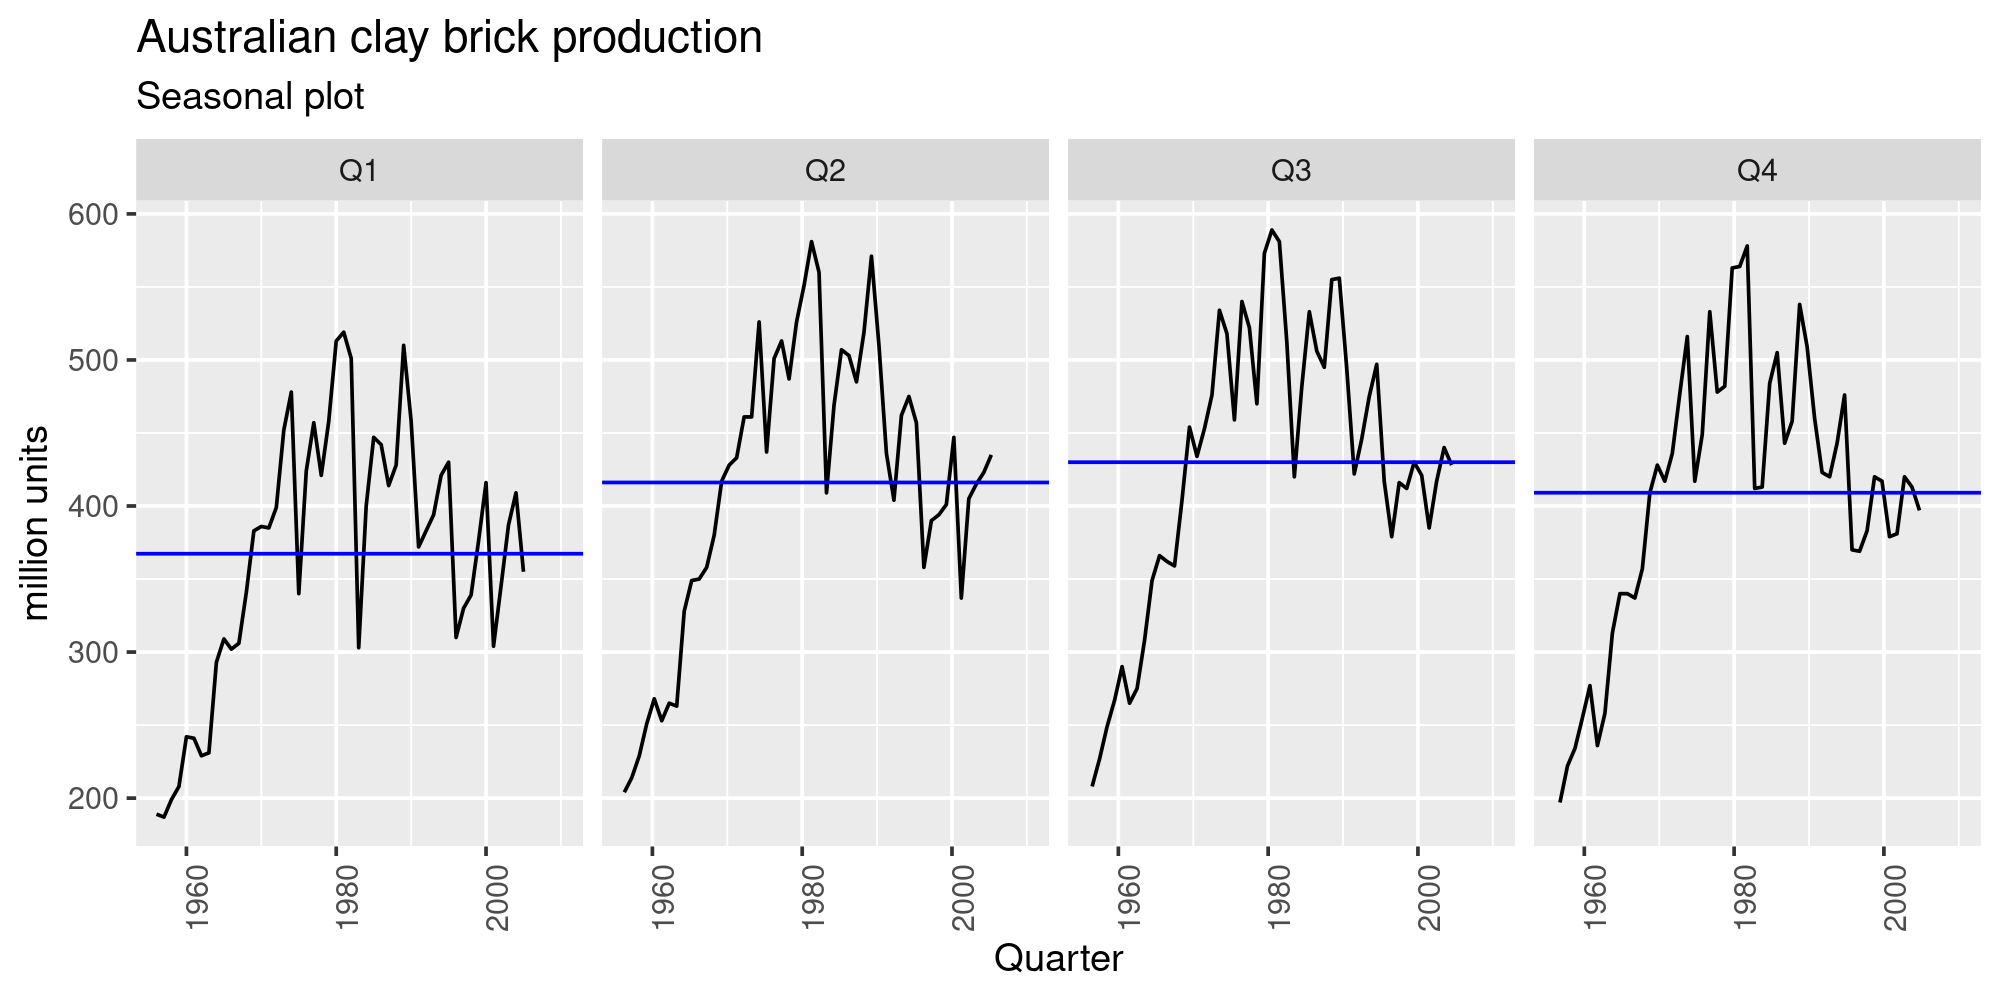

In [30]:
aus_production %>%
  gg_subseries(Bricks) +
  labs(y = "million units", title = "Australian clay brick production", subtitle="Seasonal plot")

### Multiple seasonal periods

The `vic_elec` data contains half-hourly electricity demand for the state of Victoria, Australia.

In [31]:
vic_elec

Time                Demand   Temperature Date       Holiday
1     2012-01-01 00:00:00 4382.825 21.40       2012-01-01 TRUE   
2     2012-01-01 00:30:00 4263.366 21.05       2012-01-01 TRUE   
⋮     ⋮                   ⋮        ⋮           ⋮          ⋮      
52607 2014-12-31 23:00:00 3761.887 17.3        2014-12-31 FALSE  
52608 2014-12-31 23:30:00 3809.415 17.1        2014-12-31 FALSE

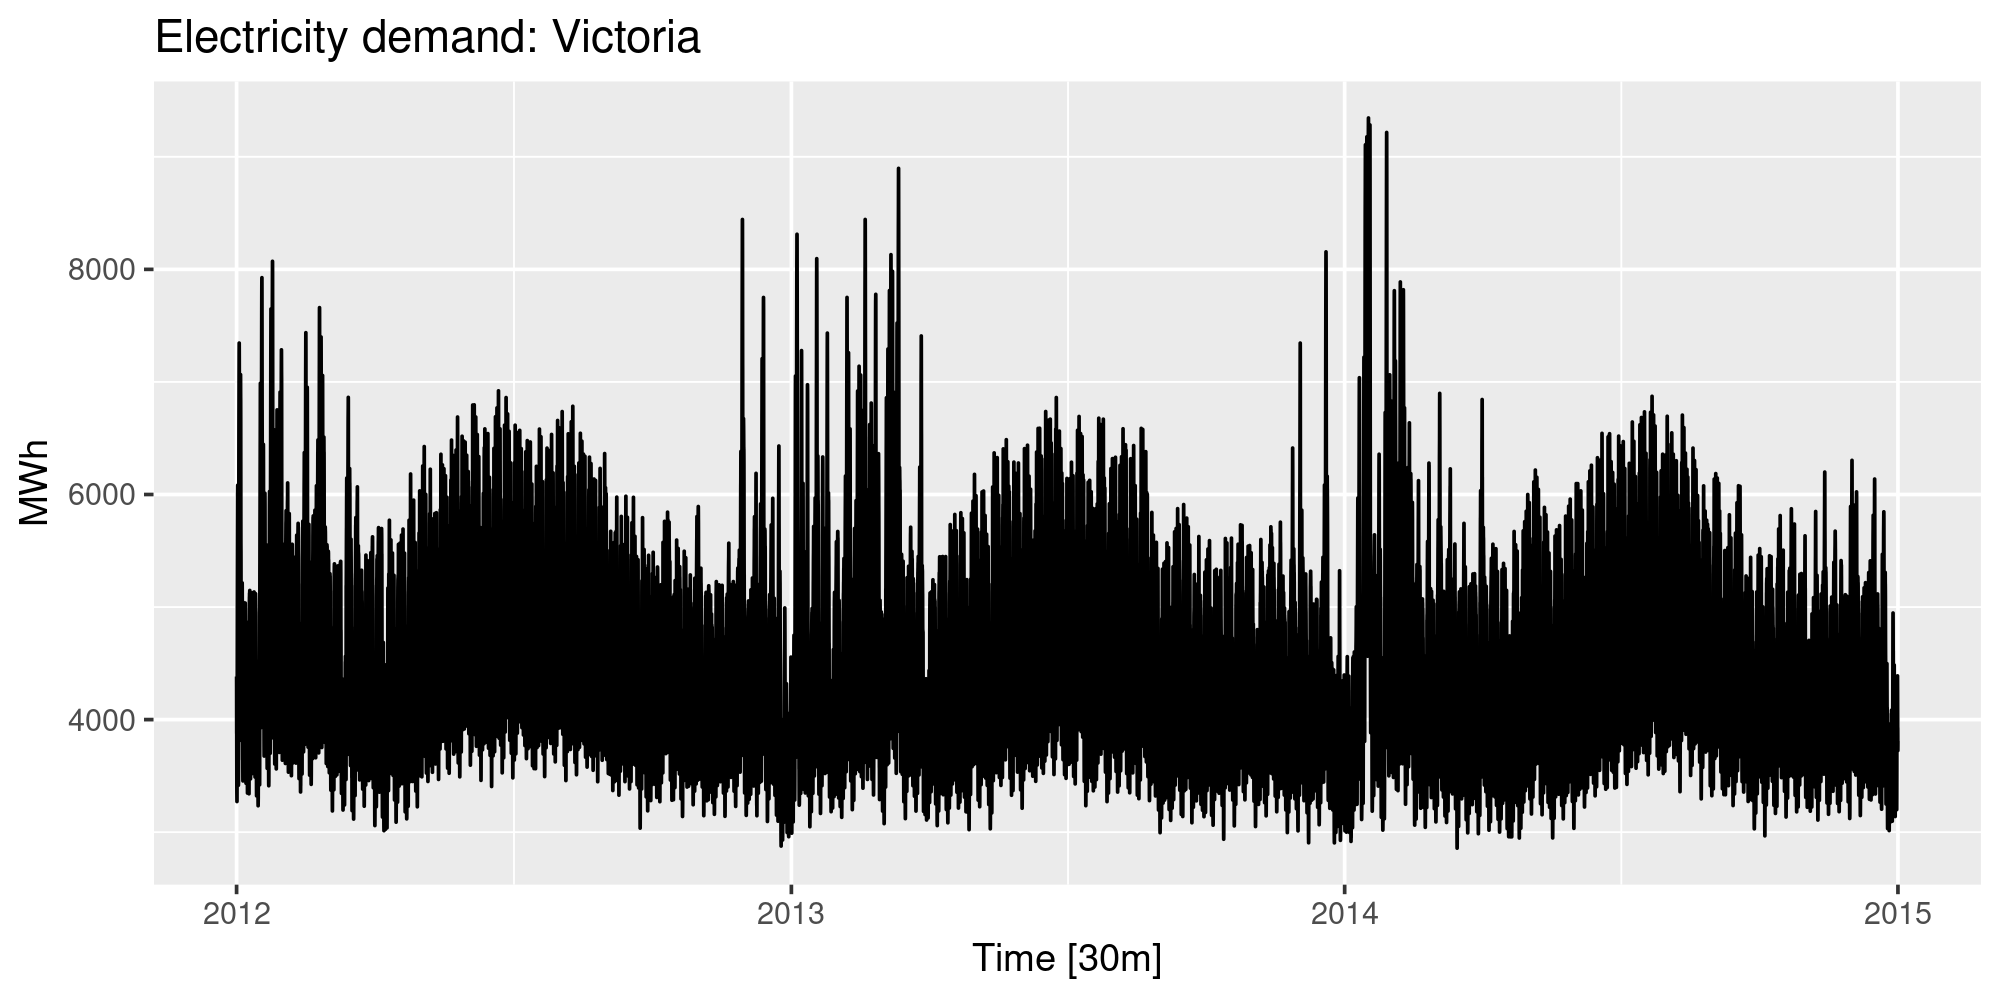

In [32]:
vic_elec |> 
    autoplot(Demand) +
    labs(y="MWh", title="Electricity demand: Victoria")

There are three possible periods of interest for this data set:
 - day
 - week
 - year

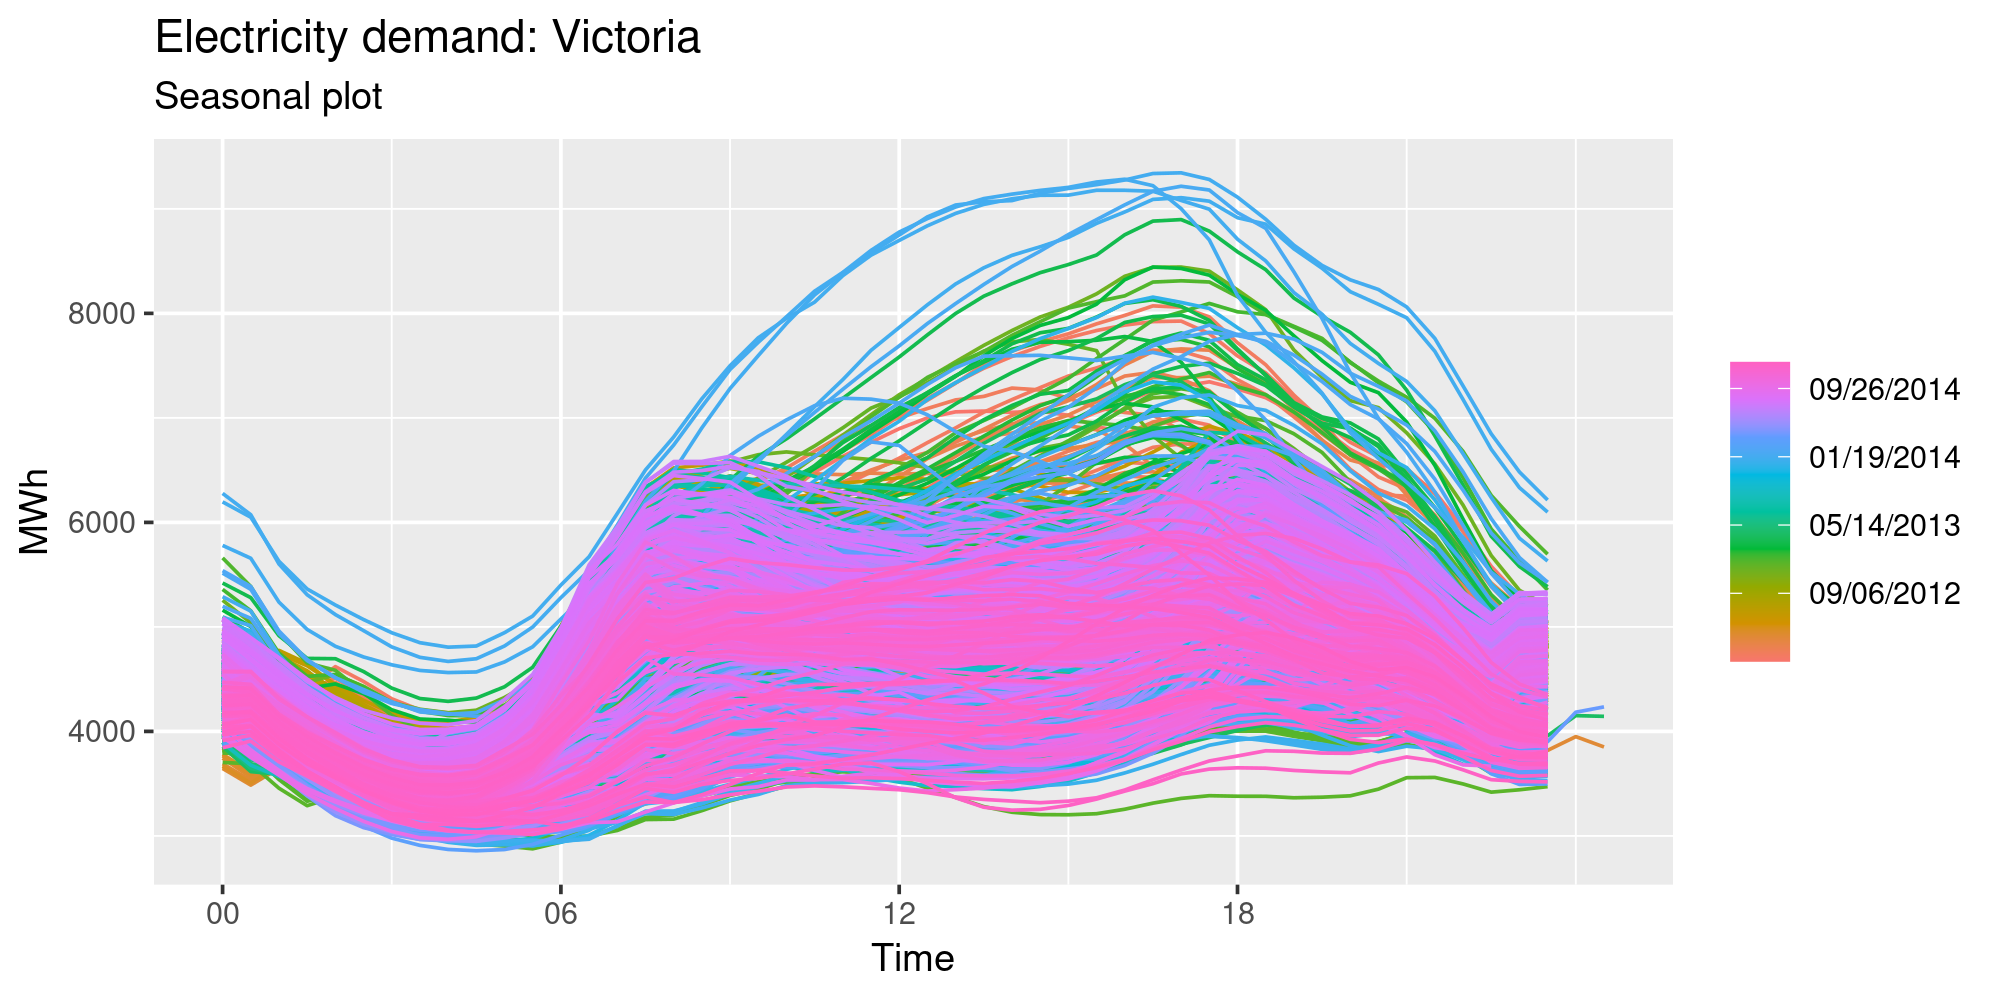

In [33]:
vic_elec |> 
    gg_season(Demand, period = "day") +
    labs(y="MWh", title="Electricity demand: Victoria", subtitle="Seasonal plot")

## Scatter plots

Useful to explore relationships between time series.

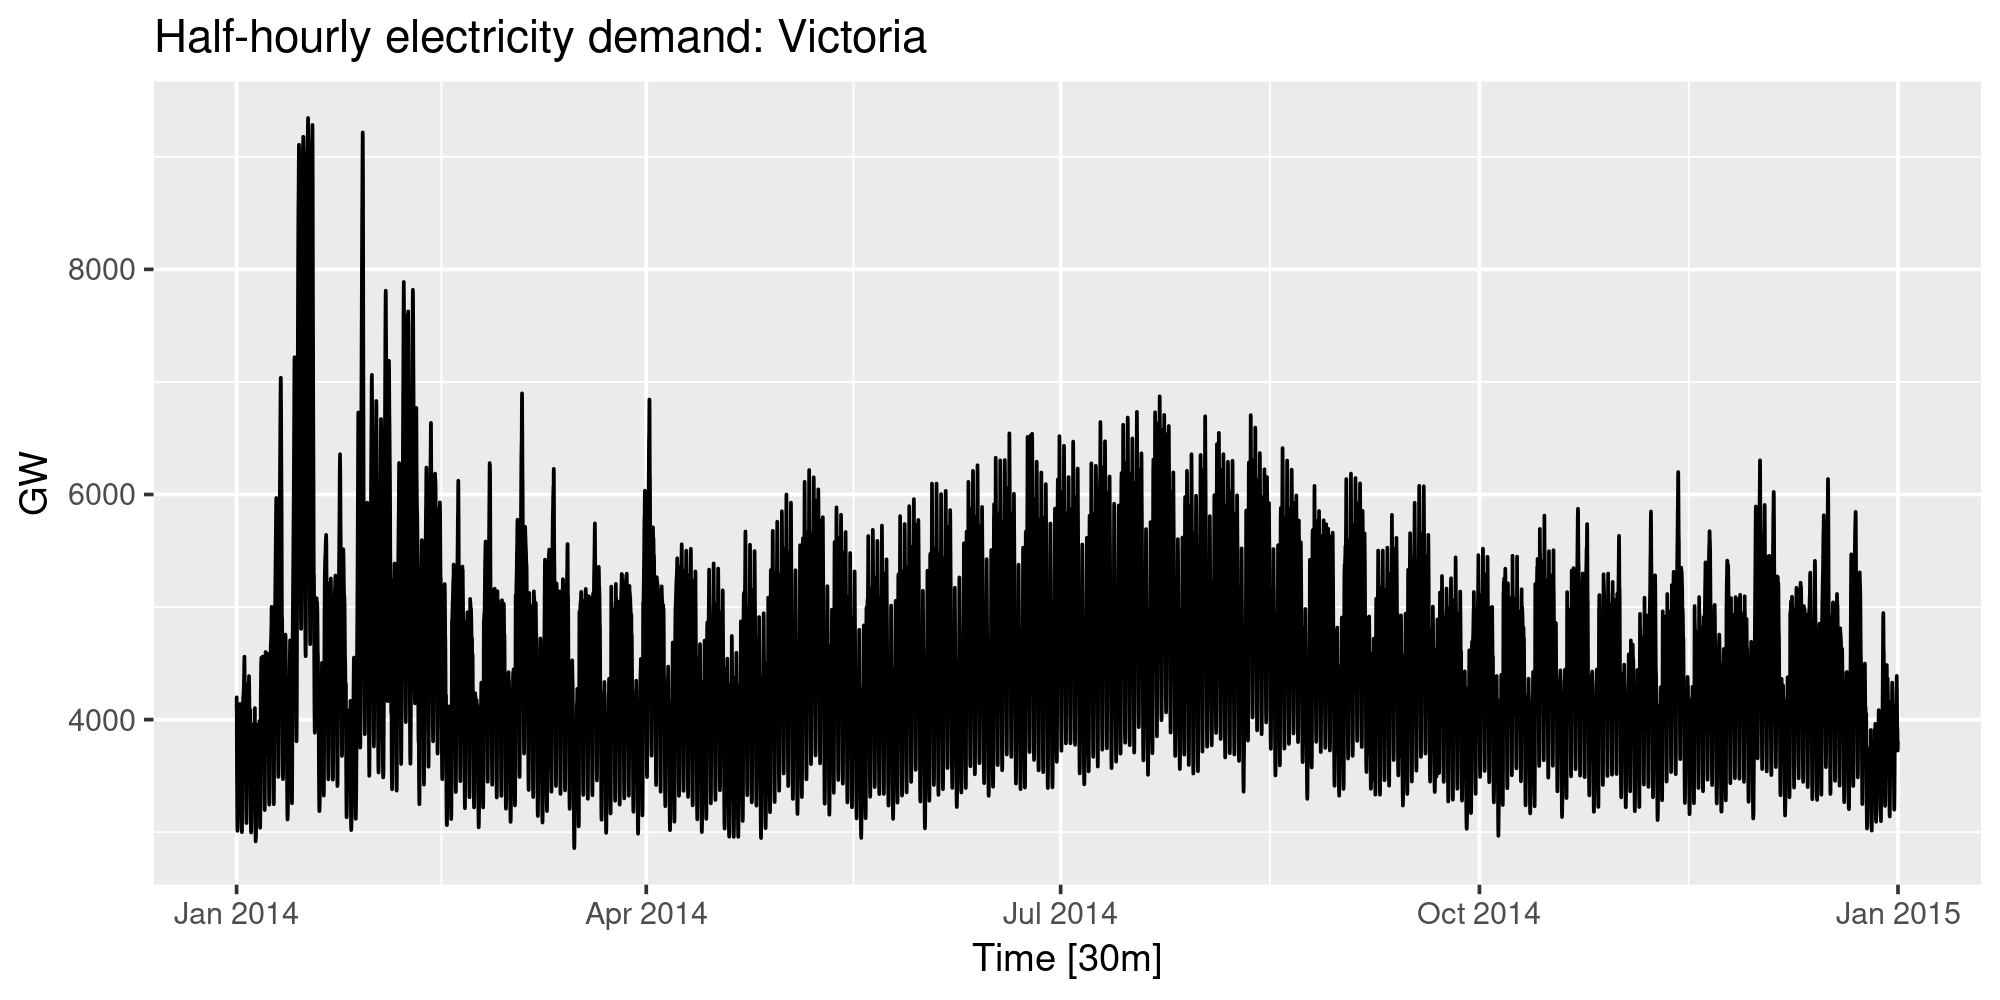

In [34]:
vic_elec |>
    filter(year(Time) == 2014) |>
    autoplot(Demand) +
    labs(y = "GW",
         title = "Half-hourly electricity demand: Victoria")

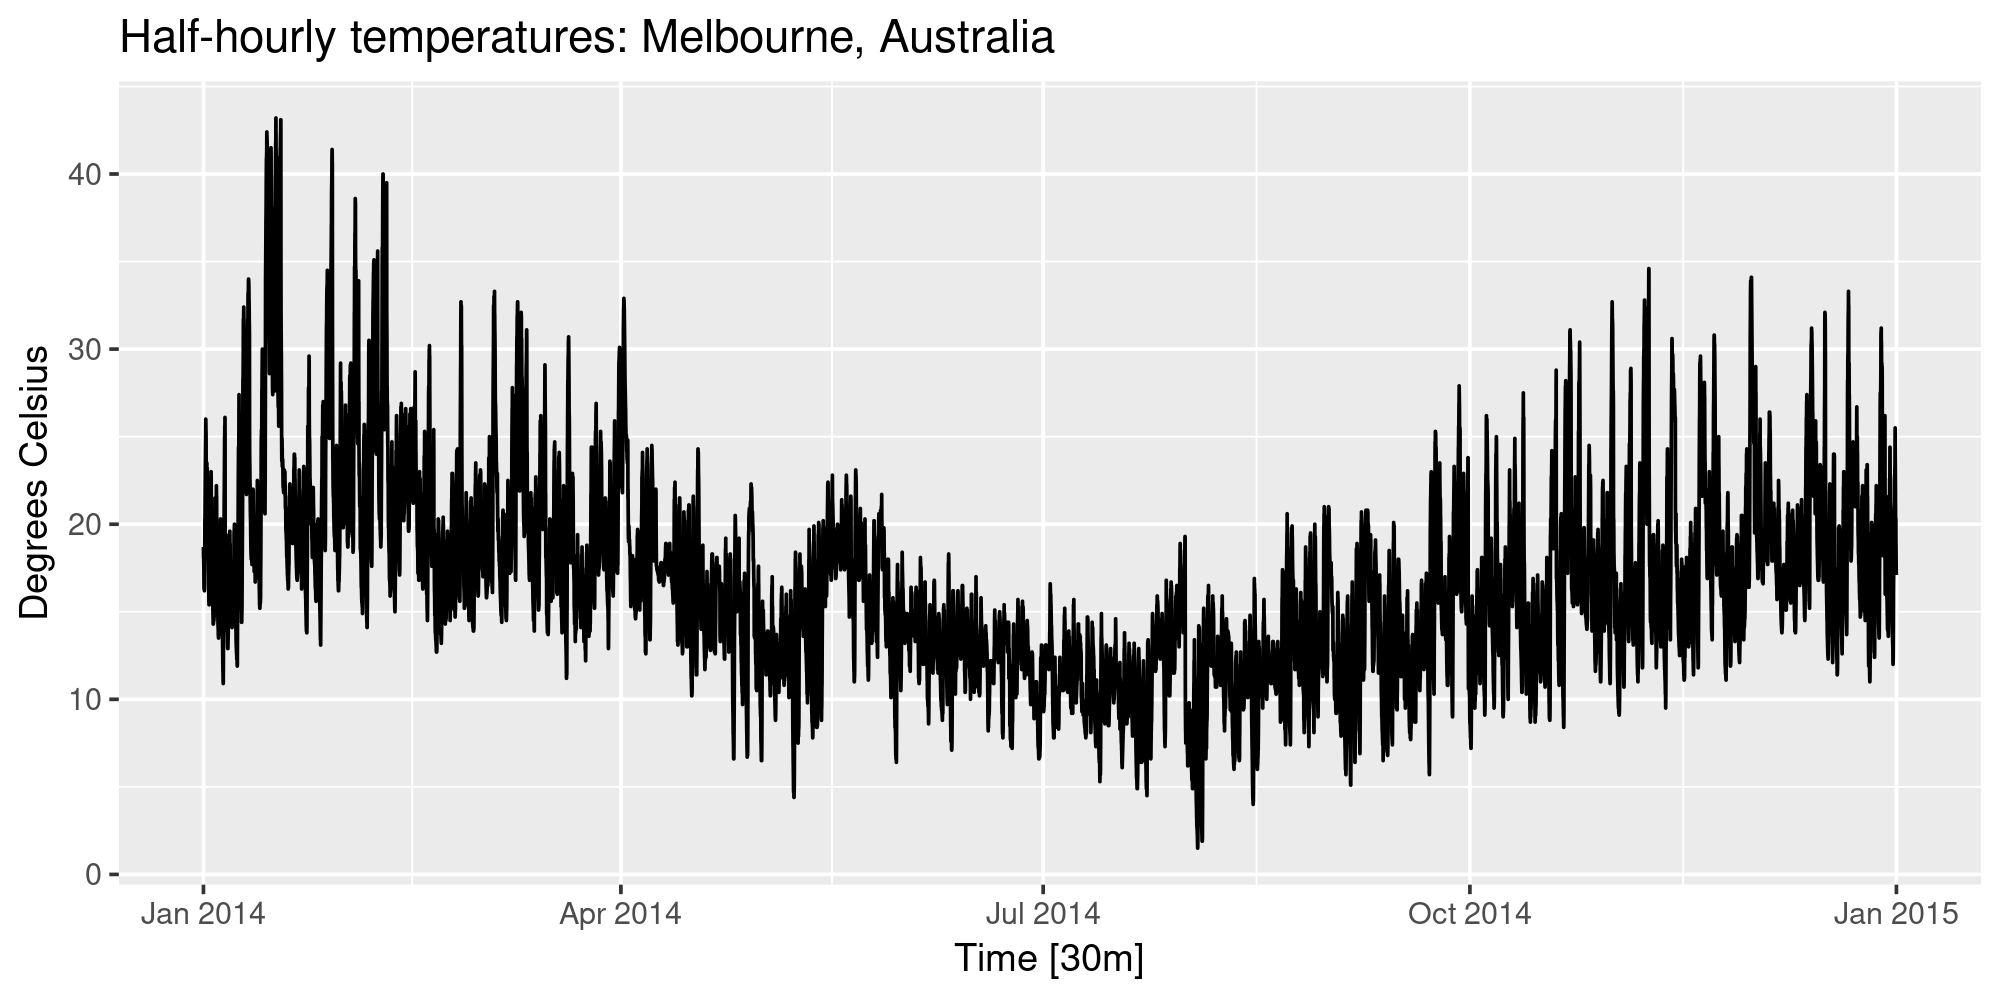

In [35]:
vic_elec |>
    filter(year(Time) == 2014) |>
    autoplot(Temperature) +
    labs(y = "Degrees Celsius",
         title = "Half-hourly temperatures: Melbourne, Australia")

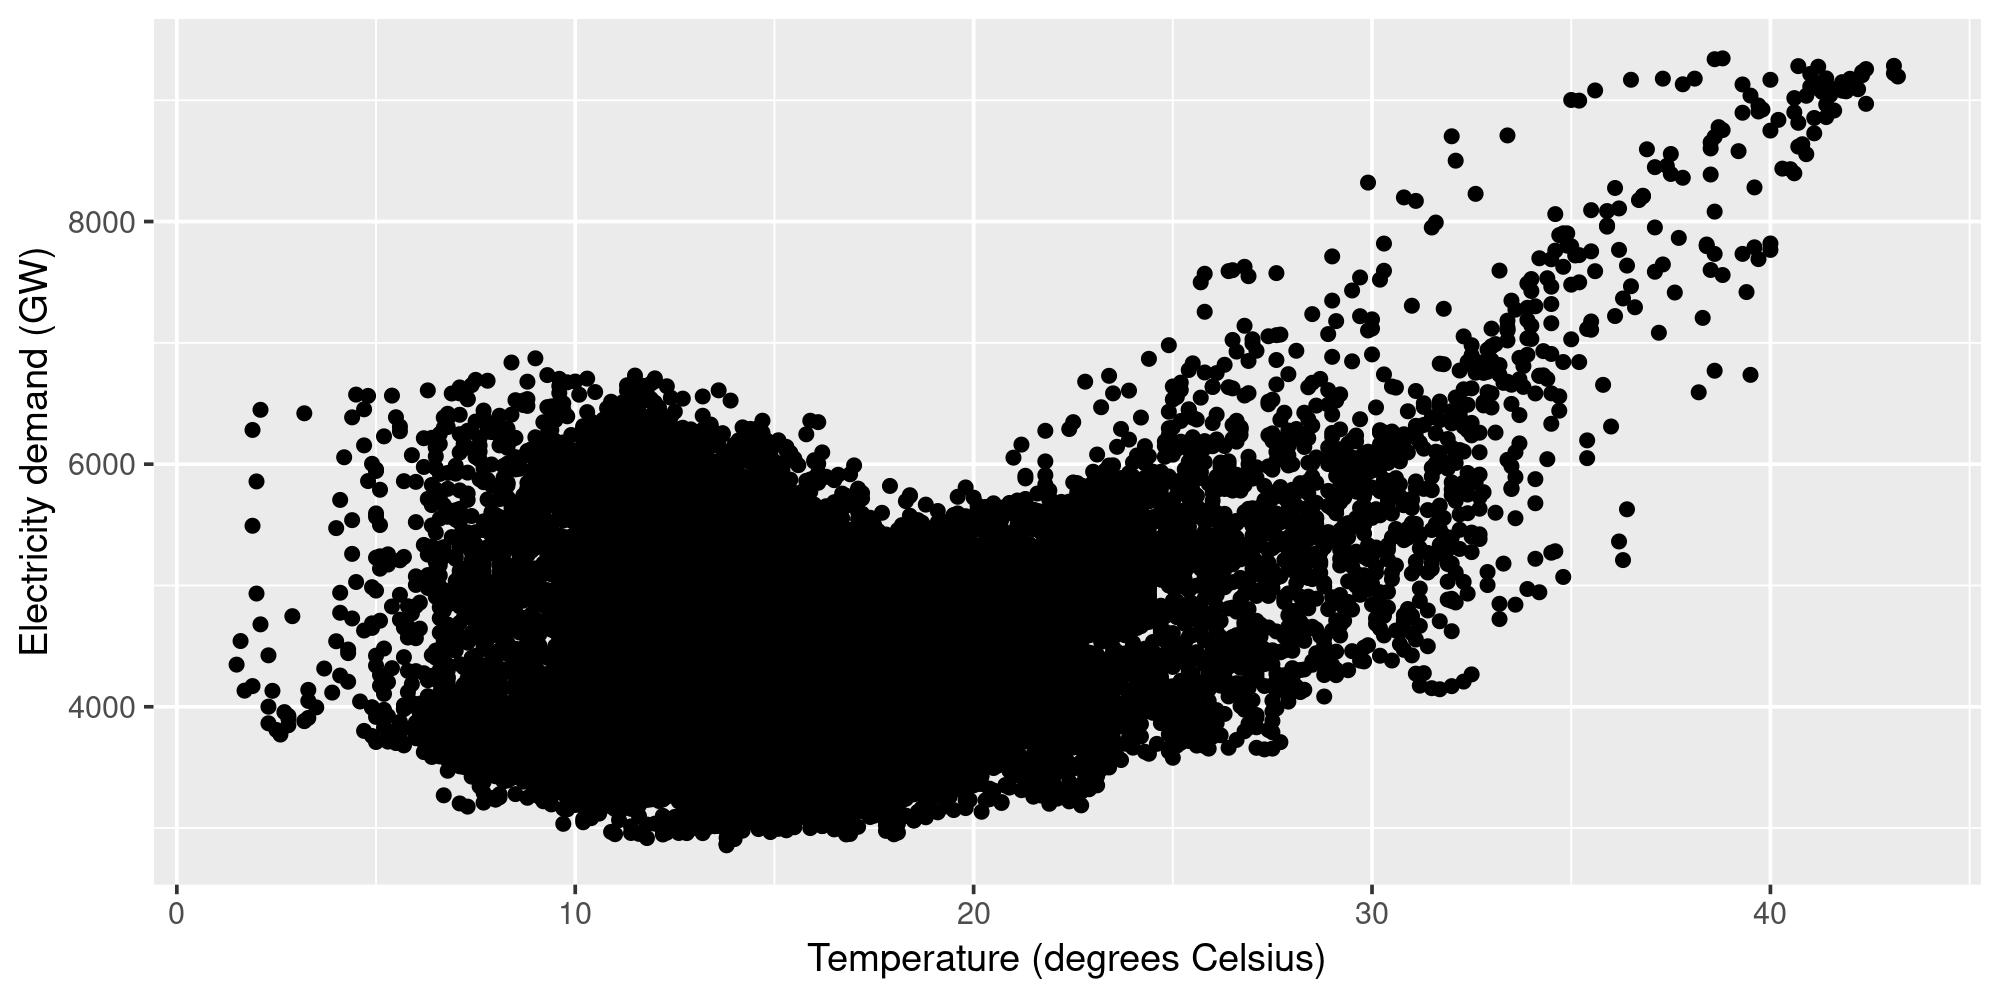

In [36]:
vic_elec |>
    filter(year(Time) == 2014) |>
    ggplot(aes(x = Temperature, y = Demand)) +
        geom_point() +
        labs(x = "Temperature (degrees Celsius)",
             y = "Electricity demand (GW)")

This scatterplot helps us to visualise the relationship between the variables. It is clear that high demand occurs when temperatures are high due to the effect of air-conditioning. But there is also a heating effect, where demand increases for very low temperatures.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



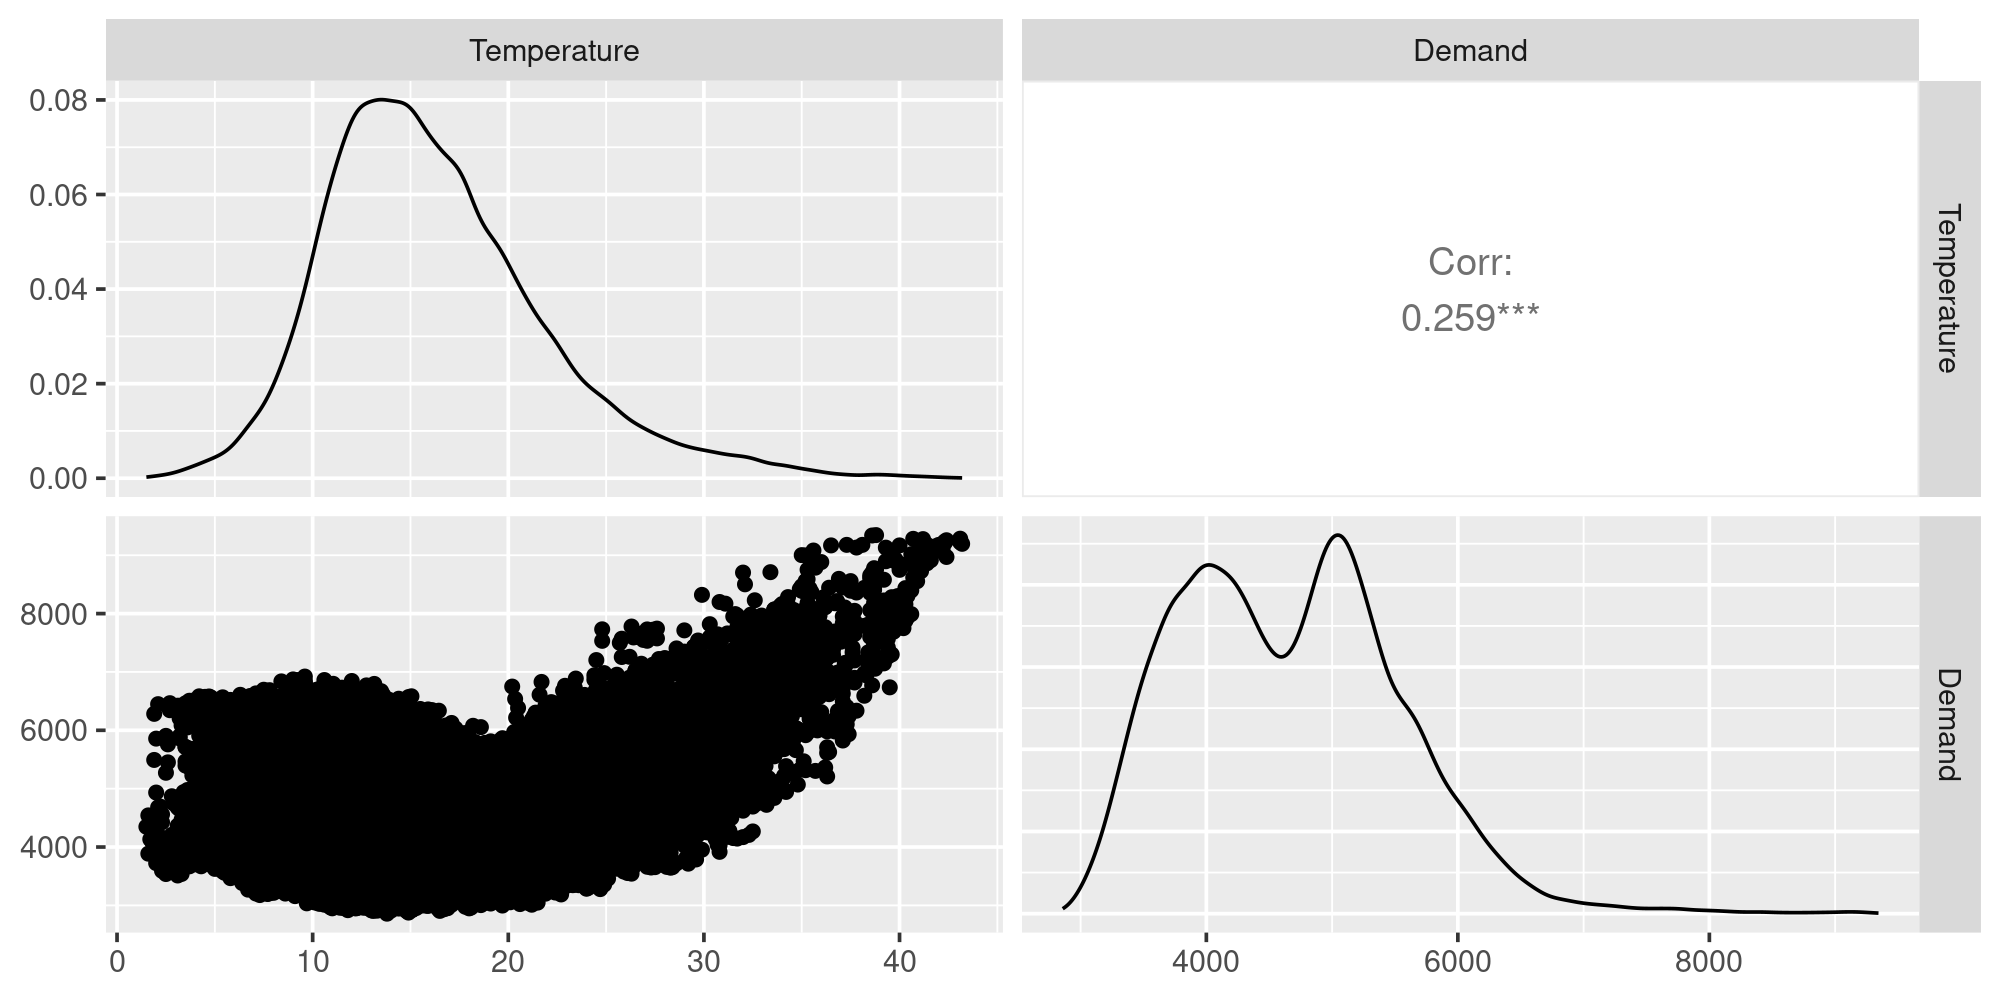

In [37]:
vic_elec |>
  GGally::ggpairs(columns = c(3,2))

This is a scatterplot matrix.

### Example: Australian holiday tourism

Australian quarterly vacation data:  total visitor nights spent on Holiday by State for each quarter.

In [38]:
tourism

Quarter Region          State           Purpose  Trips   
1     1998 Q1 Adelaide        South Australia Business 135.0777
2     1998 Q2 Adelaide        South Australia Business 109.9873
⋮     ⋮       ⋮               ⋮               ⋮        ⋮       
24319 2017 Q3 Yorke Peninsula South Australia Visiting 27.76673
24320 2017 Q4 Yorke Peninsula South Australia Visiting 46.28158

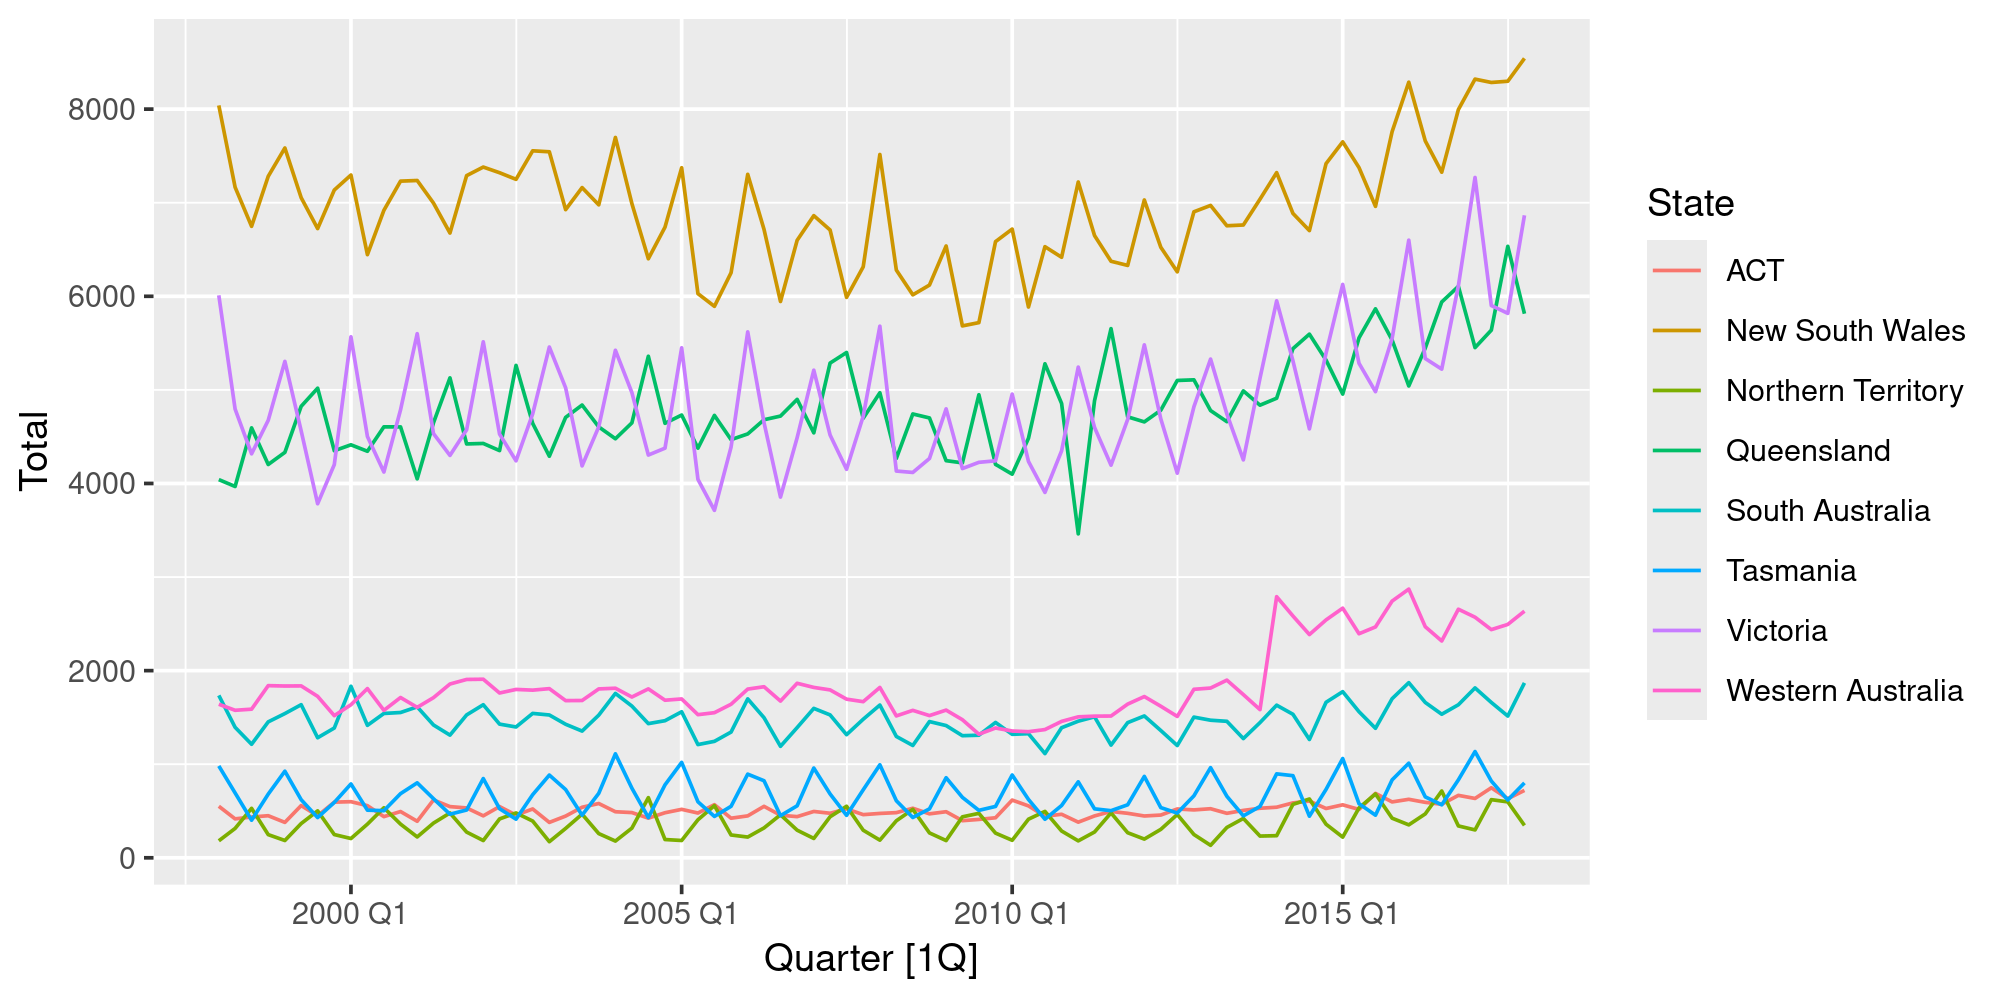

In [39]:
tourism |>
    group_by(State) |>
    summarise(Total=sum(Trips)) |>
    autoplot(Total)

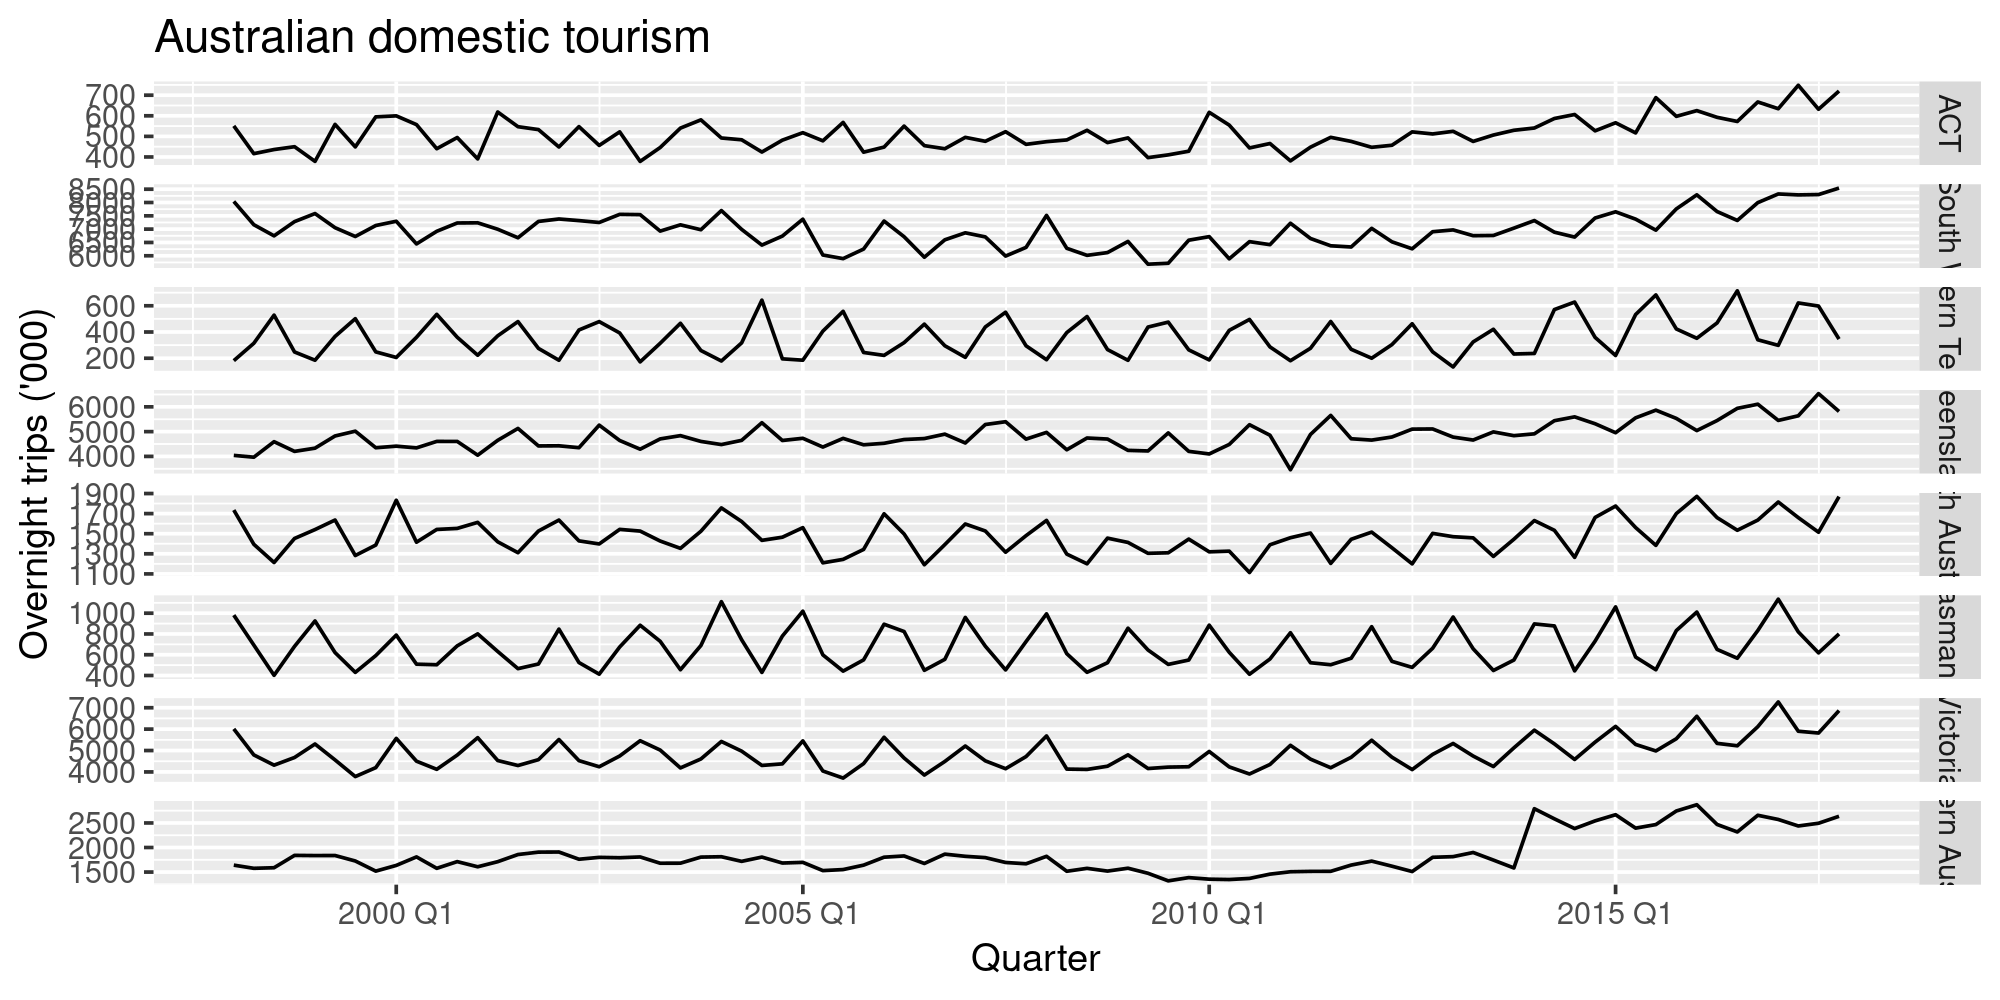

In [40]:
visitors <- tourism |>
    group_by(State) |>
    summarise(Trips = sum(Trips))

visitors |>
    ggplot(aes(x = Quarter, y = Trips)) +
    geom_line() +
    facet_grid(vars(State), scales = "free_y") +
        labs(title = "Australian domestic tourism",
             y= "Overnight trips ('000)")

In [41]:
visitors |>
    pivot_wider(values_from=Trips, names_from=State)

Quarter ACT      New South Wales Northern Territory Queensland
1  1998 Q1 551.0019 8039.795        181.4488           4041.370  
2  1998 Q2 416.0256 7166.014        313.9362           3967.905  
⋮  ⋮       ⋮        ⋮               ⋮                  ⋮         
79 2017 Q3 631.7599 8298.257        597.6584           6533.837  
80 2017 Q4 720.3294 8542.491        346.0619           5813.904  
   South Australia Tasmania Victoria Western Australia
1  1735.438        981.6292 6010.424 1641.089         
2  1394.638        693.2882 4795.247 1576.327         
⋮  ⋮               ⋮        ⋮        ⋮                
79 1514.786        618.0894 5817.972 2493.955         
80 1869.107        800.5085 6865.399 2635.754

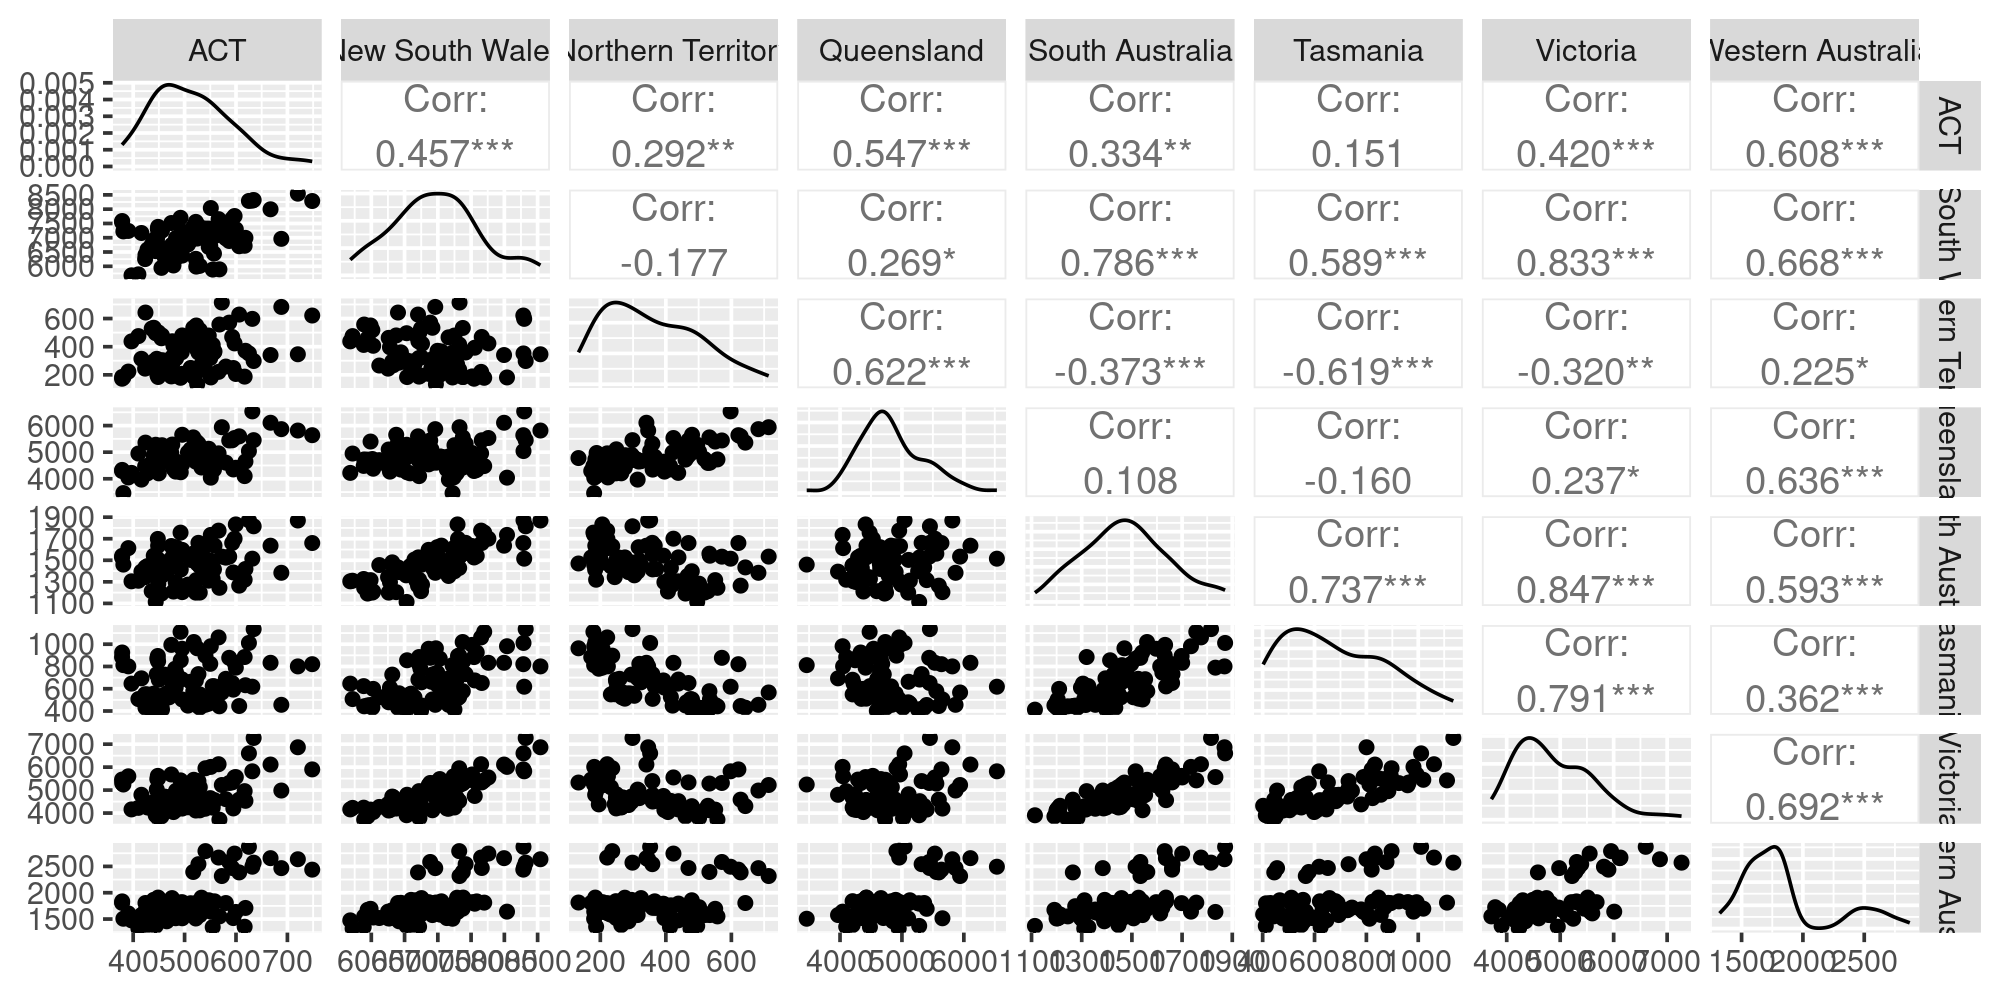

In [42]:
visitors |>
    pivot_wider(values_from=Trips, names_from=State) |>
    GGally::ggpairs(columns = 2:9)

## Lag plots and Autocorrelations (Ex: Australian quarterly beer production)

Quarter Beer Tobacco Bricks Cement Electricity Gas
1   1956 Q1 284  5225    189    465    3923        5  
2   1956 Q2 213  5178    204    532    4436        6  
⋮   ⋮       ⋮    ⋮       ⋮      ⋮      ⋮           ⋮  
217 2010 Q1 414  NA      NA     1904   58309       205
218 2010 Q2 374  NA      NA     2401   58041       236

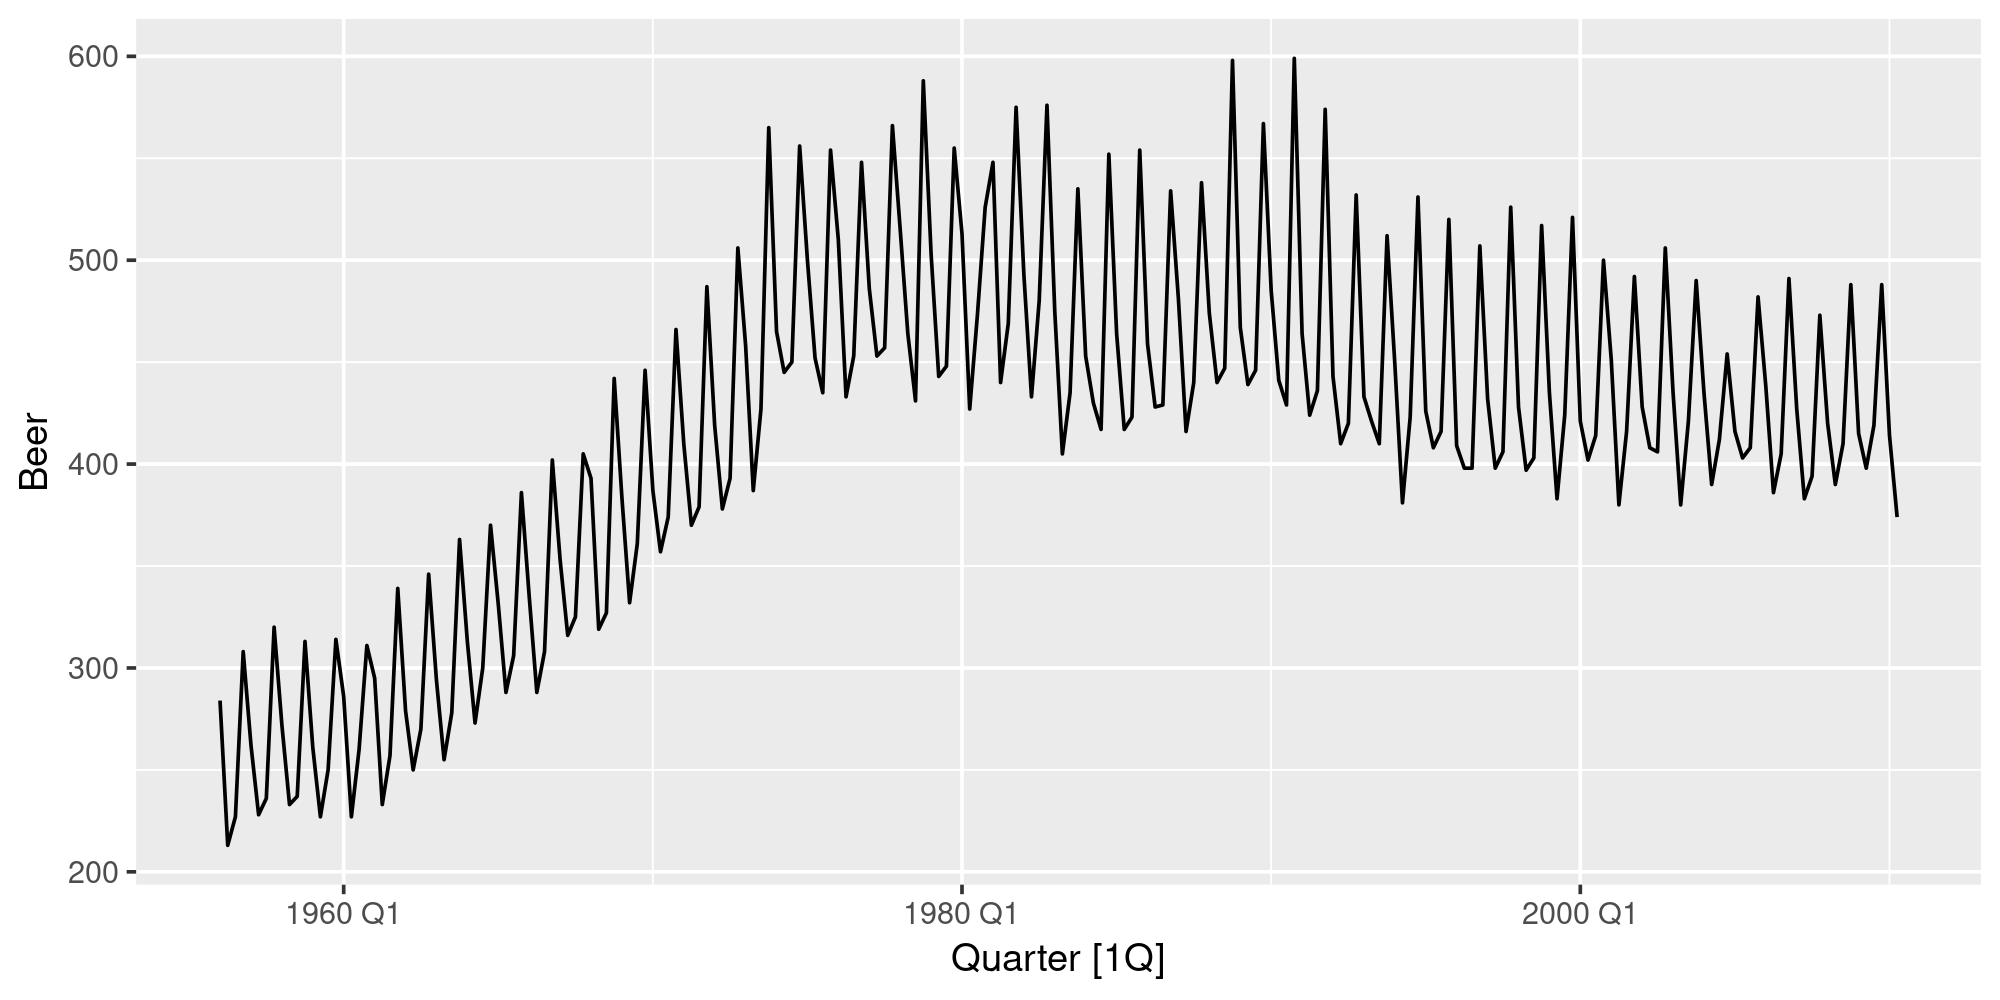

In [43]:
aus_production
aus_production |> autoplot(Beer)

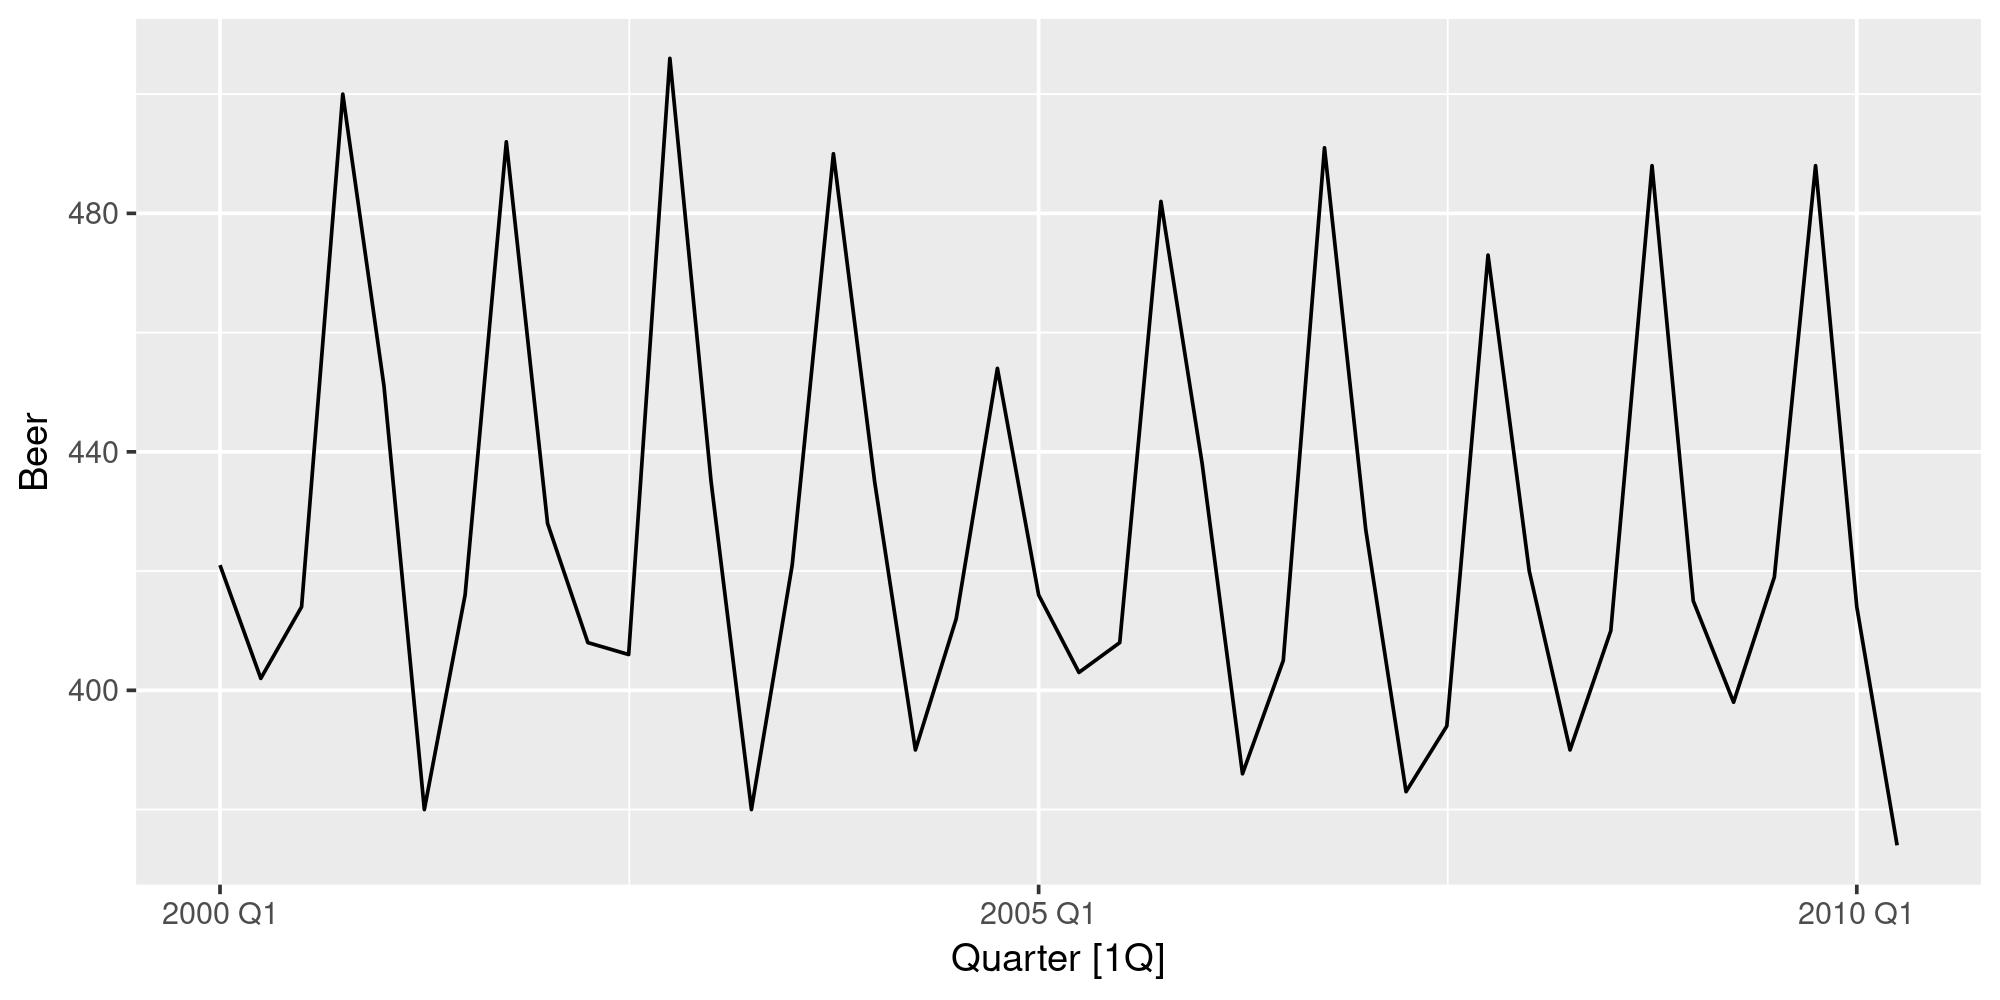

In [44]:
recent_production <- aus_production |>
  filter(year(Quarter) >= 2000)

recent_production |> autoplot(Beer)

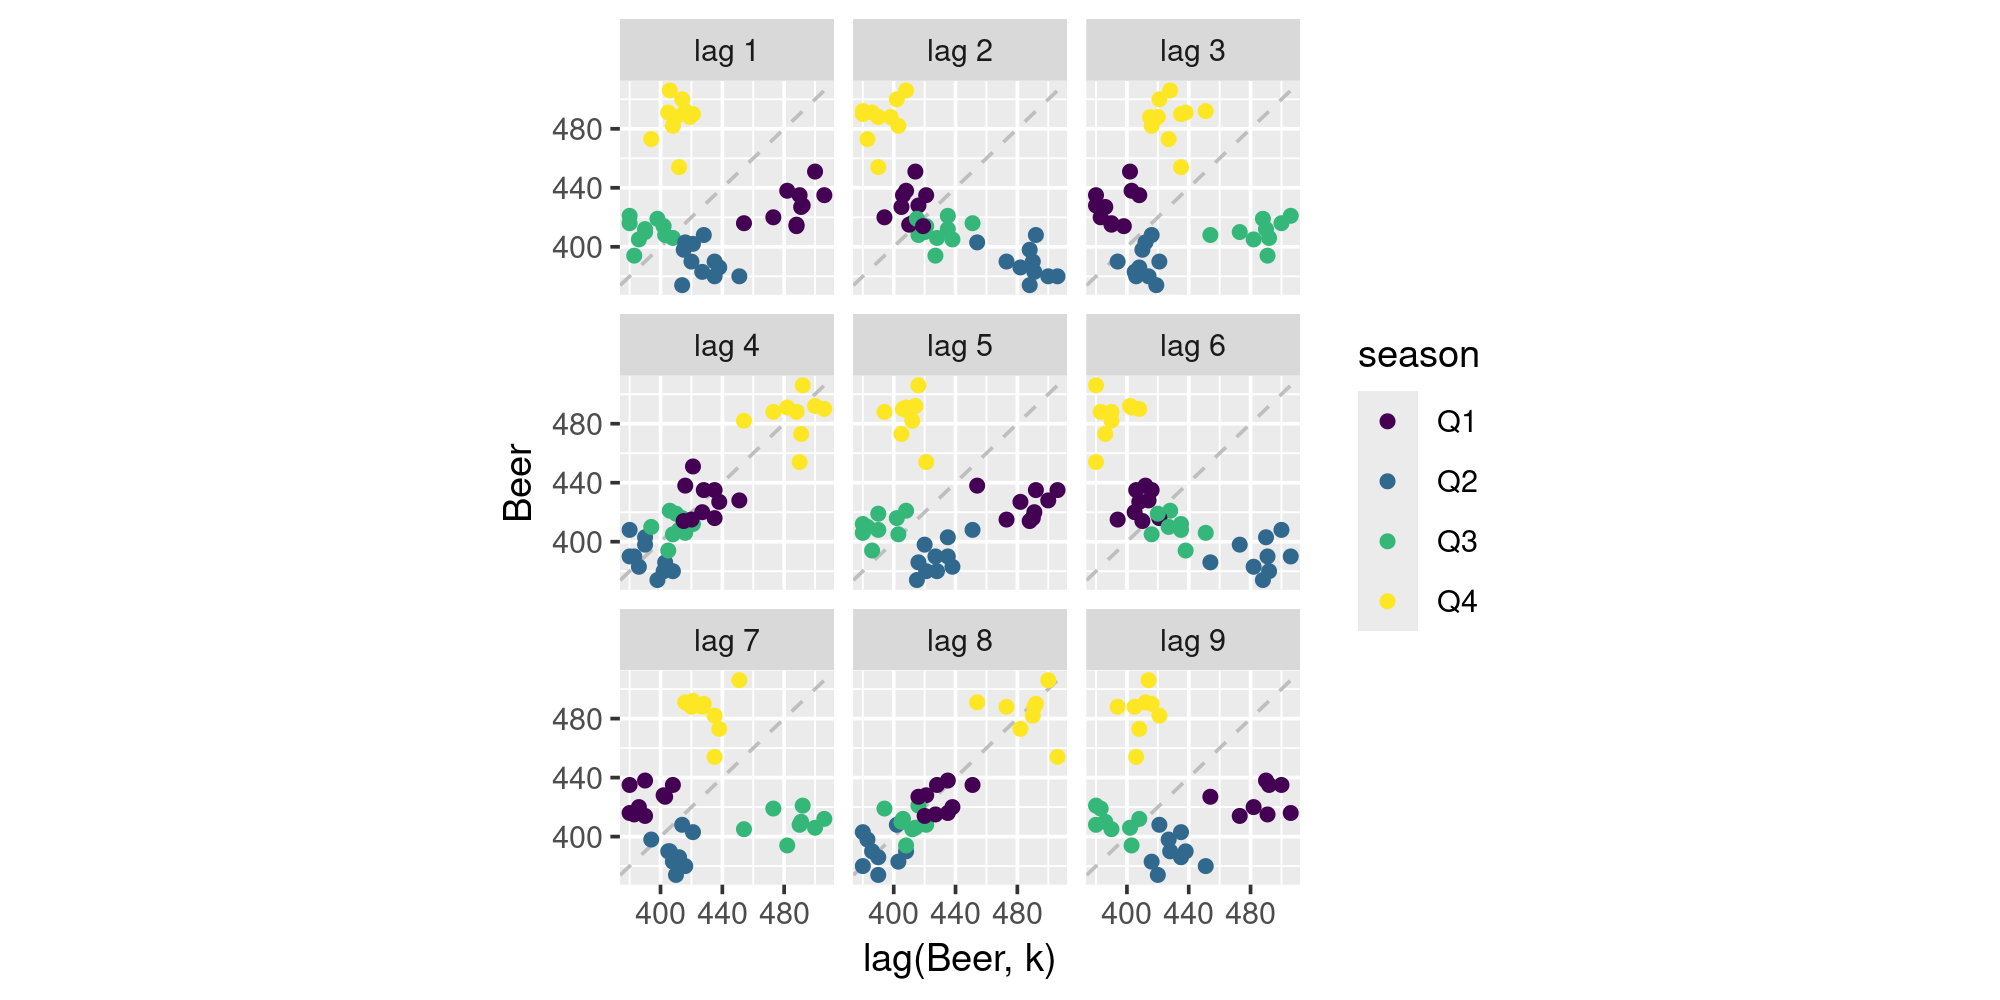

In [45]:
recent_production |>
    gg_lag(Beer, geom = "point") +
    labs(x = "lag(Beer, k)")

Each graph shows $y_t$ plotted against $y_{t−k}$ for diﬀerent values of $k$.

The autocorrelations are the correlations associated with these scatterplots.

Here the colours indicate the quarter of the variable on the vertical axis. The relationship is strongly positive at lags 4 and 8, reflecting the strong seasonality in the data. The negative relationship seen for lags 2 and 6 occurs because peaks (in Q4) are plotted against troughs (in Q2)

In [46]:
recent_production |>
    ACF(Beer, lag_max = 9)

lag acf        
1 1Q  -0.05298108
2 2Q  -0.75817544
⋮ ⋮   ⋮          
8 8Q   0.70725408
9 9Q  -0.08875626

- Covariance and correlation: measure extent of linear relationship between two variables ($y$ and $x$).

- Autocovariance and autocorrelation: measure linear relationship between lagged values of a time series $y$.

### Autocorrelation function (ACF) plots

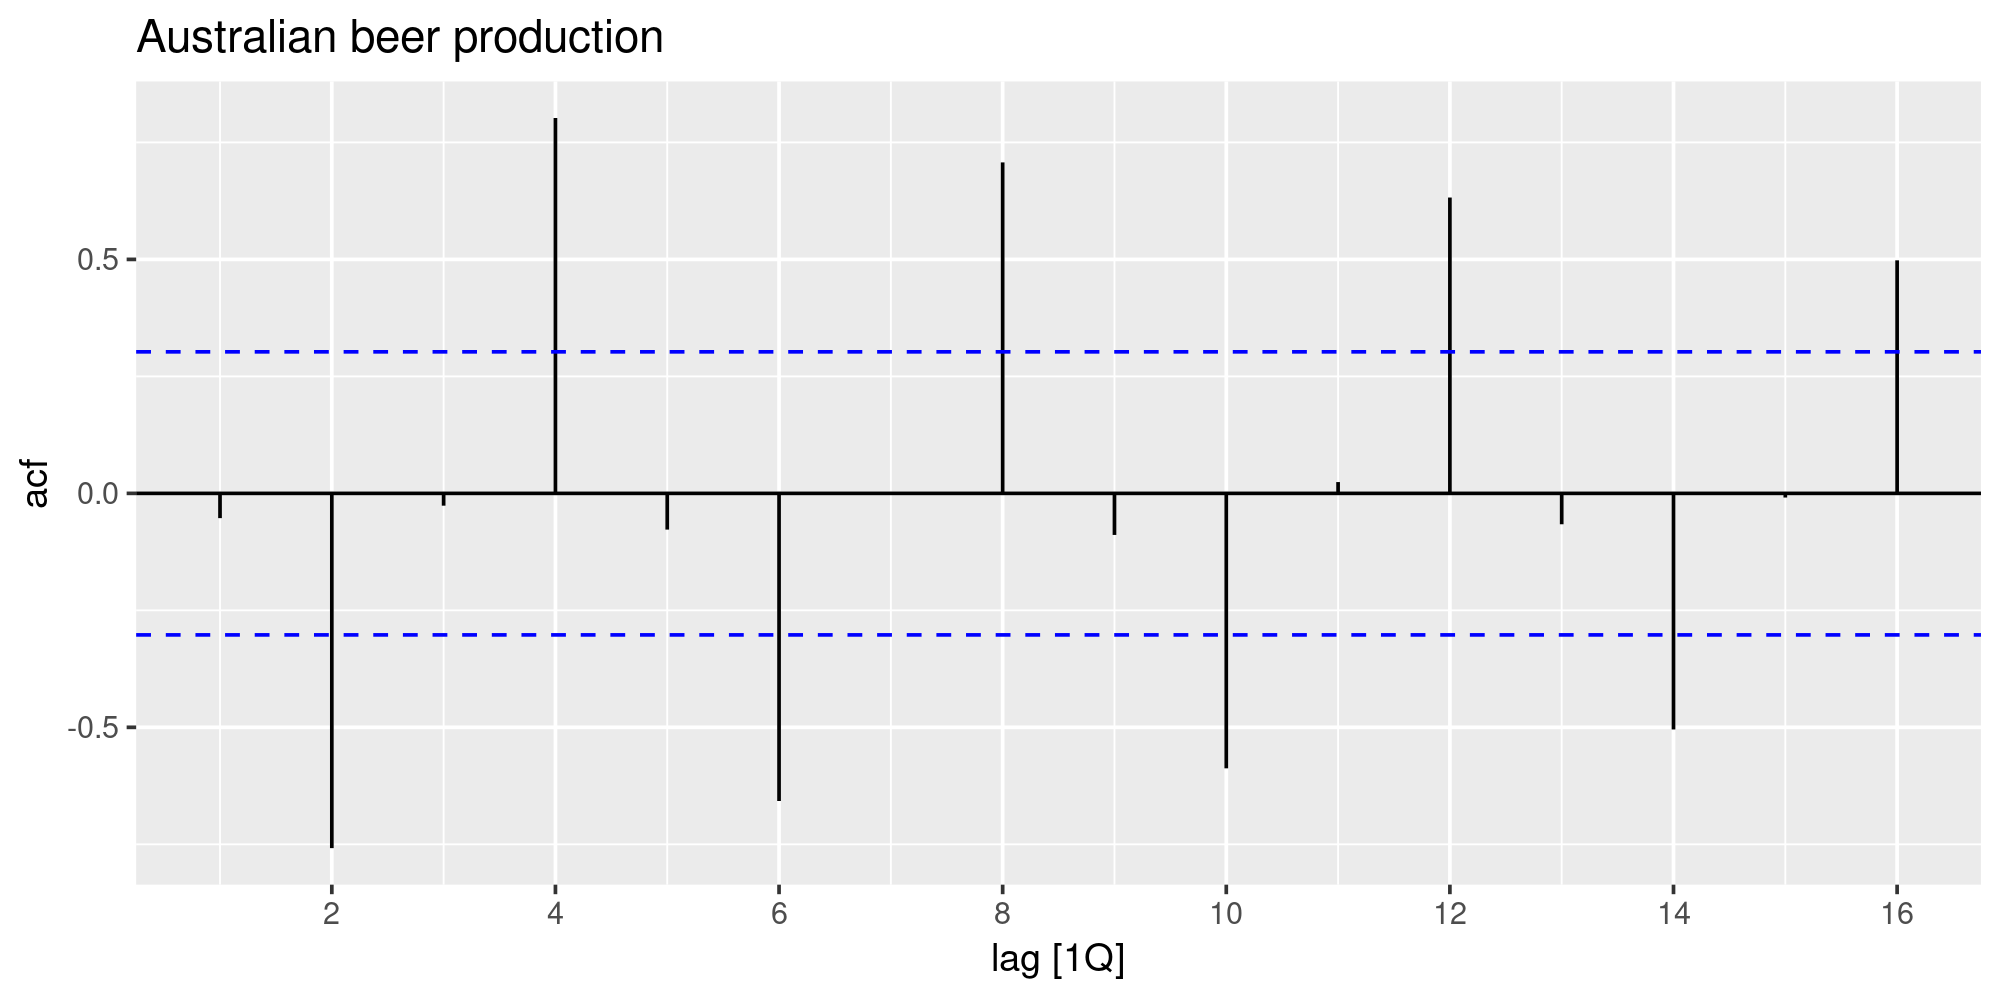

In [47]:
recent_production |>
    ACF(Beer) |>
    autoplot() + labs(title="Australian beer production")

Together, the autocorrelations at lags $1, 2, \ldots$, make up the autocorrelation or ACF.

This plot is known as a *correlogram*. 
The blue lines indicate whether the correlations are significantly different from 0.

### Trend and seasonality in ACF plots

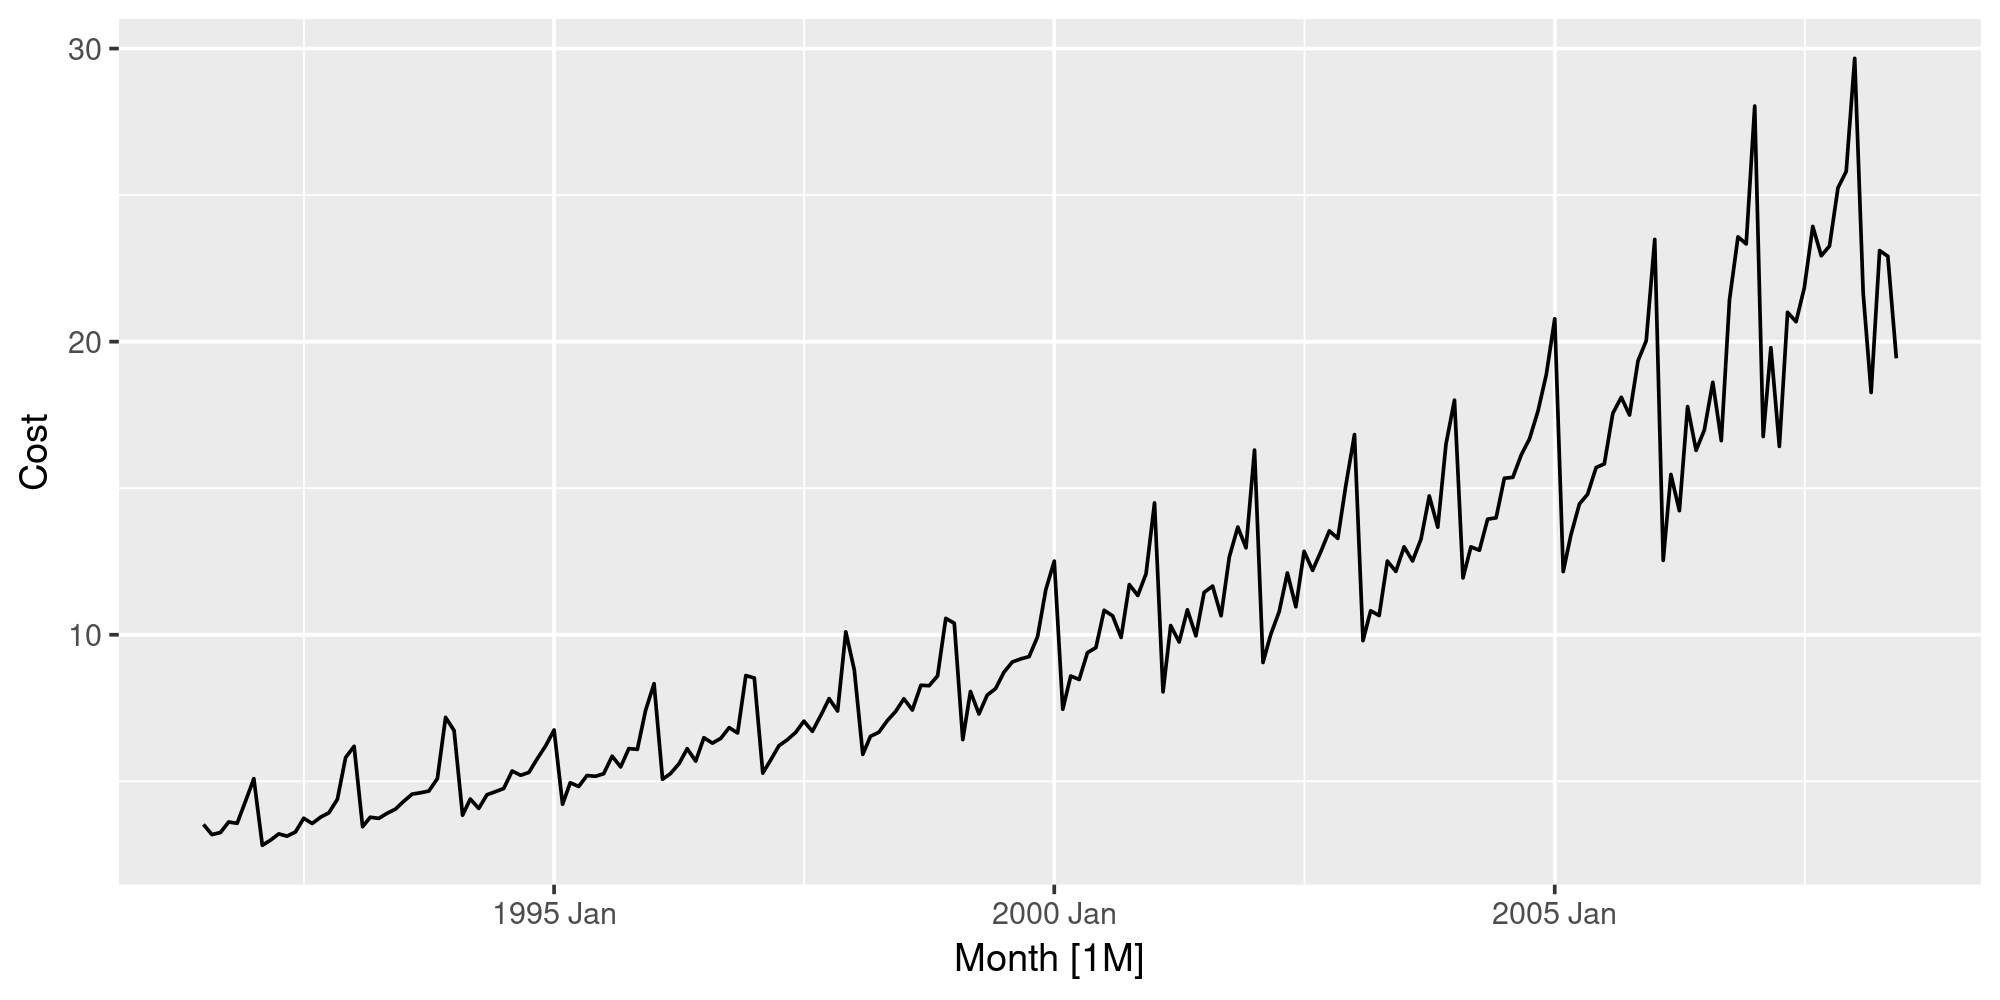

In [48]:
a10 |>
    autoplot(Cost)

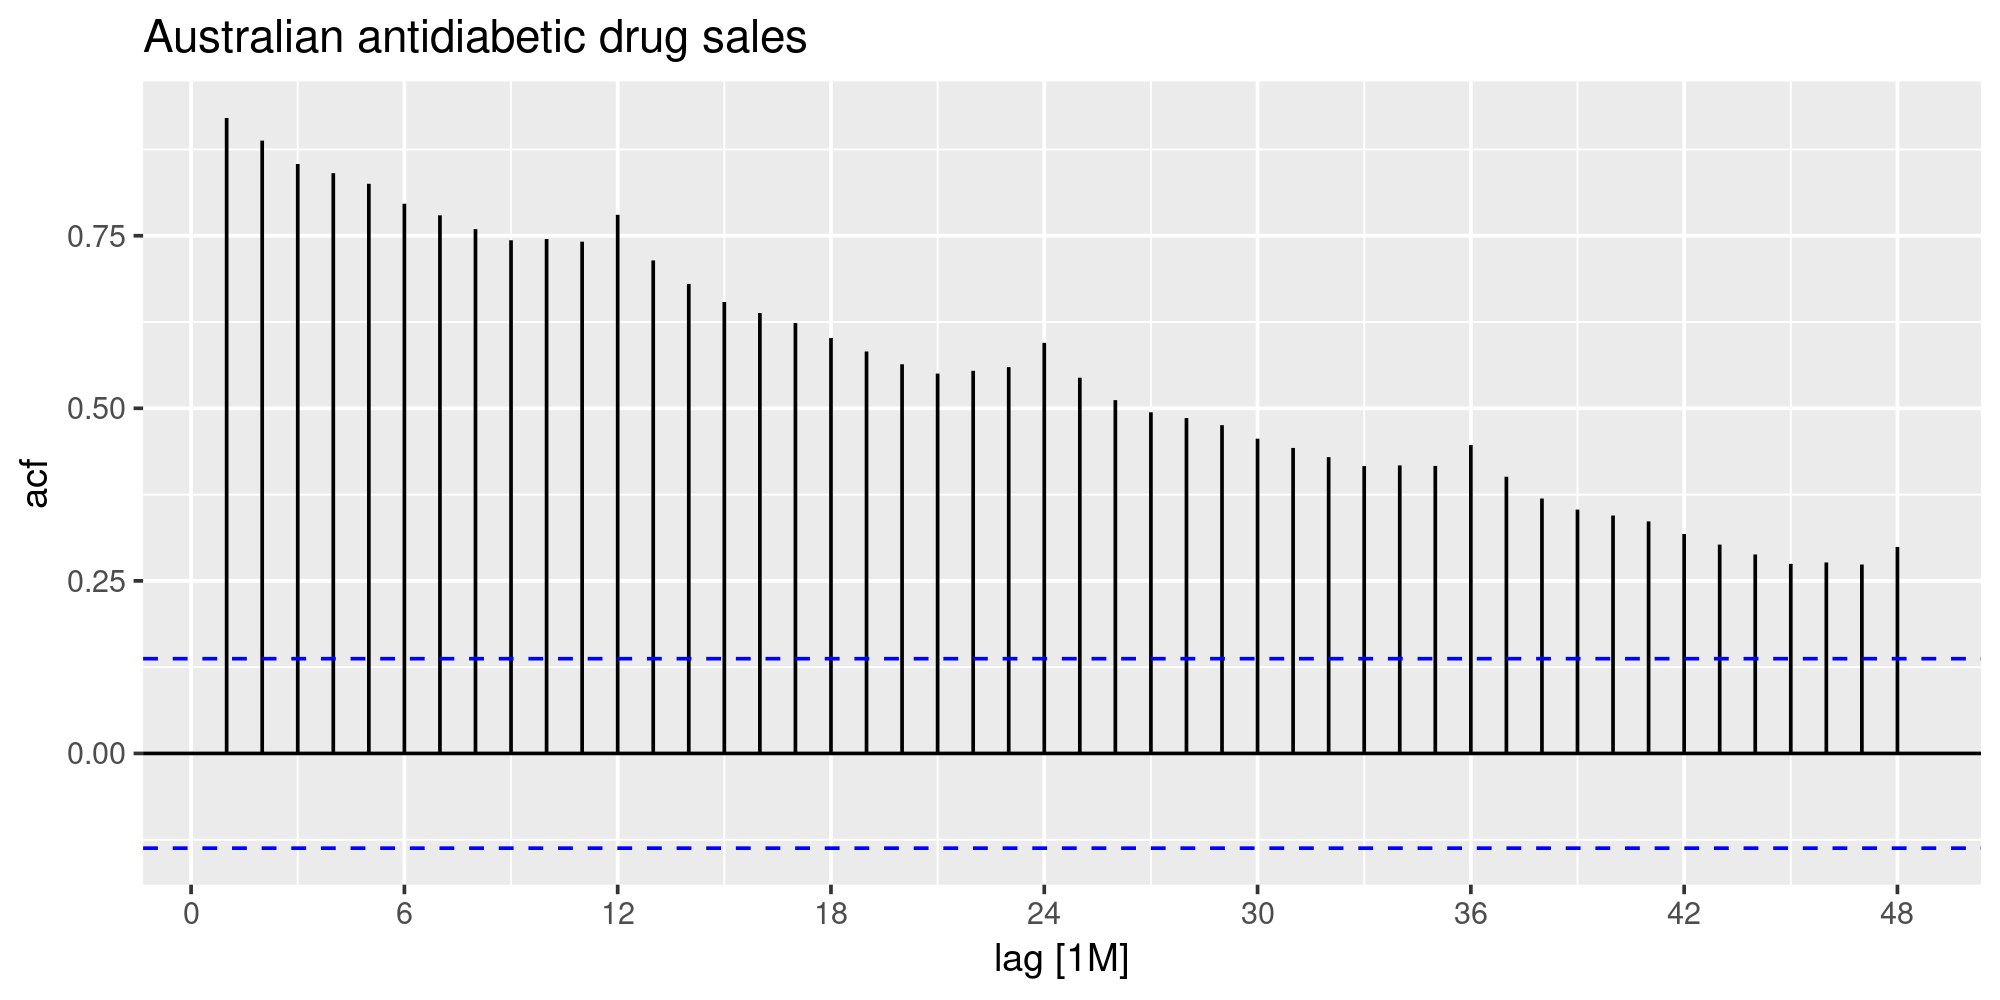

In [49]:
a10 |>
    ACF(Cost, lag_max = 48) |>
    autoplot() +
    labs(title="Australian antidiabetic drug sales")

When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in value. So the ACF of a trended time series tends to have positive values that slowly decrease as the lags increase.

When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal period) than for other lags.

When data are both trended and seasonal, you see a combination of these effects.

## White noise

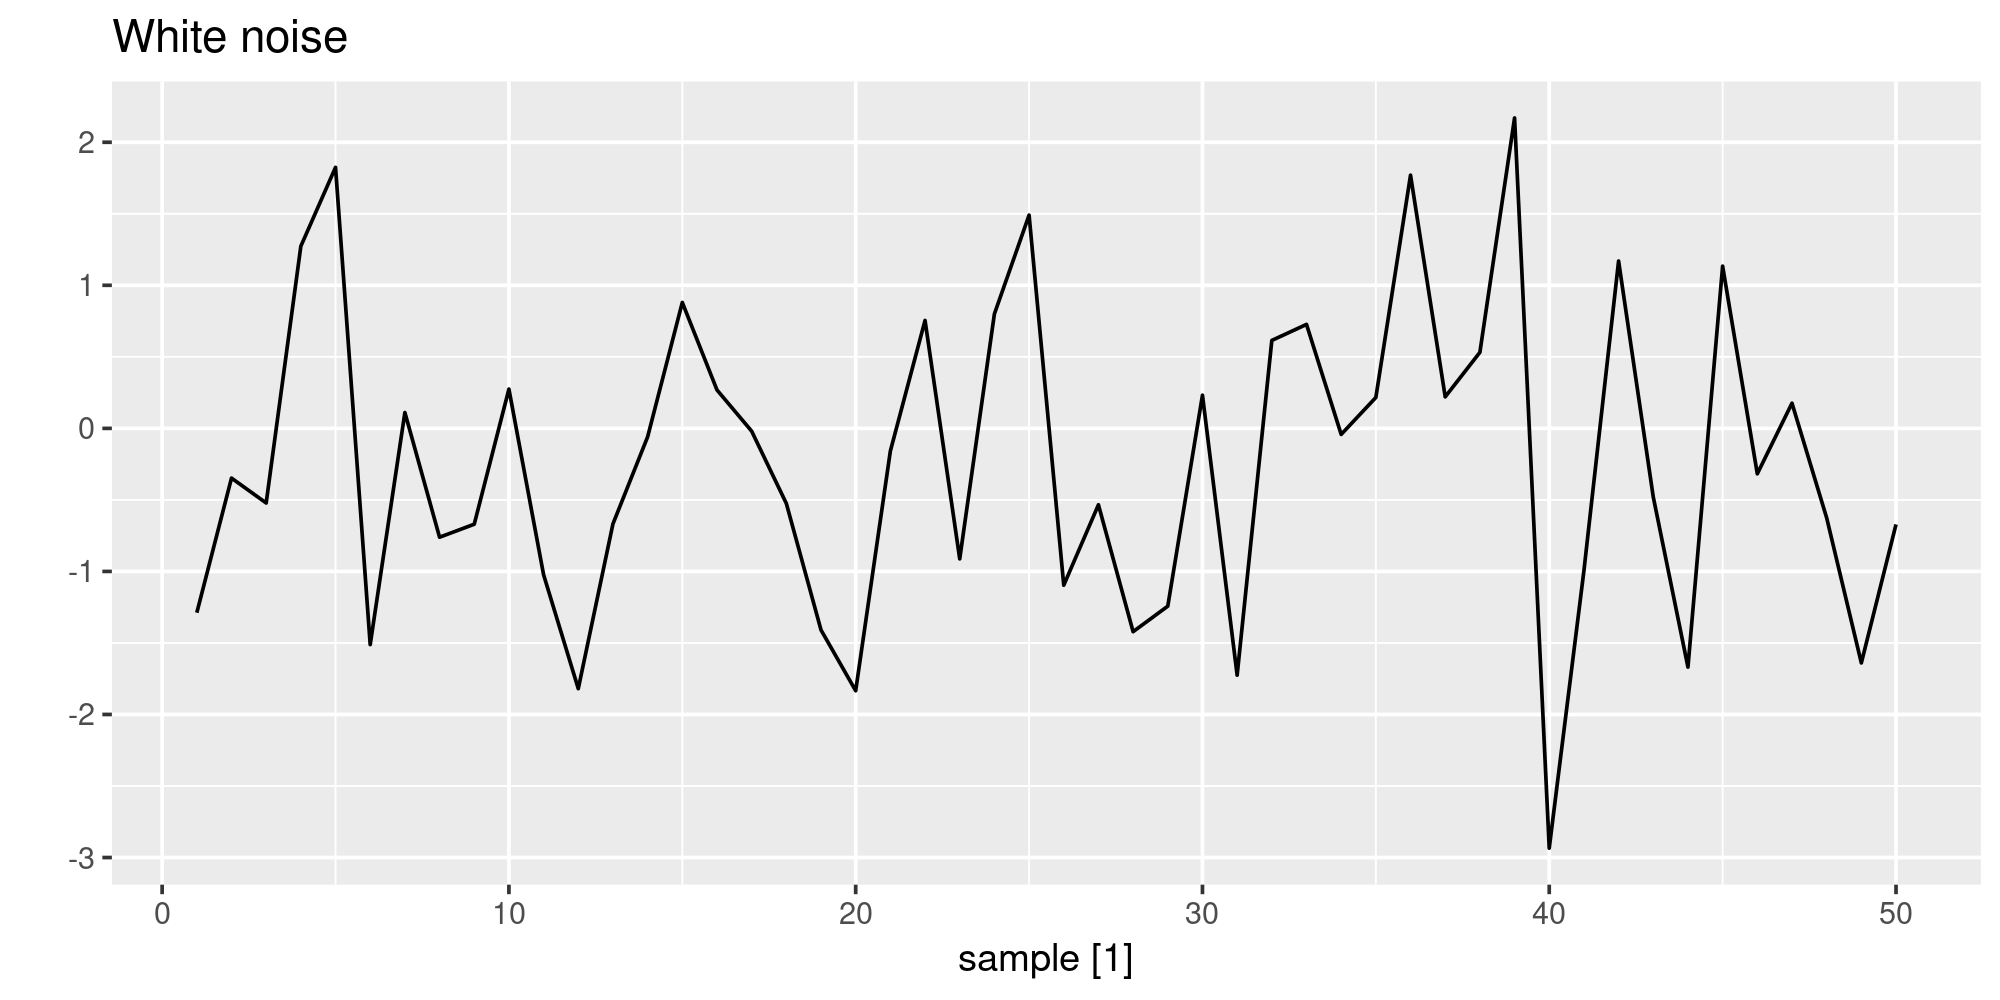

In [50]:
set.seed(30)
noise <- tsibble(sample = 1:50, wn = rnorm(50), index = sample)

noise |> 
    autoplot(wn) + 
    labs(title = "White noise", y = "")

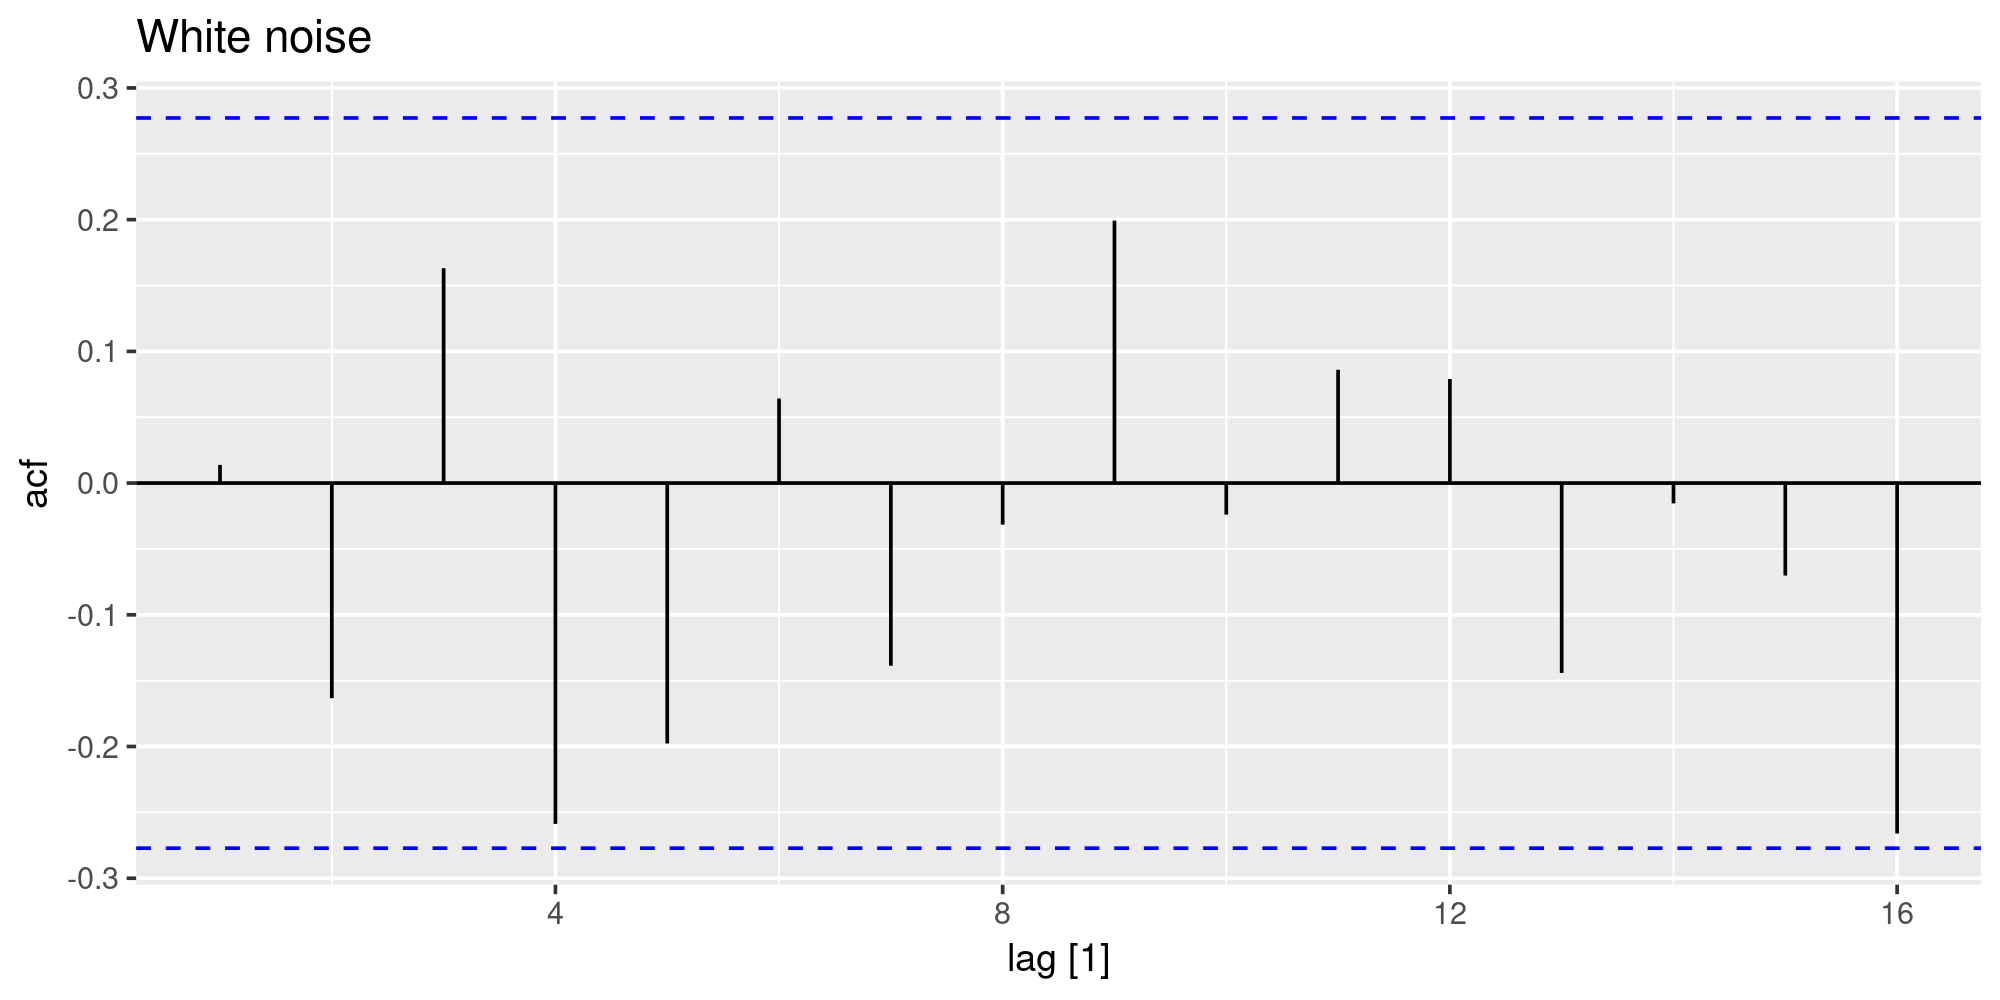

In [51]:
noise |>
    ACF(wn) |>
    autoplot() + labs(title = "White noise")

For white noise series, we expect each autocorrelation to be close to zero. 

### Example: Google stock price

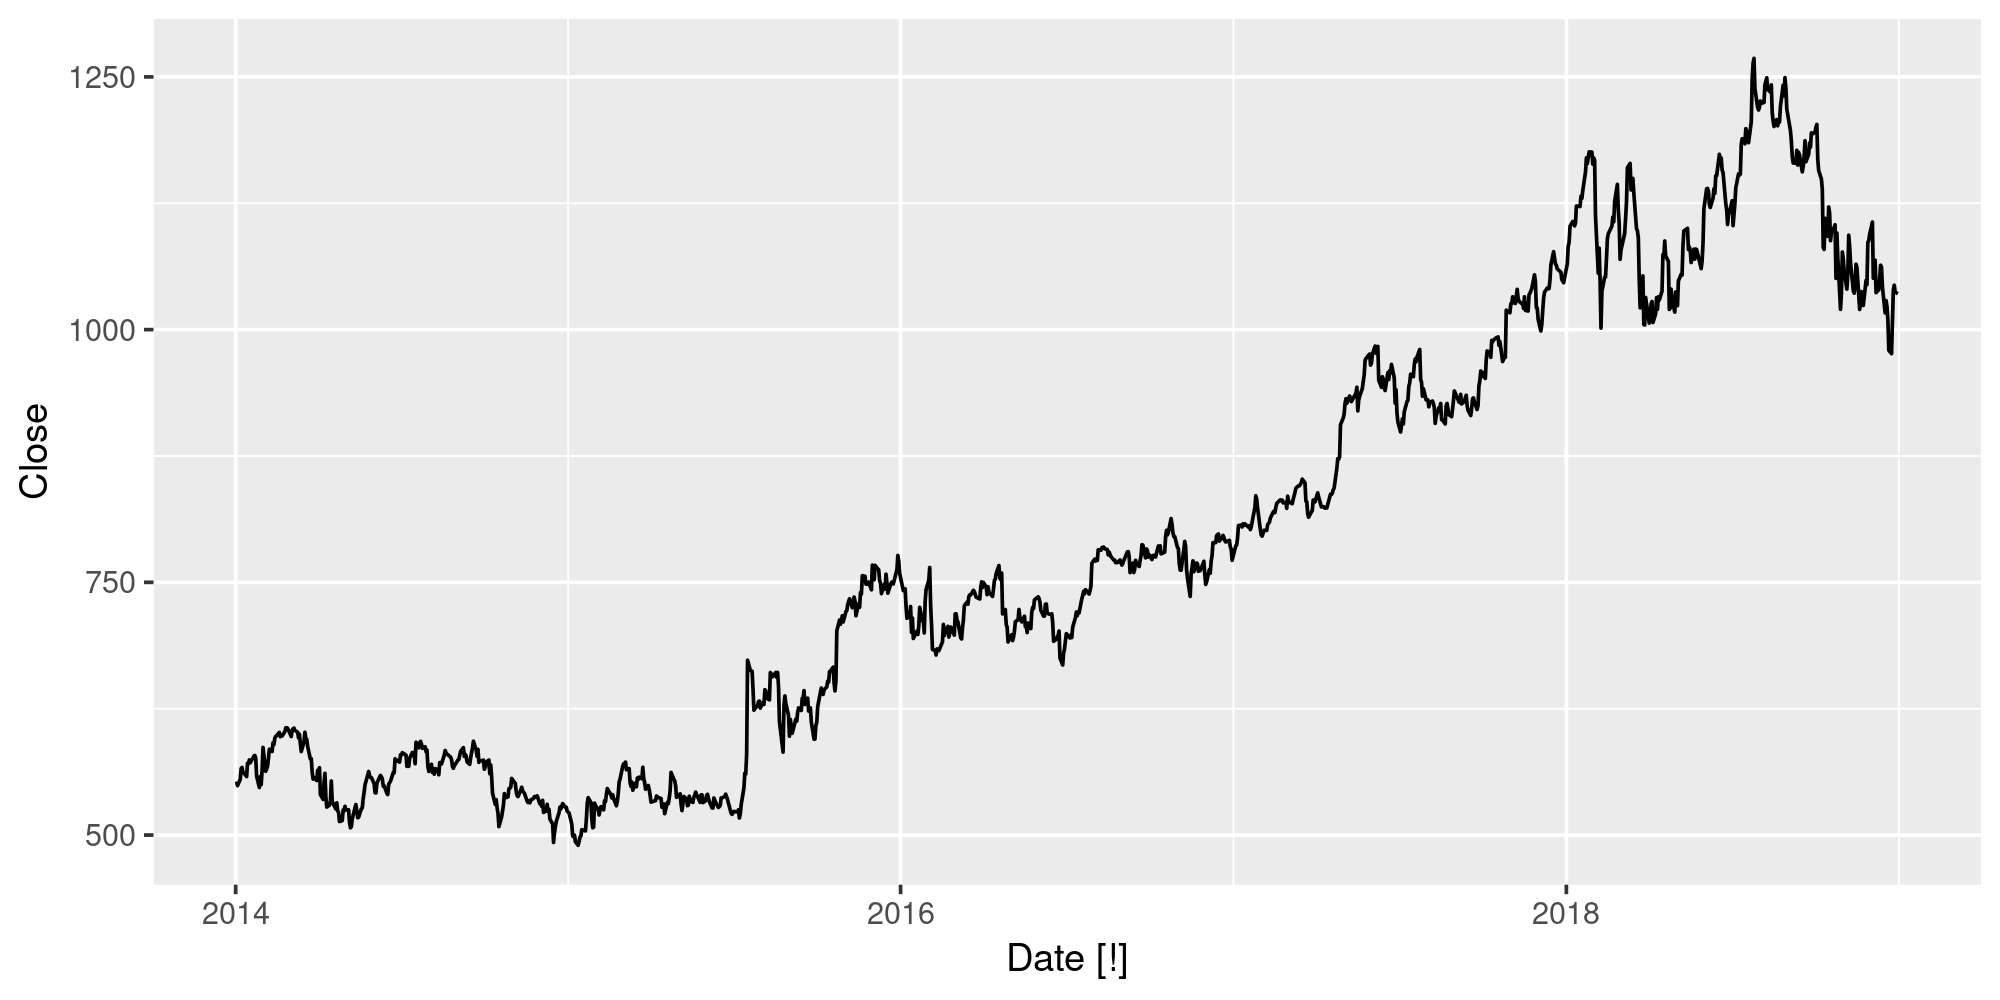

In [52]:
gafa_stock |>
    filter(Symbol=="GOOG") |>
    autoplot(Close)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


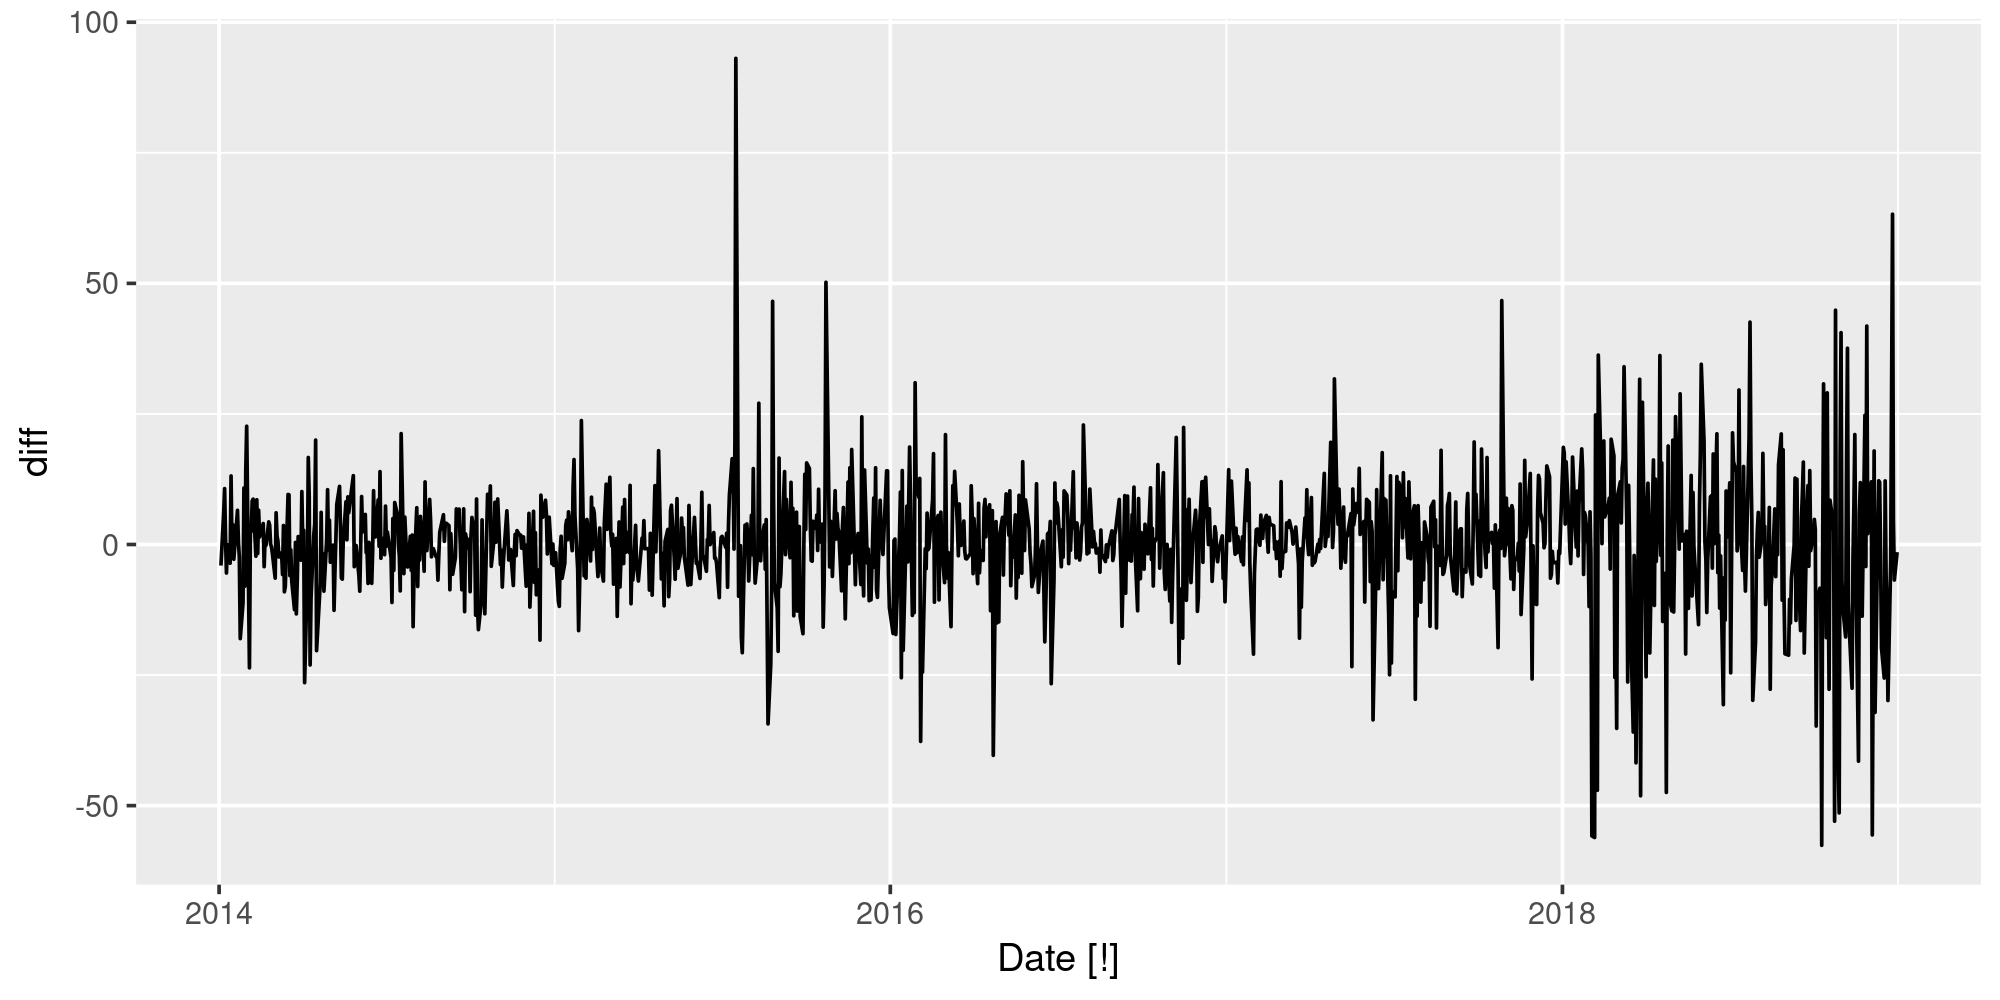

In [53]:
dgoog <- gafa_stock |>
    filter(Symbol == "GOOG") |>
    mutate(diff = difference(Close)) 
dgoog |>
    autoplot(diff)

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


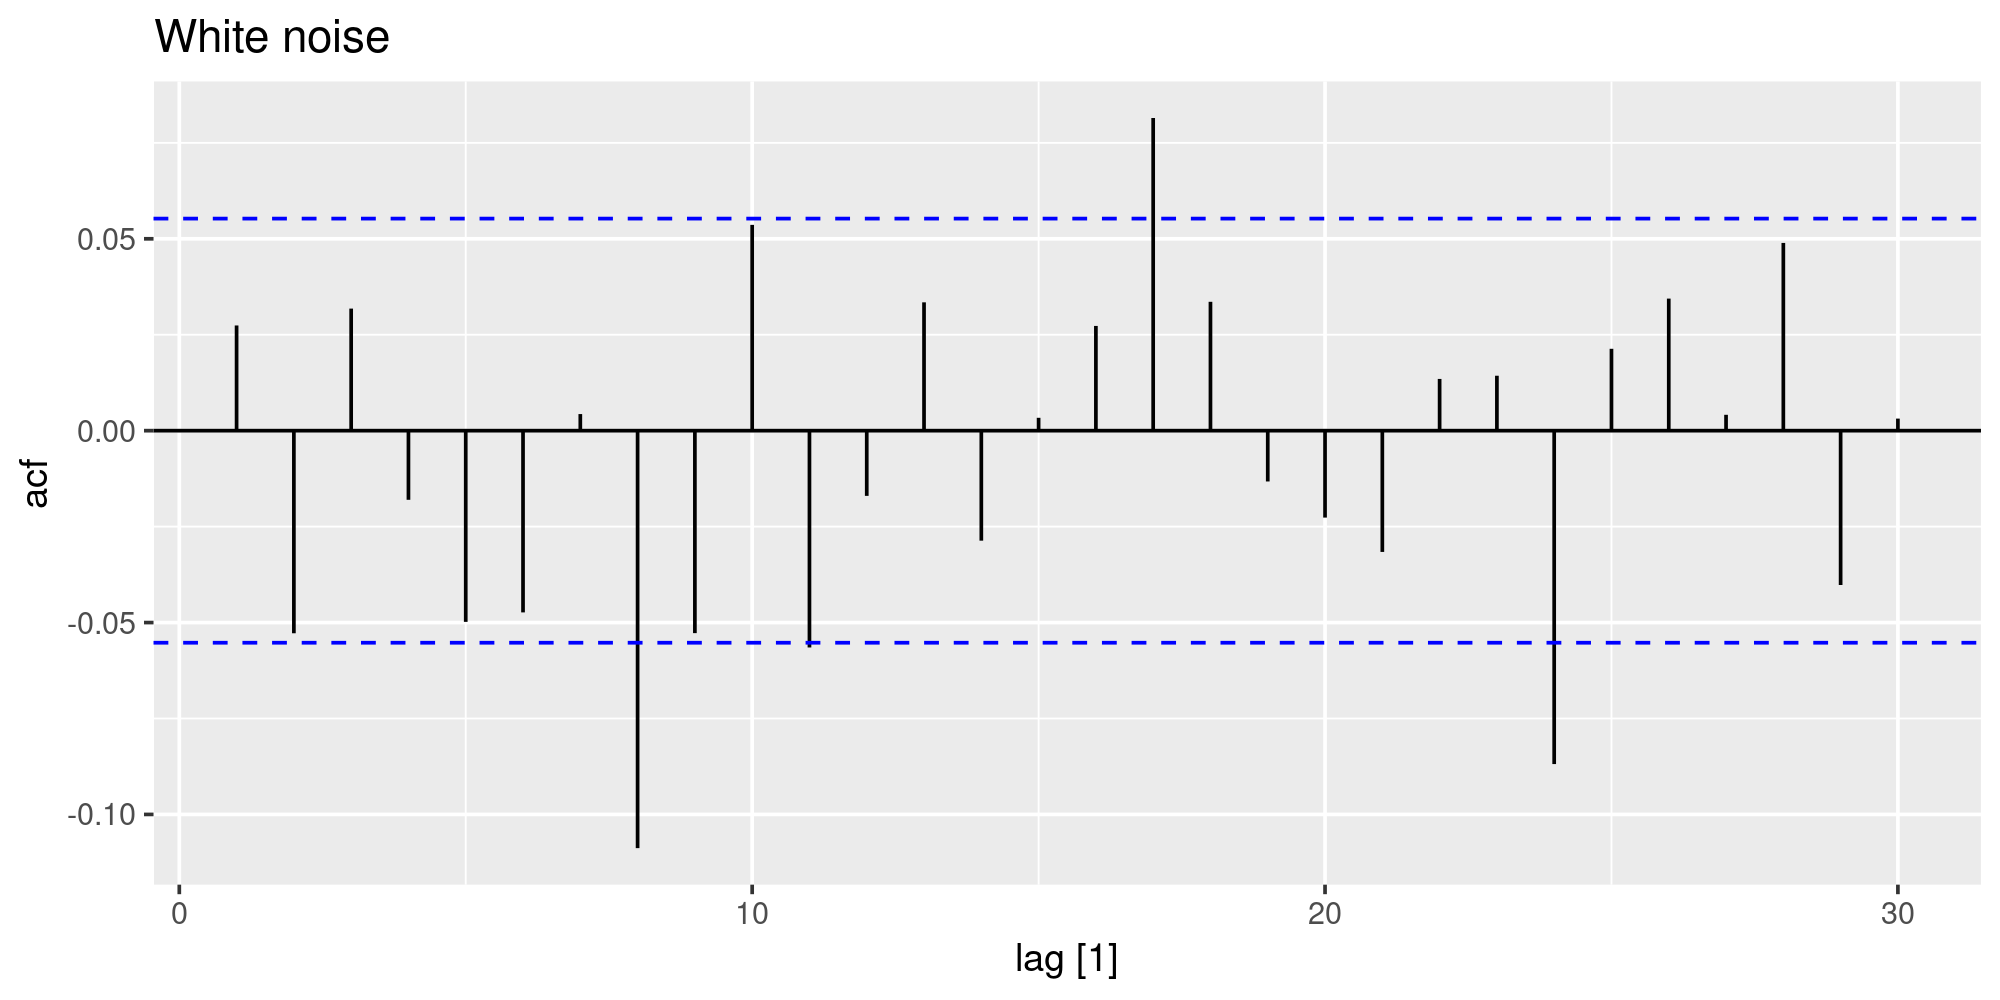

In [54]:
dgoog |>
    ACF(diff) |>
    autoplot() + labs(title = "White noise")

If substantially more than 5% of spikes are outside these bounds, then the series is probably not white noise.

# Next time: Chapter 3 (Time Series Decomposition)

Time series data can exhibit a variety of patterns, and it is often helpful to split a time series into several components, each representing an underlying pattern category.

We discuss the most common methods for extracting these components from a time series. Often this is done to help improve understanding of the time series, but it can also be used to improve forecast accuracy.

When decomposing a time series, it is sometimes helpful to first transform or adjust the series in order to make the decomposition (and later analysis) as simple as possible. So we will begin by discussing transformations and adjustments.

**Guest lecturer: Rongpeng Lee**

## In-Class Workbook

Use the remaining class time to complete the workbook. 
Feel free to collaborate and ask questions!